In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.set_random_seed(777)  # for reproducibility

f_data = np.loadtxt('crack_or_cicle_training4.csv', delimiter=',', dtype=np.float32)
f_test = np.loadtxt('crack_or_cicle_test.csv', delimiter=',', dtype=np.float32)



def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [2]:
f_data = MinMaxScaler(f_data)
f_test = MinMaxScaler(f_test)
print(f_data)
print(f_test)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00100087e-03   0.00000000e+00   2.00157456e-06]
 [  2.00200151e-03   0.00000000e+00   5.33753200e-06]
 ..., 
 [  1.44918963e-01   1.45831361e-01   2.12661400e-02]
 [  4.31903571e-01   4.32641715e-01   1.87178344e-01]
 [  2.95397282e-01   2.96218276e-01   8.77446905e-02]]
[[ 0.35257772  0.62961382  0.16212927]
 [ 0.64676327  0.07704452  0.30160001]
 [ 0.1454986   0.82140106  0.0570449 ]
 [ 0.18654177  0.19495188  0.03641073]
 [ 0.7262513   0.4266561   0.4625172 ]
 [ 0.27323955  0.76697111  0.12440819]
 [ 0.35446399  0.5069468   0.14847414]
 [ 0.99999988  0.32099345  0.78129673]
 [ 0.0097265   0.81115723  0.00330681]
 [ 0.41921362  0.33426338  0.16880269]
 [ 0.68121767  0.26724839  0.37697157]
 [ 0.40618929  0.70542908  0.21166204]
 [ 0.88816321  0.61752659  0.71715522]
 [ 0.22736572  0.65517789  0.08778778]
 [ 0.05382717  0.0892086   0.00168465]
 [ 0.37003481  0.81833047  0.19840269]
 [ 0.70692515  0.8376404   0.53927898]
 [ 0.

In [3]:
x_data = f_data[:, 0:-1]
y_data = f_data[:, [-1]]

x_test = f_test[:, 0:-1]
y_test = f_test[:, [-1]]

print(x_data)
print(y_data)
print(x_test)
print(y_test)

[[ 0.          0.        ]
 [ 0.001001    0.        ]
 [ 0.002002    0.        ]
 ..., 
 [ 0.14491896  0.14583136]
 [ 0.43190357  0.43264171]
 [ 0.29539728  0.29621828]]
[[  0.00000000e+00]
 [  2.00157456e-06]
 [  5.33753200e-06]
 ..., 
 [  2.12661400e-02]
 [  1.87178344e-01]
 [  8.77446905e-02]]
[[ 0.35257772  0.62961382]
 [ 0.64676327  0.07704452]
 [ 0.1454986   0.82140106]
 [ 0.18654177  0.19495188]
 [ 0.7262513   0.4266561 ]
 [ 0.27323955  0.76697111]
 [ 0.35446399  0.5069468 ]
 [ 0.99999988  0.32099345]
 [ 0.0097265   0.81115723]
 [ 0.41921362  0.33426338]
 [ 0.68121767  0.26724839]
 [ 0.40618929  0.70542908]
 [ 0.88816321  0.61752659]
 [ 0.22736572  0.65517789]
 [ 0.05382717  0.0892086 ]
 [ 0.37003481  0.81833047]
 [ 0.70692515  0.8376404 ]
 [ 0.0226669   0.96601927]
 [ 0.47827721  0.14202732]
 [ 0.50919884  0.19840838]
 [ 0.38348985  0.90462786]
 [ 0.31277561  0.40999177]
 [ 0.7863068   0.70875275]
 [ 0.29229397  0.01976906]
 [ 0.61684436  0.34911832]
 [ 0.21405841  0.70515054]


In [4]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4,4]), name='weight2')
b2 = tf.Variable(tf.random_normal([4]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [5]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.001
training_step = 500
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.728605
Step:  2 Cost:  0.721907
Step:  3 Cost:  0.715317
Step:  4 Cost:  0.708834
Step:  5 Cost:  0.702456
Step:  6 Cost:  0.69618
Step:  7 Cost:  0.690005
Step:  8 Cost:  0.683928
Step:  9 Cost:  0.677946
Step:  10 Cost:  0.672059
Step:  11 Cost:  0.666263
Step:  12 Cost:  0.660558
Step:  13 Cost:  0.65494
Step:  14 Cost:  0.649408
Step:  15 Cost:  0.643962
Step:  16 Cost:  0.638598
Step:  17 Cost:  0.633315
Step:  18 Cost:  0.628112
Step:  19 Cost:  0.622987
Step:  20 Cost:  0.617938
Step:  21 Cost:  0.612963
Step:  22 Cost:  0.608062
Step:  23 Cost:  0.603232
Step:  24 Cost:  0.598472
Step:  25 Cost:  0.593781
Step:  26 Cost:  0.589158
Step:  27 Cost:  0.5846
Step:  28 Cost:  0.580108
Step:  29 Cost:  0.575679
Step:  30 Cost:  0.571312
Step:  31 Cost:  0.567007
Step:  32 Cost:  0.562761
Step:  33 Cost:  0.558575
Step:  34 Cost:  0.554446
Step:  35 Cost:  0.550374
Step:  36 Cost:  0.546358
Step:  37 Cost:  0.542397
Step:  38 Cost:  0.538489


Step:  374 Cost:  0.164847
Step:  375 Cost:  0.164555
Step:  376 Cost:  0.164265
Step:  377 Cost:  0.163976
Step:  378 Cost:  0.163688
Step:  379 Cost:  0.163402
Step:  380 Cost:  0.163117
Step:  381 Cost:  0.162833
Step:  382 Cost:  0.162551
Step:  383 Cost:  0.162269
Step:  384 Cost:  0.161989
Step:  385 Cost:  0.161711
Step:  386 Cost:  0.161433
Step:  387 Cost:  0.161157
Step:  388 Cost:  0.160882
Step:  389 Cost:  0.160608
Step:  390 Cost:  0.160336
Step:  391 Cost:  0.160064
Step:  392 Cost:  0.159794
Step:  393 Cost:  0.159525
Step:  394 Cost:  0.159257
Step:  395 Cost:  0.15899
Step:  396 Cost:  0.158724
Step:  397 Cost:  0.15846
Step:  398 Cost:  0.158196
Step:  399 Cost:  0.157934
Step:  400 Cost:  0.157672
Step:  401 Cost:  0.157412
Step:  402 Cost:  0.157153
Step:  403 Cost:  0.156895
Step:  404 Cost:  0.156638
Step:  405 Cost:  0.156383
Step:  406 Cost:  0.156128
Step:  407 Cost:  0.155874
Step:  408 Cost:  0.155622
Step:  409 Cost:  0.155371
Step:  410 Cost:  0.15512
Step

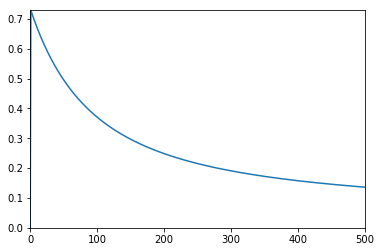

In [6]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_step,0,np.max(cost_history)])
plt.show()

In [7]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 500
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.669818
Step:  2 Cost:  0.614249
Step:  3 Cost:  0.566722
Step:  4 Cost:  0.525716
Step:  5 Cost:  0.490065
Step:  6 Cost:  0.458847
Step:  7 Cost:  0.431334
Step:  8 Cost:  0.406945
Step:  9 Cost:  0.385207
Step:  10 Cost:  0.365734
Step:  11 Cost:  0.348208
Step:  12 Cost:  0.332366
Step:  13 Cost:  0.317987
Step:  14 Cost:  0.304887
Step:  15 Cost:  0.292912
Step:  16 Cost:  0.281925
Step:  17 Cost:  0.271814
Step:  18 Cost:  0.262482
Step:  19 Cost:  0.253847
Step:  20 Cost:  0.245834
Step:  21 Cost:  0.23838
Step:  22 Cost:  0.231432
Step:  23 Cost:  0.224944
Step:  24 Cost:  0.218871
Step:  25 Cost:  0.213175
Step:  26 Cost:  0.207822
Step:  27 Cost:  0.202786
Step:  28 Cost:  0.19804
Step:  29 Cost:  0.19356
Step:  30 Cost:  0.189325
Step:  31 Cost:  0.18531
Step:  32 Cost:  0.181502
Step:  33 Cost:  0.177882
Step:  34 Cost:  0.17444
Step:  35 Cost:  0.171162
Step:  36 Cost:  0.168037
Step:  37 Cost:  0.165053
Step:  38 Cost:  0.1622
Ste

Step:  377 Cost:  0.0486614
Step:  378 Cost:  0.0486073
Step:  379 Cost:  0.0485533
Step:  380 Cost:  0.0484992
Step:  381 Cost:  0.0484454
Step:  382 Cost:  0.0483915
Step:  383 Cost:  0.0483376
Step:  384 Cost:  0.0482837
Step:  385 Cost:  0.0482299
Step:  386 Cost:  0.0481762
Step:  387 Cost:  0.0481224
Step:  388 Cost:  0.0480688
Step:  389 Cost:  0.0480152
Step:  390 Cost:  0.0479617
Step:  391 Cost:  0.0479082
Step:  392 Cost:  0.0478548
Step:  393 Cost:  0.0478014
Step:  394 Cost:  0.047748
Step:  395 Cost:  0.0476946
Step:  396 Cost:  0.0476412
Step:  397 Cost:  0.0475878
Step:  398 Cost:  0.0475344
Step:  399 Cost:  0.047481
Step:  400 Cost:  0.0474275
Step:  401 Cost:  0.0473741
Step:  402 Cost:  0.0473206
Step:  403 Cost:  0.0472672
Step:  404 Cost:  0.0472139
Step:  405 Cost:  0.0471606
Step:  406 Cost:  0.0471073
Step:  407 Cost:  0.047054
Step:  408 Cost:  0.0470006
Step:  409 Cost:  0.0469473
Step:  410 Cost:  0.046894
Step:  411 Cost:  0.0468406
Step:  412 Cost:  0.0467

In [8]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
training_step = 500
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.296635
Step:  2 Cost:  0.21645
Step:  3 Cost:  0.175638
Step:  4 Cost:  0.149713
Step:  5 Cost:  0.131565
Step:  6 Cost:  0.118124
Step:  7 Cost:  0.107769
Step:  8 Cost:  0.0995356
Step:  9 Cost:  0.0928362
Step:  10 Cost:  0.087255
Step:  11 Cost:  0.0825841
Step:  12 Cost:  0.0786749
Step:  13 Cost:  0.0753435
Step:  14 Cost:  0.0724815
Step:  15 Cost:  0.0699843
Step:  16 Cost:  0.0678274
Step:  17 Cost:  0.0659951
Step:  18 Cost:  0.0643985
Step:  19 Cost:  0.062923
Step:  20 Cost:  0.0615874
Step:  21 Cost:  0.0603451
Step:  22 Cost:  0.0592231
Step:  23 Cost:  0.0582049
Step:  24 Cost:  0.0573162
Step:  25 Cost:  0.0565209
Step:  26 Cost:  0.0557874
Step:  27 Cost:  0.0550734
Step:  28 Cost:  0.0543842
Step:  29 Cost:  0.0537362
Step:  30 Cost:  0.0531188
Step:  31 Cost:  0.0525165
Step:  32 Cost:  0.0519337
Step:  33 Cost:  0.0513557
Step:  34 Cost:  0.0507826
Step:  35 Cost:  0.0502187
Step:  36 Cost:  0.0496675
Step:  37 Cost:  0.049

Step:  380 Cost:  0.00366132
Step:  381 Cost:  0.00365867
Step:  382 Cost:  0.00365603
Step:  383 Cost:  0.00365341
Step:  384 Cost:  0.0036508
Step:  385 Cost:  0.00364821
Step:  386 Cost:  0.00364562
Step:  387 Cost:  0.00364305
Step:  388 Cost:  0.00364049
Step:  389 Cost:  0.00363794
Step:  390 Cost:  0.00363541
Step:  391 Cost:  0.00363288
Step:  392 Cost:  0.00363037
Step:  393 Cost:  0.00362787
Step:  394 Cost:  0.00362538
Step:  395 Cost:  0.0036229
Step:  396 Cost:  0.00362043
Step:  397 Cost:  0.00361797
Step:  398 Cost:  0.00361553
Step:  399 Cost:  0.00361309
Step:  400 Cost:  0.00361066
Step:  401 Cost:  0.00360825
Step:  402 Cost:  0.00360584
Step:  403 Cost:  0.00360344
Step:  404 Cost:  0.00360106
Step:  405 Cost:  0.00359868
Step:  406 Cost:  0.00359631
Step:  407 Cost:  0.00359395
Step:  408 Cost:  0.0035916
Step:  409 Cost:  0.00358926
Step:  410 Cost:  0.00358693
Step:  411 Cost:  0.0035846
Step:  412 Cost:  0.00358229
Step:  413 Cost:  0.00357998
Step:  414 Cost:  

In [9]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.001
training_step = 5000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.728605
Step:  2 Cost:  0.721907
Step:  3 Cost:  0.715317
Step:  4 Cost:  0.708834
Step:  5 Cost:  0.702456
Step:  6 Cost:  0.69618
Step:  7 Cost:  0.690005
Step:  8 Cost:  0.683928
Step:  9 Cost:  0.677946
Step:  10 Cost:  0.672059
Step:  11 Cost:  0.666263
Step:  12 Cost:  0.660558
Step:  13 Cost:  0.65494
Step:  14 Cost:  0.649408
Step:  15 Cost:  0.643962
Step:  16 Cost:  0.638598
Step:  17 Cost:  0.633315
Step:  18 Cost:  0.628112
Step:  19 Cost:  0.622987
Step:  20 Cost:  0.617938
Step:  21 Cost:  0.612963
Step:  22 Cost:  0.608062
Step:  23 Cost:  0.603232
Step:  24 Cost:  0.598472
Step:  25 Cost:  0.593781
Step:  26 Cost:  0.589158
Step:  27 Cost:  0.5846
Step:  28 Cost:  0.580108
Step:  29 Cost:  0.575679
Step:  30 Cost:  0.571312
Step:  31 Cost:  0.567007
Step:  32 Cost:  0.562761
Step:  33 Cost:  0.558575
Step:  34 Cost:  0.554446
Step:  35 Cost:  0.550374
Step:  36 Cost:  0.546358
Step:  37 Cost:  0.542397
Step:  38 Cost:  0.538489


Step:  376 Cost:  0.164265
Step:  377 Cost:  0.163976
Step:  378 Cost:  0.163688
Step:  379 Cost:  0.163402
Step:  380 Cost:  0.163117
Step:  381 Cost:  0.162833
Step:  382 Cost:  0.162551
Step:  383 Cost:  0.162269
Step:  384 Cost:  0.161989
Step:  385 Cost:  0.161711
Step:  386 Cost:  0.161433
Step:  387 Cost:  0.161157
Step:  388 Cost:  0.160882
Step:  389 Cost:  0.160608
Step:  390 Cost:  0.160336
Step:  391 Cost:  0.160064
Step:  392 Cost:  0.159794
Step:  393 Cost:  0.159525
Step:  394 Cost:  0.159257
Step:  395 Cost:  0.15899
Step:  396 Cost:  0.158724
Step:  397 Cost:  0.15846
Step:  398 Cost:  0.158196
Step:  399 Cost:  0.157934
Step:  400 Cost:  0.157672
Step:  401 Cost:  0.157412
Step:  402 Cost:  0.157153
Step:  403 Cost:  0.156895
Step:  404 Cost:  0.156638
Step:  405 Cost:  0.156383
Step:  406 Cost:  0.156128
Step:  407 Cost:  0.155874
Step:  408 Cost:  0.155622
Step:  409 Cost:  0.155371
Step:  410 Cost:  0.15512
Step:  411 Cost:  0.154871
Step:  412 Cost:  0.154623
Step

Step:  760 Cost:  0.104362
Step:  761 Cost:  0.104276
Step:  762 Cost:  0.104191
Step:  763 Cost:  0.104106
Step:  764 Cost:  0.104022
Step:  765 Cost:  0.103937
Step:  766 Cost:  0.103853
Step:  767 Cost:  0.103769
Step:  768 Cost:  0.103685
Step:  769 Cost:  0.103601
Step:  770 Cost:  0.103517
Step:  771 Cost:  0.103434
Step:  772 Cost:  0.10335
Step:  773 Cost:  0.103267
Step:  774 Cost:  0.103185
Step:  775 Cost:  0.103102
Step:  776 Cost:  0.103019
Step:  777 Cost:  0.102937
Step:  778 Cost:  0.102855
Step:  779 Cost:  0.102773
Step:  780 Cost:  0.102691
Step:  781 Cost:  0.10261
Step:  782 Cost:  0.102528
Step:  783 Cost:  0.102447
Step:  784 Cost:  0.102366
Step:  785 Cost:  0.102285
Step:  786 Cost:  0.102205
Step:  787 Cost:  0.102124
Step:  788 Cost:  0.102044
Step:  789 Cost:  0.101964
Step:  790 Cost:  0.101884
Step:  791 Cost:  0.101804
Step:  792 Cost:  0.101724
Step:  793 Cost:  0.101645
Step:  794 Cost:  0.101566
Step:  795 Cost:  0.101487
Step:  796 Cost:  0.101408
Ste

Step:  1132 Cost:  0.0819196
Step:  1133 Cost:  0.0818775
Step:  1134 Cost:  0.0818354
Step:  1135 Cost:  0.0817935
Step:  1136 Cost:  0.0817517
Step:  1137 Cost:  0.0817099
Step:  1138 Cost:  0.0816681
Step:  1139 Cost:  0.0816264
Step:  1140 Cost:  0.0815847
Step:  1141 Cost:  0.0815431
Step:  1142 Cost:  0.0815017
Step:  1143 Cost:  0.0814603
Step:  1144 Cost:  0.0814189
Step:  1145 Cost:  0.0813776
Step:  1146 Cost:  0.0813363
Step:  1147 Cost:  0.081295
Step:  1148 Cost:  0.0812539
Step:  1149 Cost:  0.0812128
Step:  1150 Cost:  0.0811718
Step:  1151 Cost:  0.0811308
Step:  1152 Cost:  0.08109
Step:  1153 Cost:  0.0810491
Step:  1154 Cost:  0.0810083
Step:  1155 Cost:  0.0809678
Step:  1156 Cost:  0.0809274
Step:  1157 Cost:  0.080887
Step:  1158 Cost:  0.0808467
Step:  1159 Cost:  0.0808064
Step:  1160 Cost:  0.0807662
Step:  1161 Cost:  0.080726
Step:  1162 Cost:  0.0806859
Step:  1163 Cost:  0.0806458
Step:  1164 Cost:  0.0806057
Step:  1165 Cost:  0.0805658
Step:  1166 Cost:  

Step:  1512 Cost:  0.0698994
Step:  1513 Cost:  0.0698758
Step:  1514 Cost:  0.0698522
Step:  1515 Cost:  0.0698287
Step:  1516 Cost:  0.0698053
Step:  1517 Cost:  0.0697818
Step:  1518 Cost:  0.0697584
Step:  1519 Cost:  0.069735
Step:  1520 Cost:  0.0697116
Step:  1521 Cost:  0.0696884
Step:  1522 Cost:  0.0696653
Step:  1523 Cost:  0.0696421
Step:  1524 Cost:  0.069619
Step:  1525 Cost:  0.0695959
Step:  1526 Cost:  0.0695729
Step:  1527 Cost:  0.0695499
Step:  1528 Cost:  0.0695269
Step:  1529 Cost:  0.0695041
Step:  1530 Cost:  0.0694814
Step:  1531 Cost:  0.0694587
Step:  1532 Cost:  0.0694361
Step:  1533 Cost:  0.0694135
Step:  1534 Cost:  0.069391
Step:  1535 Cost:  0.0693686
Step:  1536 Cost:  0.0693463
Step:  1537 Cost:  0.0693239
Step:  1538 Cost:  0.0693017
Step:  1539 Cost:  0.0692795
Step:  1540 Cost:  0.0692573
Step:  1541 Cost:  0.0692351
Step:  1542 Cost:  0.0692129
Step:  1543 Cost:  0.0691907
Step:  1544 Cost:  0.0691686
Step:  1545 Cost:  0.0691464
Step:  1546 Cost:

Step:  1897 Cost:  0.0629437
Step:  1898 Cost:  0.0629293
Step:  1899 Cost:  0.0629149
Step:  1900 Cost:  0.0629005
Step:  1901 Cost:  0.0628861
Step:  1902 Cost:  0.0628718
Step:  1903 Cost:  0.0628575
Step:  1904 Cost:  0.0628432
Step:  1905 Cost:  0.0628289
Step:  1906 Cost:  0.0628147
Step:  1907 Cost:  0.0628004
Step:  1908 Cost:  0.0627861
Step:  1909 Cost:  0.0627719
Step:  1910 Cost:  0.0627576
Step:  1911 Cost:  0.0627434
Step:  1912 Cost:  0.0627291
Step:  1913 Cost:  0.0627148
Step:  1914 Cost:  0.0627006
Step:  1915 Cost:  0.0626864
Step:  1916 Cost:  0.0626721
Step:  1917 Cost:  0.0626579
Step:  1918 Cost:  0.0626437
Step:  1919 Cost:  0.0626295
Step:  1920 Cost:  0.0626153
Step:  1921 Cost:  0.0626011
Step:  1922 Cost:  0.0625868
Step:  1923 Cost:  0.0625726
Step:  1924 Cost:  0.0625584
Step:  1925 Cost:  0.0625442
Step:  1926 Cost:  0.06253
Step:  1927 Cost:  0.0625159
Step:  1928 Cost:  0.0625017
Step:  1929 Cost:  0.0624875
Step:  1930 Cost:  0.0624735
Step:  1931 Cost

Step:  2269 Cost:  0.058409
Step:  2270 Cost:  0.0583992
Step:  2271 Cost:  0.0583895
Step:  2272 Cost:  0.0583799
Step:  2273 Cost:  0.0583703
Step:  2274 Cost:  0.0583607
Step:  2275 Cost:  0.0583511
Step:  2276 Cost:  0.0583415
Step:  2277 Cost:  0.0583319
Step:  2278 Cost:  0.0583223
Step:  2279 Cost:  0.0583128
Step:  2280 Cost:  0.0583033
Step:  2281 Cost:  0.0582938
Step:  2282 Cost:  0.0582843
Step:  2283 Cost:  0.0582747
Step:  2284 Cost:  0.0582652
Step:  2285 Cost:  0.0582557
Step:  2286 Cost:  0.0582462
Step:  2287 Cost:  0.0582367
Step:  2288 Cost:  0.0582271
Step:  2289 Cost:  0.0582176
Step:  2290 Cost:  0.0582081
Step:  2291 Cost:  0.0581986
Step:  2292 Cost:  0.0581891
Step:  2293 Cost:  0.0581796
Step:  2294 Cost:  0.0581701
Step:  2295 Cost:  0.0581606
Step:  2296 Cost:  0.0581511
Step:  2297 Cost:  0.0581416
Step:  2298 Cost:  0.0581321
Step:  2299 Cost:  0.0581226
Step:  2300 Cost:  0.0581131
Step:  2301 Cost:  0.0581036
Step:  2302 Cost:  0.0580942
Step:  2303 Cos

Step:  2636 Cost:  0.0554432
Step:  2637 Cost:  0.055436
Step:  2638 Cost:  0.0554287
Step:  2639 Cost:  0.0554214
Step:  2640 Cost:  0.0554142
Step:  2641 Cost:  0.0554069
Step:  2642 Cost:  0.0553997
Step:  2643 Cost:  0.0553924
Step:  2644 Cost:  0.0553852
Step:  2645 Cost:  0.0553779
Step:  2646 Cost:  0.0553707
Step:  2647 Cost:  0.0553634
Step:  2648 Cost:  0.0553562
Step:  2649 Cost:  0.0553489
Step:  2650 Cost:  0.0553417
Step:  2651 Cost:  0.0553344
Step:  2652 Cost:  0.0553272
Step:  2653 Cost:  0.0553199
Step:  2654 Cost:  0.0553127
Step:  2655 Cost:  0.0553055
Step:  2656 Cost:  0.0552982
Step:  2657 Cost:  0.0552909
Step:  2658 Cost:  0.0552837
Step:  2659 Cost:  0.0552765
Step:  2660 Cost:  0.0552692
Step:  2661 Cost:  0.0552619
Step:  2662 Cost:  0.0552547
Step:  2663 Cost:  0.0552475
Step:  2664 Cost:  0.0552402
Step:  2665 Cost:  0.055233
Step:  2666 Cost:  0.0552257
Step:  2667 Cost:  0.0552185
Step:  2668 Cost:  0.0552112
Step:  2669 Cost:  0.055204
Step:  2670 Cost:

Step:  2985 Cost:  0.0531322
Step:  2986 Cost:  0.0531261
Step:  2987 Cost:  0.05312
Step:  2988 Cost:  0.0531138
Step:  2989 Cost:  0.0531077
Step:  2990 Cost:  0.0531016
Step:  2991 Cost:  0.0530955
Step:  2992 Cost:  0.0530893
Step:  2993 Cost:  0.0530832
Step:  2994 Cost:  0.0530771
Step:  2995 Cost:  0.053071
Step:  2996 Cost:  0.0530648
Step:  2997 Cost:  0.0530587
Step:  2998 Cost:  0.0530526
Step:  2999 Cost:  0.0530464
Step:  3000 Cost:  0.0530403
Step:  3001 Cost:  0.0530342
Step:  3002 Cost:  0.053028
Step:  3003 Cost:  0.0530219
Step:  3004 Cost:  0.0530158
Step:  3005 Cost:  0.0530097
Step:  3006 Cost:  0.0530035
Step:  3007 Cost:  0.0529974
Step:  3008 Cost:  0.0529913
Step:  3009 Cost:  0.0529851
Step:  3010 Cost:  0.052979
Step:  3011 Cost:  0.0529729
Step:  3012 Cost:  0.0529668
Step:  3013 Cost:  0.0529606
Step:  3014 Cost:  0.0529546
Step:  3015 Cost:  0.0529485
Step:  3016 Cost:  0.0529424
Step:  3017 Cost:  0.0529363
Step:  3018 Cost:  0.0529302
Step:  3019 Cost:  

Step:  3333 Cost:  0.0510933
Step:  3334 Cost:  0.0510876
Step:  3335 Cost:  0.0510819
Step:  3336 Cost:  0.0510762
Step:  3337 Cost:  0.0510705
Step:  3338 Cost:  0.0510648
Step:  3339 Cost:  0.0510591
Step:  3340 Cost:  0.0510535
Step:  3341 Cost:  0.0510478
Step:  3342 Cost:  0.0510421
Step:  3343 Cost:  0.0510364
Step:  3344 Cost:  0.0510307
Step:  3345 Cost:  0.051025
Step:  3346 Cost:  0.0510193
Step:  3347 Cost:  0.0510136
Step:  3348 Cost:  0.051008
Step:  3349 Cost:  0.0510023
Step:  3350 Cost:  0.0509966
Step:  3351 Cost:  0.0509909
Step:  3352 Cost:  0.0509852
Step:  3353 Cost:  0.0509795
Step:  3354 Cost:  0.0509738
Step:  3355 Cost:  0.0509681
Step:  3356 Cost:  0.0509625
Step:  3357 Cost:  0.0509568
Step:  3358 Cost:  0.0509511
Step:  3359 Cost:  0.0509454
Step:  3360 Cost:  0.0509397
Step:  3361 Cost:  0.050934
Step:  3362 Cost:  0.0509283
Step:  3363 Cost:  0.0509226
Step:  3364 Cost:  0.0509169
Step:  3365 Cost:  0.0509113
Step:  3366 Cost:  0.0509056
Step:  3367 Cost:

Step:  3681 Cost:  0.0491647
Step:  3682 Cost:  0.0491593
Step:  3683 Cost:  0.0491538
Step:  3684 Cost:  0.0491484
Step:  3685 Cost:  0.049143
Step:  3686 Cost:  0.0491376
Step:  3687 Cost:  0.0491322
Step:  3688 Cost:  0.0491267
Step:  3689 Cost:  0.0491213
Step:  3690 Cost:  0.0491159
Step:  3691 Cost:  0.0491105
Step:  3692 Cost:  0.0491051
Step:  3693 Cost:  0.0490997
Step:  3694 Cost:  0.0490942
Step:  3695 Cost:  0.0490888
Step:  3696 Cost:  0.0490834
Step:  3697 Cost:  0.049078
Step:  3698 Cost:  0.0490726
Step:  3699 Cost:  0.0490671
Step:  3700 Cost:  0.0490617
Step:  3701 Cost:  0.0490563
Step:  3702 Cost:  0.0490509
Step:  3703 Cost:  0.0490455
Step:  3704 Cost:  0.04904
Step:  3705 Cost:  0.0490346
Step:  3706 Cost:  0.0490292
Step:  3707 Cost:  0.0490238
Step:  3708 Cost:  0.0490184
Step:  3709 Cost:  0.0490129
Step:  3710 Cost:  0.0490075
Step:  3711 Cost:  0.0490021
Step:  3712 Cost:  0.0489967
Step:  3713 Cost:  0.0489913
Step:  3714 Cost:  0.0489859
Step:  3715 Cost: 

Step:  4034 Cost:  0.047268
Step:  4035 Cost:  0.0472627
Step:  4036 Cost:  0.0472573
Step:  4037 Cost:  0.047252
Step:  4038 Cost:  0.0472467
Step:  4039 Cost:  0.0472414
Step:  4040 Cost:  0.0472361
Step:  4041 Cost:  0.0472307
Step:  4042 Cost:  0.0472254
Step:  4043 Cost:  0.0472201
Step:  4044 Cost:  0.0472147
Step:  4045 Cost:  0.0472094
Step:  4046 Cost:  0.0472041
Step:  4047 Cost:  0.0471987
Step:  4048 Cost:  0.0471934
Step:  4049 Cost:  0.0471881
Step:  4050 Cost:  0.0471828
Step:  4051 Cost:  0.0471774
Step:  4052 Cost:  0.0471721
Step:  4053 Cost:  0.0471668
Step:  4054 Cost:  0.0471615
Step:  4055 Cost:  0.0471561
Step:  4056 Cost:  0.0471508
Step:  4057 Cost:  0.0471455
Step:  4058 Cost:  0.0471401
Step:  4059 Cost:  0.0471348
Step:  4060 Cost:  0.0471295
Step:  4061 Cost:  0.0471242
Step:  4062 Cost:  0.0471189
Step:  4063 Cost:  0.0471135
Step:  4064 Cost:  0.0471082
Step:  4065 Cost:  0.0471029
Step:  4066 Cost:  0.0470975
Step:  4067 Cost:  0.0470922
Step:  4068 Cost

Step:  4385 Cost:  0.0453976
Step:  4386 Cost:  0.0453923
Step:  4387 Cost:  0.0453869
Step:  4388 Cost:  0.0453816
Step:  4389 Cost:  0.0453763
Step:  4390 Cost:  0.0453709
Step:  4391 Cost:  0.0453656
Step:  4392 Cost:  0.0453603
Step:  4393 Cost:  0.0453549
Step:  4394 Cost:  0.0453496
Step:  4395 Cost:  0.0453442
Step:  4396 Cost:  0.0453389
Step:  4397 Cost:  0.0453336
Step:  4398 Cost:  0.0453282
Step:  4399 Cost:  0.0453229
Step:  4400 Cost:  0.0453176
Step:  4401 Cost:  0.0453122
Step:  4402 Cost:  0.0453069
Step:  4403 Cost:  0.0453015
Step:  4404 Cost:  0.0452962
Step:  4405 Cost:  0.0452909
Step:  4406 Cost:  0.0452855
Step:  4407 Cost:  0.0452802
Step:  4408 Cost:  0.0452749
Step:  4409 Cost:  0.0452695
Step:  4410 Cost:  0.0452642
Step:  4411 Cost:  0.0452588
Step:  4412 Cost:  0.0452535
Step:  4413 Cost:  0.0452482
Step:  4414 Cost:  0.0452428
Step:  4415 Cost:  0.0452375
Step:  4416 Cost:  0.0452321
Step:  4417 Cost:  0.0452268
Step:  4418 Cost:  0.0452215
Step:  4419 Co

Step:  4726 Cost:  0.043574
Step:  4727 Cost:  0.0435686
Step:  4728 Cost:  0.0435632
Step:  4729 Cost:  0.0435579
Step:  4730 Cost:  0.0435525
Step:  4731 Cost:  0.0435472
Step:  4732 Cost:  0.0435418
Step:  4733 Cost:  0.0435364
Step:  4734 Cost:  0.0435311
Step:  4735 Cost:  0.0435257
Step:  4736 Cost:  0.0435204
Step:  4737 Cost:  0.043515
Step:  4738 Cost:  0.0435096
Step:  4739 Cost:  0.0435043
Step:  4740 Cost:  0.0434989
Step:  4741 Cost:  0.0434936
Step:  4742 Cost:  0.0434882
Step:  4743 Cost:  0.0434828
Step:  4744 Cost:  0.0434775
Step:  4745 Cost:  0.0434721
Step:  4746 Cost:  0.0434668
Step:  4747 Cost:  0.0434614
Step:  4748 Cost:  0.043456
Step:  4749 Cost:  0.0434507
Step:  4750 Cost:  0.0434453
Step:  4751 Cost:  0.04344
Step:  4752 Cost:  0.0434346
Step:  4753 Cost:  0.0434292
Step:  4754 Cost:  0.0434239
Step:  4755 Cost:  0.0434185
Step:  4756 Cost:  0.0434131
Step:  4757 Cost:  0.0434078
Step:  4758 Cost:  0.0434024
Step:  4759 Cost:  0.0433971
Step:  4760 Cost:  

In [10]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 5000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.669818
Step:  2 Cost:  0.614249
Step:  3 Cost:  0.566722
Step:  4 Cost:  0.525716
Step:  5 Cost:  0.490065
Step:  6 Cost:  0.458847
Step:  7 Cost:  0.431334
Step:  8 Cost:  0.406945
Step:  9 Cost:  0.385207
Step:  10 Cost:  0.365734
Step:  11 Cost:  0.348208
Step:  12 Cost:  0.332366
Step:  13 Cost:  0.317987
Step:  14 Cost:  0.304887
Step:  15 Cost:  0.292912
Step:  16 Cost:  0.281925
Step:  17 Cost:  0.271814
Step:  18 Cost:  0.262482
Step:  19 Cost:  0.253847
Step:  20 Cost:  0.245834
Step:  21 Cost:  0.23838
Step:  22 Cost:  0.231432
Step:  23 Cost:  0.224944
Step:  24 Cost:  0.218871
Step:  25 Cost:  0.213175
Step:  26 Cost:  0.207822
Step:  27 Cost:  0.202786
Step:  28 Cost:  0.19804
Step:  29 Cost:  0.19356
Step:  30 Cost:  0.189325
Step:  31 Cost:  0.18531
Step:  32 Cost:  0.181502
Step:  33 Cost:  0.177882
Step:  34 Cost:  0.17444
Step:  35 Cost:  0.171162
Step:  36 Cost:  0.168037
Step:  37 Cost:  0.165053
Step:  38 Cost:  0.1622
Ste

Step:  344 Cost:  0.0504654
Step:  345 Cost:  0.0504098
Step:  346 Cost:  0.0503545
Step:  347 Cost:  0.0502991
Step:  348 Cost:  0.0502438
Step:  349 Cost:  0.0501884
Step:  350 Cost:  0.0501331
Step:  351 Cost:  0.0500781
Step:  352 Cost:  0.0500229
Step:  353 Cost:  0.0499678
Step:  354 Cost:  0.0499127
Step:  355 Cost:  0.0498577
Step:  356 Cost:  0.0498029
Step:  357 Cost:  0.049748
Step:  358 Cost:  0.0496932
Step:  359 Cost:  0.0496386
Step:  360 Cost:  0.049584
Step:  361 Cost:  0.0495294
Step:  362 Cost:  0.0494751
Step:  363 Cost:  0.0494207
Step:  364 Cost:  0.0493662
Step:  365 Cost:  0.0493118
Step:  366 Cost:  0.0492574
Step:  367 Cost:  0.0492032
Step:  368 Cost:  0.049149
Step:  369 Cost:  0.0490948
Step:  370 Cost:  0.0490406
Step:  371 Cost:  0.0489864
Step:  372 Cost:  0.0489321
Step:  373 Cost:  0.0488779
Step:  374 Cost:  0.0488237
Step:  375 Cost:  0.0487695
Step:  376 Cost:  0.0487154
Step:  377 Cost:  0.0486614
Step:  378 Cost:  0.0486073
Step:  379 Cost:  0.048

Step:  689 Cost:  0.0319194
Step:  690 Cost:  0.0318666
Step:  691 Cost:  0.0318137
Step:  692 Cost:  0.0317609
Step:  693 Cost:  0.0317081
Step:  694 Cost:  0.0316554
Step:  695 Cost:  0.0316026
Step:  696 Cost:  0.0315499
Step:  697 Cost:  0.0314972
Step:  698 Cost:  0.0314445
Step:  699 Cost:  0.0313918
Step:  700 Cost:  0.0313391
Step:  701 Cost:  0.0312865
Step:  702 Cost:  0.0312339
Step:  703 Cost:  0.0311813
Step:  704 Cost:  0.0311288
Step:  705 Cost:  0.0310762
Step:  706 Cost:  0.0310237
Step:  707 Cost:  0.0309712
Step:  708 Cost:  0.0309187
Step:  709 Cost:  0.0308663
Step:  710 Cost:  0.0308139
Step:  711 Cost:  0.0307615
Step:  712 Cost:  0.0307091
Step:  713 Cost:  0.0306568
Step:  714 Cost:  0.0306044
Step:  715 Cost:  0.0305521
Step:  716 Cost:  0.0304999
Step:  717 Cost:  0.0304476
Step:  718 Cost:  0.0303954
Step:  719 Cost:  0.0303432
Step:  720 Cost:  0.030291
Step:  721 Cost:  0.0302389
Step:  722 Cost:  0.0301867
Step:  723 Cost:  0.0301346
Step:  724 Cost:  0.0

Step:  1045 Cost:  0.0157804
Step:  1046 Cost:  0.015746
Step:  1047 Cost:  0.0157116
Step:  1048 Cost:  0.0156774
Step:  1049 Cost:  0.0156432
Step:  1050 Cost:  0.0156091
Step:  1051 Cost:  0.0155751
Step:  1052 Cost:  0.0155411
Step:  1053 Cost:  0.0155072
Step:  1054 Cost:  0.0154734
Step:  1055 Cost:  0.0154396
Step:  1056 Cost:  0.015406
Step:  1057 Cost:  0.0153724
Step:  1058 Cost:  0.0153389
Step:  1059 Cost:  0.0153054
Step:  1060 Cost:  0.015272
Step:  1061 Cost:  0.0152387
Step:  1062 Cost:  0.0152055
Step:  1063 Cost:  0.0151724
Step:  1064 Cost:  0.0151393
Step:  1065 Cost:  0.0151063
Step:  1066 Cost:  0.0150734
Step:  1067 Cost:  0.0150405
Step:  1068 Cost:  0.0150077
Step:  1069 Cost:  0.014975
Step:  1070 Cost:  0.0149424
Step:  1071 Cost:  0.0149098
Step:  1072 Cost:  0.0148773
Step:  1073 Cost:  0.0148449
Step:  1074 Cost:  0.0148126
Step:  1075 Cost:  0.0147803
Step:  1076 Cost:  0.0147481
Step:  1077 Cost:  0.014716
Step:  1078 Cost:  0.0146839
Step:  1079 Cost:  

Step:  1419 Cost:  0.00764196
Step:  1420 Cost:  0.00763066
Step:  1421 Cost:  0.0076194
Step:  1422 Cost:  0.00760818
Step:  1423 Cost:  0.00759699
Step:  1424 Cost:  0.00758585
Step:  1425 Cost:  0.00757475
Step:  1426 Cost:  0.00756369
Step:  1427 Cost:  0.00755267
Step:  1428 Cost:  0.00754168
Step:  1429 Cost:  0.00753074
Step:  1430 Cost:  0.00751984
Step:  1431 Cost:  0.00750897
Step:  1432 Cost:  0.00749814
Step:  1433 Cost:  0.00748736
Step:  1434 Cost:  0.00747661
Step:  1435 Cost:  0.0074659
Step:  1436 Cost:  0.00745522
Step:  1437 Cost:  0.00744459
Step:  1438 Cost:  0.00743399
Step:  1439 Cost:  0.00742344
Step:  1440 Cost:  0.00741291
Step:  1441 Cost:  0.00740243
Step:  1442 Cost:  0.00739199
Step:  1443 Cost:  0.00738158
Step:  1444 Cost:  0.00737121
Step:  1445 Cost:  0.00736088
Step:  1446 Cost:  0.00735059
Step:  1447 Cost:  0.00734033
Step:  1448 Cost:  0.0073301
Step:  1449 Cost:  0.00731992
Step:  1450 Cost:  0.00730977
Step:  1451 Cost:  0.00729966
Step:  1452 C

Step:  1790 Cost:  0.00531343
Step:  1791 Cost:  0.00531029
Step:  1792 Cost:  0.00530717
Step:  1793 Cost:  0.00530405
Step:  1794 Cost:  0.00530095
Step:  1795 Cost:  0.00529785
Step:  1796 Cost:  0.00529476
Step:  1797 Cost:  0.00529169
Step:  1798 Cost:  0.00528862
Step:  1799 Cost:  0.00528556
Step:  1800 Cost:  0.00528251
Step:  1801 Cost:  0.00527947
Step:  1802 Cost:  0.00527643
Step:  1803 Cost:  0.00527341
Step:  1804 Cost:  0.0052704
Step:  1805 Cost:  0.00526739
Step:  1806 Cost:  0.0052644
Step:  1807 Cost:  0.00526141
Step:  1808 Cost:  0.00525843
Step:  1809 Cost:  0.00525546
Step:  1810 Cost:  0.0052525
Step:  1811 Cost:  0.00524954
Step:  1812 Cost:  0.0052466
Step:  1813 Cost:  0.00524366
Step:  1814 Cost:  0.00524074
Step:  1815 Cost:  0.00523782
Step:  1816 Cost:  0.00523491
Step:  1817 Cost:  0.00523201
Step:  1818 Cost:  0.00522911
Step:  1819 Cost:  0.00522623
Step:  1820 Cost:  0.00522336
Step:  1821 Cost:  0.00522049
Step:  1822 Cost:  0.00521763
Step:  1823 Co

Step:  2142 Cost:  0.00459149
Step:  2143 Cost:  0.00459013
Step:  2144 Cost:  0.00458878
Step:  2145 Cost:  0.00458743
Step:  2146 Cost:  0.00458608
Step:  2147 Cost:  0.00458473
Step:  2148 Cost:  0.00458339
Step:  2149 Cost:  0.00458205
Step:  2150 Cost:  0.00458071
Step:  2151 Cost:  0.00457937
Step:  2152 Cost:  0.00457804
Step:  2153 Cost:  0.0045767
Step:  2154 Cost:  0.00457538
Step:  2155 Cost:  0.00457405
Step:  2156 Cost:  0.00457272
Step:  2157 Cost:  0.0045714
Step:  2158 Cost:  0.00457008
Step:  2159 Cost:  0.00456876
Step:  2160 Cost:  0.00456744
Step:  2161 Cost:  0.00456613
Step:  2162 Cost:  0.00456482
Step:  2163 Cost:  0.00456351
Step:  2164 Cost:  0.00456221
Step:  2165 Cost:  0.0045609
Step:  2166 Cost:  0.0045596
Step:  2167 Cost:  0.0045583
Step:  2168 Cost:  0.004557
Step:  2169 Cost:  0.00455571
Step:  2170 Cost:  0.00455442
Step:  2171 Cost:  0.00455313
Step:  2172 Cost:  0.00455184
Step:  2173 Cost:  0.00455055
Step:  2174 Cost:  0.00454927
Step:  2175 Cost:

Step:  2502 Cost:  0.00421923
Step:  2503 Cost:  0.00421843
Step:  2504 Cost:  0.00421764
Step:  2505 Cost:  0.00421685
Step:  2506 Cost:  0.00421605
Step:  2507 Cost:  0.00421526
Step:  2508 Cost:  0.00421447
Step:  2509 Cost:  0.00421368
Step:  2510 Cost:  0.00421289
Step:  2511 Cost:  0.0042121
Step:  2512 Cost:  0.00421131
Step:  2513 Cost:  0.00421053
Step:  2514 Cost:  0.00420974
Step:  2515 Cost:  0.00420896
Step:  2516 Cost:  0.00420818
Step:  2517 Cost:  0.00420739
Step:  2518 Cost:  0.00420662
Step:  2519 Cost:  0.00420584
Step:  2520 Cost:  0.00420505
Step:  2521 Cost:  0.00420428
Step:  2522 Cost:  0.0042035
Step:  2523 Cost:  0.00420272
Step:  2524 Cost:  0.00420195
Step:  2525 Cost:  0.00420118
Step:  2526 Cost:  0.0042004
Step:  2527 Cost:  0.00419963
Step:  2528 Cost:  0.00419886
Step:  2529 Cost:  0.00419808
Step:  2530 Cost:  0.00419732
Step:  2531 Cost:  0.00419655
Step:  2532 Cost:  0.00419578
Step:  2533 Cost:  0.00419501
Step:  2534 Cost:  0.00419425
Step:  2535 C

Step:  2846 Cost:  0.0039929
Step:  2847 Cost:  0.00399236
Step:  2848 Cost:  0.00399181
Step:  2849 Cost:  0.00399127
Step:  2850 Cost:  0.00399072
Step:  2851 Cost:  0.00399018
Step:  2852 Cost:  0.00398964
Step:  2853 Cost:  0.0039891
Step:  2854 Cost:  0.00398856
Step:  2855 Cost:  0.00398802
Step:  2856 Cost:  0.00398748
Step:  2857 Cost:  0.00398694
Step:  2858 Cost:  0.0039864
Step:  2859 Cost:  0.00398586
Step:  2860 Cost:  0.00398532
Step:  2861 Cost:  0.00398478
Step:  2862 Cost:  0.00398425
Step:  2863 Cost:  0.00398371
Step:  2864 Cost:  0.00398317
Step:  2865 Cost:  0.00398264
Step:  2866 Cost:  0.0039821
Step:  2867 Cost:  0.00398157
Step:  2868 Cost:  0.00398104
Step:  2869 Cost:  0.0039805
Step:  2870 Cost:  0.00397997
Step:  2871 Cost:  0.00397944
Step:  2872 Cost:  0.00397891
Step:  2873 Cost:  0.00397837
Step:  2874 Cost:  0.00397785
Step:  2875 Cost:  0.00397732
Step:  2876 Cost:  0.00397679
Step:  2877 Cost:  0.00397626
Step:  2878 Cost:  0.00397573
Step:  2879 Cos

Step:  3198 Cost:  0.003829
Step:  3199 Cost:  0.00382861
Step:  3200 Cost:  0.00382821
Step:  3201 Cost:  0.00382781
Step:  3202 Cost:  0.00382741
Step:  3203 Cost:  0.00382701
Step:  3204 Cost:  0.00382662
Step:  3205 Cost:  0.00382622
Step:  3206 Cost:  0.00382582
Step:  3207 Cost:  0.00382543
Step:  3208 Cost:  0.00382503
Step:  3209 Cost:  0.00382464
Step:  3210 Cost:  0.00382424
Step:  3211 Cost:  0.00382385
Step:  3212 Cost:  0.00382345
Step:  3213 Cost:  0.00382305
Step:  3214 Cost:  0.00382266
Step:  3215 Cost:  0.00382227
Step:  3216 Cost:  0.00382187
Step:  3217 Cost:  0.00382148
Step:  3218 Cost:  0.00382109
Step:  3219 Cost:  0.0038207
Step:  3220 Cost:  0.0038203
Step:  3221 Cost:  0.00381991
Step:  3222 Cost:  0.00381952
Step:  3223 Cost:  0.00381913
Step:  3224 Cost:  0.00381874
Step:  3225 Cost:  0.00381835
Step:  3226 Cost:  0.00381796
Step:  3227 Cost:  0.00381757
Step:  3228 Cost:  0.00381717
Step:  3229 Cost:  0.00381679
Step:  3230 Cost:  0.0038164
Step:  3231 Cos

Step:  3560 Cost:  0.0037021
Step:  3561 Cost:  0.00370179
Step:  3562 Cost:  0.00370148
Step:  3563 Cost:  0.00370117
Step:  3564 Cost:  0.00370086
Step:  3565 Cost:  0.00370056
Step:  3566 Cost:  0.00370025
Step:  3567 Cost:  0.00369994
Step:  3568 Cost:  0.00369963
Step:  3569 Cost:  0.00369932
Step:  3570 Cost:  0.00369901
Step:  3571 Cost:  0.00369871
Step:  3572 Cost:  0.0036984
Step:  3573 Cost:  0.00369809
Step:  3574 Cost:  0.00369778
Step:  3575 Cost:  0.00369748
Step:  3576 Cost:  0.00369717
Step:  3577 Cost:  0.00369686
Step:  3578 Cost:  0.00369656
Step:  3579 Cost:  0.00369625
Step:  3580 Cost:  0.00369595
Step:  3581 Cost:  0.00369564
Step:  3582 Cost:  0.00369533
Step:  3583 Cost:  0.00369503
Step:  3584 Cost:  0.00369473
Step:  3585 Cost:  0.00369442
Step:  3586 Cost:  0.00369411
Step:  3587 Cost:  0.00369381
Step:  3588 Cost:  0.0036935
Step:  3589 Cost:  0.0036932
Step:  3590 Cost:  0.0036929
Step:  3591 Cost:  0.00369259
Step:  3592 Cost:  0.00369229
Step:  3593 Cos

Step:  3929 Cost:  0.00359887
Step:  3930 Cost:  0.00359861
Step:  3931 Cost:  0.00359836
Step:  3932 Cost:  0.00359811
Step:  3933 Cost:  0.00359785
Step:  3934 Cost:  0.0035976
Step:  3935 Cost:  0.00359735
Step:  3936 Cost:  0.00359709
Step:  3937 Cost:  0.00359684
Step:  3938 Cost:  0.00359658
Step:  3939 Cost:  0.00359633
Step:  3940 Cost:  0.00359608
Step:  3941 Cost:  0.00359582
Step:  3942 Cost:  0.00359557
Step:  3943 Cost:  0.00359532
Step:  3944 Cost:  0.00359507
Step:  3945 Cost:  0.00359481
Step:  3946 Cost:  0.00359456
Step:  3947 Cost:  0.00359431
Step:  3948 Cost:  0.00359406
Step:  3949 Cost:  0.00359381
Step:  3950 Cost:  0.00359355
Step:  3951 Cost:  0.0035933
Step:  3952 Cost:  0.00359305
Step:  3953 Cost:  0.0035928
Step:  3954 Cost:  0.00359255
Step:  3955 Cost:  0.00359229
Step:  3956 Cost:  0.00359204
Step:  3957 Cost:  0.00359179
Step:  3958 Cost:  0.00359154
Step:  3959 Cost:  0.00359129
Step:  3960 Cost:  0.00359104
Step:  3961 Cost:  0.00359079
Step:  3962 C

Step:  4304 Cost:  0.00351049
Step:  4305 Cost:  0.00351027
Step:  4306 Cost:  0.00351005
Step:  4307 Cost:  0.00350983
Step:  4308 Cost:  0.00350961
Step:  4309 Cost:  0.00350939
Step:  4310 Cost:  0.00350918
Step:  4311 Cost:  0.00350895
Step:  4312 Cost:  0.00350874
Step:  4313 Cost:  0.00350852
Step:  4314 Cost:  0.0035083
Step:  4315 Cost:  0.00350808
Step:  4316 Cost:  0.00350786
Step:  4317 Cost:  0.00350764
Step:  4318 Cost:  0.00350742
Step:  4319 Cost:  0.0035072
Step:  4320 Cost:  0.00350699
Step:  4321 Cost:  0.00350677
Step:  4322 Cost:  0.00350655
Step:  4323 Cost:  0.00350633
Step:  4324 Cost:  0.00350611
Step:  4325 Cost:  0.00350589
Step:  4326 Cost:  0.00350568
Step:  4327 Cost:  0.00350546
Step:  4328 Cost:  0.00350524
Step:  4329 Cost:  0.00350502
Step:  4330 Cost:  0.00350481
Step:  4331 Cost:  0.00350459
Step:  4332 Cost:  0.00350437
Step:  4333 Cost:  0.00350415
Step:  4334 Cost:  0.00350393
Step:  4335 Cost:  0.00350372
Step:  4336 Cost:  0.0035035
Step:  4337 C

Step:  4671 Cost:  0.00343401
Step:  4672 Cost:  0.00343381
Step:  4673 Cost:  0.00343361
Step:  4674 Cost:  0.00343341
Step:  4675 Cost:  0.00343321
Step:  4676 Cost:  0.00343301
Step:  4677 Cost:  0.00343282
Step:  4678 Cost:  0.00343262
Step:  4679 Cost:  0.00343242
Step:  4680 Cost:  0.00343222
Step:  4681 Cost:  0.00343202
Step:  4682 Cost:  0.00343183
Step:  4683 Cost:  0.00343163
Step:  4684 Cost:  0.00343143
Step:  4685 Cost:  0.00343123
Step:  4686 Cost:  0.00343103
Step:  4687 Cost:  0.00343084
Step:  4688 Cost:  0.00343064
Step:  4689 Cost:  0.00343044
Step:  4690 Cost:  0.00343024
Step:  4691 Cost:  0.00343005
Step:  4692 Cost:  0.00342985
Step:  4693 Cost:  0.00342965
Step:  4694 Cost:  0.00342945
Step:  4695 Cost:  0.00342926
Step:  4696 Cost:  0.00342906
Step:  4697 Cost:  0.00342886
Step:  4698 Cost:  0.00342866
Step:  4699 Cost:  0.00342847
Step:  4700 Cost:  0.00342827
Step:  4701 Cost:  0.00342807
Step:  4702 Cost:  0.00342787
Step:  4703 Cost:  0.00342768
Step:  470

In [11]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
training_step = 5000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.296635
Step:  2 Cost:  0.21645
Step:  3 Cost:  0.175638
Step:  4 Cost:  0.149713
Step:  5 Cost:  0.131565
Step:  6 Cost:  0.118124
Step:  7 Cost:  0.107769
Step:  8 Cost:  0.0995356
Step:  9 Cost:  0.0928362
Step:  10 Cost:  0.087255
Step:  11 Cost:  0.0825841
Step:  12 Cost:  0.0786749
Step:  13 Cost:  0.0753435
Step:  14 Cost:  0.0724815
Step:  15 Cost:  0.0699843
Step:  16 Cost:  0.0678274
Step:  17 Cost:  0.0659951
Step:  18 Cost:  0.0643985
Step:  19 Cost:  0.062923
Step:  20 Cost:  0.0615874
Step:  21 Cost:  0.0603451
Step:  22 Cost:  0.0592231
Step:  23 Cost:  0.0582049
Step:  24 Cost:  0.0573162
Step:  25 Cost:  0.0565209
Step:  26 Cost:  0.0557874
Step:  27 Cost:  0.0550734
Step:  28 Cost:  0.0543842
Step:  29 Cost:  0.0537362
Step:  30 Cost:  0.0531188
Step:  31 Cost:  0.0525165
Step:  32 Cost:  0.0519337
Step:  33 Cost:  0.0513557
Step:  34 Cost:  0.0507826
Step:  35 Cost:  0.0502187
Step:  36 Cost:  0.0496675
Step:  37 Cost:  0.049

Step:  355 Cost:  0.00373238
Step:  356 Cost:  0.00372933
Step:  357 Cost:  0.00372631
Step:  358 Cost:  0.0037233
Step:  359 Cost:  0.00372031
Step:  360 Cost:  0.00371734
Step:  361 Cost:  0.00371439
Step:  362 Cost:  0.00371145
Step:  363 Cost:  0.00370853
Step:  364 Cost:  0.00370563
Step:  365 Cost:  0.00370275
Step:  366 Cost:  0.00369988
Step:  367 Cost:  0.00369703
Step:  368 Cost:  0.00369419
Step:  369 Cost:  0.00369137
Step:  370 Cost:  0.00368856
Step:  371 Cost:  0.00368577
Step:  372 Cost:  0.003683
Step:  373 Cost:  0.00368024
Step:  374 Cost:  0.00367749
Step:  375 Cost:  0.00367476
Step:  376 Cost:  0.00367204
Step:  377 Cost:  0.00366934
Step:  378 Cost:  0.00366665
Step:  379 Cost:  0.00366398
Step:  380 Cost:  0.00366132
Step:  381 Cost:  0.00365867
Step:  382 Cost:  0.00365603
Step:  383 Cost:  0.00365341
Step:  384 Cost:  0.0036508
Step:  385 Cost:  0.00364821
Step:  386 Cost:  0.00364562
Step:  387 Cost:  0.00364305
Step:  388 Cost:  0.00364049
Step:  389 Cost:  

Step:  736 Cost:  0.00300609
Step:  737 Cost:  0.00300452
Step:  738 Cost:  0.00300296
Step:  739 Cost:  0.00300139
Step:  740 Cost:  0.00299982
Step:  741 Cost:  0.00299826
Step:  742 Cost:  0.00299669
Step:  743 Cost:  0.00299513
Step:  744 Cost:  0.00299356
Step:  745 Cost:  0.002992
Step:  746 Cost:  0.00299044
Step:  747 Cost:  0.00298888
Step:  748 Cost:  0.00298732
Step:  749 Cost:  0.00298576
Step:  750 Cost:  0.0029842
Step:  751 Cost:  0.00298265
Step:  752 Cost:  0.00298109
Step:  753 Cost:  0.00297953
Step:  754 Cost:  0.00297798
Step:  755 Cost:  0.00297642
Step:  756 Cost:  0.00297487
Step:  757 Cost:  0.00297332
Step:  758 Cost:  0.00297177
Step:  759 Cost:  0.00297022
Step:  760 Cost:  0.00296867
Step:  761 Cost:  0.00296712
Step:  762 Cost:  0.00296557
Step:  763 Cost:  0.00296402
Step:  764 Cost:  0.00296248
Step:  765 Cost:  0.00296093
Step:  766 Cost:  0.00295939
Step:  767 Cost:  0.00295785
Step:  768 Cost:  0.00295631
Step:  769 Cost:  0.00295477
Step:  770 Cost: 

Step:  1076 Cost:  0.00253264
Step:  1077 Cost:  0.00253151
Step:  1078 Cost:  0.00253038
Step:  1079 Cost:  0.00252925
Step:  1080 Cost:  0.00252813
Step:  1081 Cost:  0.002527
Step:  1082 Cost:  0.00252588
Step:  1083 Cost:  0.00252475
Step:  1084 Cost:  0.00252363
Step:  1085 Cost:  0.00252251
Step:  1086 Cost:  0.00252139
Step:  1087 Cost:  0.00252028
Step:  1088 Cost:  0.00251919
Step:  1089 Cost:  0.00251811
Step:  1090 Cost:  0.00251704
Step:  1091 Cost:  0.00251598
Step:  1092 Cost:  0.00251492
Step:  1093 Cost:  0.00251386
Step:  1094 Cost:  0.00251282
Step:  1095 Cost:  0.00251178
Step:  1096 Cost:  0.00251074
Step:  1097 Cost:  0.0025097
Step:  1098 Cost:  0.00250866
Step:  1099 Cost:  0.00250763
Step:  1100 Cost:  0.00250659
Step:  1101 Cost:  0.00250556
Step:  1102 Cost:  0.00250454
Step:  1103 Cost:  0.00250352
Step:  1104 Cost:  0.0025025
Step:  1105 Cost:  0.00250148
Step:  1106 Cost:  0.00250047
Step:  1107 Cost:  0.00249945
Step:  1108 Cost:  0.00249844
Step:  1109 Co

Step:  1427 Cost:  0.00222138
Step:  1428 Cost:  0.00222063
Step:  1429 Cost:  0.00221989
Step:  1430 Cost:  0.00221914
Step:  1431 Cost:  0.0022184
Step:  1432 Cost:  0.00221766
Step:  1433 Cost:  0.00221692
Step:  1434 Cost:  0.00221617
Step:  1435 Cost:  0.00221543
Step:  1436 Cost:  0.00221469
Step:  1437 Cost:  0.00221395
Step:  1438 Cost:  0.00221322
Step:  1439 Cost:  0.00221248
Step:  1440 Cost:  0.00221174
Step:  1441 Cost:  0.002211
Step:  1442 Cost:  0.00221027
Step:  1443 Cost:  0.00220953
Step:  1444 Cost:  0.0022088
Step:  1445 Cost:  0.00220807
Step:  1446 Cost:  0.00220733
Step:  1447 Cost:  0.0022066
Step:  1448 Cost:  0.00220587
Step:  1449 Cost:  0.00220514
Step:  1450 Cost:  0.00220441
Step:  1451 Cost:  0.00220368
Step:  1452 Cost:  0.00220295
Step:  1453 Cost:  0.00220222
Step:  1454 Cost:  0.0022015
Step:  1455 Cost:  0.00220077
Step:  1456 Cost:  0.00220004
Step:  1457 Cost:  0.00219932
Step:  1458 Cost:  0.00219859
Step:  1459 Cost:  0.00219787
Step:  1460 Cost

Step:  1780 Cost:  0.00199881
Step:  1781 Cost:  0.00199829
Step:  1782 Cost:  0.00199777
Step:  1783 Cost:  0.00199724
Step:  1784 Cost:  0.00199672
Step:  1785 Cost:  0.0019962
Step:  1786 Cost:  0.00199568
Step:  1787 Cost:  0.00199516
Step:  1788 Cost:  0.00199464
Step:  1789 Cost:  0.00199412
Step:  1790 Cost:  0.0019936
Step:  1791 Cost:  0.00199308
Step:  1792 Cost:  0.00199256
Step:  1793 Cost:  0.00199205
Step:  1794 Cost:  0.00199153
Step:  1795 Cost:  0.00199101
Step:  1796 Cost:  0.0019905
Step:  1797 Cost:  0.00198998
Step:  1798 Cost:  0.00198947
Step:  1799 Cost:  0.00198895
Step:  1800 Cost:  0.00198844
Step:  1801 Cost:  0.00198793
Step:  1802 Cost:  0.00198741
Step:  1803 Cost:  0.0019869
Step:  1804 Cost:  0.00198639
Step:  1805 Cost:  0.00198588
Step:  1806 Cost:  0.00198537
Step:  1807 Cost:  0.00198486
Step:  1808 Cost:  0.00198435
Step:  1809 Cost:  0.00198384
Step:  1810 Cost:  0.00198333
Step:  1811 Cost:  0.00198282
Step:  1812 Cost:  0.00198232
Step:  1813 Co

Step:  2137 Cost:  0.00184378
Step:  2138 Cost:  0.00184342
Step:  2139 Cost:  0.00184307
Step:  2140 Cost:  0.00184272
Step:  2141 Cost:  0.00184237
Step:  2142 Cost:  0.00184202
Step:  2143 Cost:  0.00184167
Step:  2144 Cost:  0.00184132
Step:  2145 Cost:  0.00184097
Step:  2146 Cost:  0.00184062
Step:  2147 Cost:  0.00184027
Step:  2148 Cost:  0.00183992
Step:  2149 Cost:  0.00183957
Step:  2150 Cost:  0.00183923
Step:  2151 Cost:  0.00183888
Step:  2152 Cost:  0.00183853
Step:  2153 Cost:  0.00183819
Step:  2154 Cost:  0.00183784
Step:  2155 Cost:  0.0018375
Step:  2156 Cost:  0.00183715
Step:  2157 Cost:  0.00183681
Step:  2158 Cost:  0.00183646
Step:  2159 Cost:  0.00183612
Step:  2160 Cost:  0.00183577
Step:  2161 Cost:  0.00183543
Step:  2162 Cost:  0.00183509
Step:  2163 Cost:  0.00183475
Step:  2164 Cost:  0.00183441
Step:  2165 Cost:  0.00183406
Step:  2166 Cost:  0.00183372
Step:  2167 Cost:  0.00183338
Step:  2168 Cost:  0.00183304
Step:  2169 Cost:  0.0018327
Step:  2170 

Step:  2528 Cost:  0.00173394
Step:  2529 Cost:  0.00173373
Step:  2530 Cost:  0.00173351
Step:  2531 Cost:  0.00173329
Step:  2532 Cost:  0.00173308
Step:  2533 Cost:  0.00173286
Step:  2534 Cost:  0.00173264
Step:  2535 Cost:  0.00173243
Step:  2536 Cost:  0.00173221
Step:  2537 Cost:  0.001732
Step:  2538 Cost:  0.00173178
Step:  2539 Cost:  0.00173157
Step:  2540 Cost:  0.00173135
Step:  2541 Cost:  0.00173114
Step:  2542 Cost:  0.00173092
Step:  2543 Cost:  0.00173071
Step:  2544 Cost:  0.0017305
Step:  2545 Cost:  0.00173028
Step:  2546 Cost:  0.00173007
Step:  2547 Cost:  0.00172986
Step:  2548 Cost:  0.00172965
Step:  2549 Cost:  0.00172943
Step:  2550 Cost:  0.00172922
Step:  2551 Cost:  0.00172901
Step:  2552 Cost:  0.0017288
Step:  2553 Cost:  0.00172859
Step:  2554 Cost:  0.00172838
Step:  2555 Cost:  0.00172817
Step:  2556 Cost:  0.00172796
Step:  2557 Cost:  0.00172775
Step:  2558 Cost:  0.00172754
Step:  2559 Cost:  0.00172733
Step:  2560 Cost:  0.00172712
Step:  2561 Co

Step:  2904 Cost:  0.00166951
Step:  2905 Cost:  0.00166938
Step:  2906 Cost:  0.00166925
Step:  2907 Cost:  0.00166912
Step:  2908 Cost:  0.00166899
Step:  2909 Cost:  0.00166886
Step:  2910 Cost:  0.00166873
Step:  2911 Cost:  0.0016686
Step:  2912 Cost:  0.00166847
Step:  2913 Cost:  0.00166834
Step:  2914 Cost:  0.00166821
Step:  2915 Cost:  0.00166808
Step:  2916 Cost:  0.00166795
Step:  2917 Cost:  0.00166782
Step:  2918 Cost:  0.00166769
Step:  2919 Cost:  0.00166757
Step:  2920 Cost:  0.00166744
Step:  2921 Cost:  0.00166731
Step:  2922 Cost:  0.00166718
Step:  2923 Cost:  0.00166705
Step:  2924 Cost:  0.00166692
Step:  2925 Cost:  0.0016668
Step:  2926 Cost:  0.00166667
Step:  2927 Cost:  0.00166654
Step:  2928 Cost:  0.00166642
Step:  2929 Cost:  0.00166629
Step:  2930 Cost:  0.00166616
Step:  2931 Cost:  0.00166604
Step:  2932 Cost:  0.00166591
Step:  2933 Cost:  0.00166578
Step:  2934 Cost:  0.00166566
Step:  2935 Cost:  0.00166553
Step:  2936 Cost:  0.00166541
Step:  2937 

Step:  3299 Cost:  0.00162991
Step:  3300 Cost:  0.00162984
Step:  3301 Cost:  0.00162976
Step:  3302 Cost:  0.00162969
Step:  3303 Cost:  0.00162962
Step:  3304 Cost:  0.00162954
Step:  3305 Cost:  0.00162947
Step:  3306 Cost:  0.00162939
Step:  3307 Cost:  0.00162932
Step:  3308 Cost:  0.00162925
Step:  3309 Cost:  0.00162918
Step:  3310 Cost:  0.0016291
Step:  3311 Cost:  0.00162903
Step:  3312 Cost:  0.00162896
Step:  3313 Cost:  0.00162888
Step:  3314 Cost:  0.00162881
Step:  3315 Cost:  0.00162874
Step:  3316 Cost:  0.00162867
Step:  3317 Cost:  0.00162859
Step:  3318 Cost:  0.00162852
Step:  3319 Cost:  0.00162845
Step:  3320 Cost:  0.00162838
Step:  3321 Cost:  0.00162831
Step:  3322 Cost:  0.00162823
Step:  3323 Cost:  0.00162816
Step:  3324 Cost:  0.00162809
Step:  3325 Cost:  0.00162802
Step:  3326 Cost:  0.00162795
Step:  3327 Cost:  0.00162788
Step:  3328 Cost:  0.00162781
Step:  3329 Cost:  0.00162773
Step:  3330 Cost:  0.00162766
Step:  3331 Cost:  0.00162759
Step:  3332

Step:  3671 Cost:  0.00160876
Step:  3672 Cost:  0.00160872
Step:  3673 Cost:  0.00160868
Step:  3674 Cost:  0.00160863
Step:  3675 Cost:  0.00160859
Step:  3676 Cost:  0.00160855
Step:  3677 Cost:  0.00160851
Step:  3678 Cost:  0.00160847
Step:  3679 Cost:  0.00160842
Step:  3680 Cost:  0.00160838
Step:  3681 Cost:  0.00160834
Step:  3682 Cost:  0.0016083
Step:  3683 Cost:  0.00160826
Step:  3684 Cost:  0.00160822
Step:  3685 Cost:  0.00160817
Step:  3686 Cost:  0.00160813
Step:  3687 Cost:  0.00160809
Step:  3688 Cost:  0.00160805
Step:  3689 Cost:  0.00160801
Step:  3690 Cost:  0.00160797
Step:  3691 Cost:  0.00160793
Step:  3692 Cost:  0.00160789
Step:  3693 Cost:  0.00160785
Step:  3694 Cost:  0.00160781
Step:  3695 Cost:  0.00160776
Step:  3696 Cost:  0.00160772
Step:  3697 Cost:  0.00160768
Step:  3698 Cost:  0.00160764
Step:  3699 Cost:  0.0016076
Step:  3700 Cost:  0.00160756
Step:  3701 Cost:  0.00160752
Step:  3702 Cost:  0.00160748
Step:  3703 Cost:  0.00160744
Step:  3704 

Step:  4043 Cost:  0.00159677
Step:  4044 Cost:  0.00159675
Step:  4045 Cost:  0.00159673
Step:  4046 Cost:  0.0015967
Step:  4047 Cost:  0.00159668
Step:  4048 Cost:  0.00159665
Step:  4049 Cost:  0.00159663
Step:  4050 Cost:  0.00159661
Step:  4051 Cost:  0.00159658
Step:  4052 Cost:  0.00159656
Step:  4053 Cost:  0.00159654
Step:  4054 Cost:  0.00159651
Step:  4055 Cost:  0.00159649
Step:  4056 Cost:  0.00159647
Step:  4057 Cost:  0.00159644
Step:  4058 Cost:  0.00159642
Step:  4059 Cost:  0.0015964
Step:  4060 Cost:  0.00159637
Step:  4061 Cost:  0.00159635
Step:  4062 Cost:  0.00159633
Step:  4063 Cost:  0.00159631
Step:  4064 Cost:  0.00159628
Step:  4065 Cost:  0.00159626
Step:  4066 Cost:  0.00159624
Step:  4067 Cost:  0.00159621
Step:  4068 Cost:  0.00159619
Step:  4069 Cost:  0.00159617
Step:  4070 Cost:  0.00159615
Step:  4071 Cost:  0.00159612
Step:  4072 Cost:  0.0015961
Step:  4073 Cost:  0.00159608
Step:  4074 Cost:  0.00159605
Step:  4075 Cost:  0.00159603
Step:  4076 C

Step:  4424 Cost:  0.00158995
Step:  4425 Cost:  0.00158994
Step:  4426 Cost:  0.00158993
Step:  4427 Cost:  0.00158992
Step:  4428 Cost:  0.0015899
Step:  4429 Cost:  0.00158989
Step:  4430 Cost:  0.00158988
Step:  4431 Cost:  0.00158986
Step:  4432 Cost:  0.00158985
Step:  4433 Cost:  0.00158984
Step:  4434 Cost:  0.00158982
Step:  4435 Cost:  0.00158981
Step:  4436 Cost:  0.0015898
Step:  4437 Cost:  0.00158979
Step:  4438 Cost:  0.00158977
Step:  4439 Cost:  0.00158976
Step:  4440 Cost:  0.00158975
Step:  4441 Cost:  0.00158974
Step:  4442 Cost:  0.00158972
Step:  4443 Cost:  0.00158971
Step:  4444 Cost:  0.0015897
Step:  4445 Cost:  0.00158969
Step:  4446 Cost:  0.00158967
Step:  4447 Cost:  0.00158966
Step:  4448 Cost:  0.00158965
Step:  4449 Cost:  0.00158964
Step:  4450 Cost:  0.00158962
Step:  4451 Cost:  0.00158961
Step:  4452 Cost:  0.0015896
Step:  4453 Cost:  0.00158959
Step:  4454 Cost:  0.00158957
Step:  4455 Cost:  0.00158956
Step:  4456 Cost:  0.00158955
Step:  4457 Co

Step:  4794 Cost:  0.0015863
Step:  4795 Cost:  0.00158629
Step:  4796 Cost:  0.00158628
Step:  4797 Cost:  0.00158628
Step:  4798 Cost:  0.00158627
Step:  4799 Cost:  0.00158626
Step:  4800 Cost:  0.00158625
Step:  4801 Cost:  0.00158625
Step:  4802 Cost:  0.00158624
Step:  4803 Cost:  0.00158623
Step:  4804 Cost:  0.00158623
Step:  4805 Cost:  0.00158622
Step:  4806 Cost:  0.00158621
Step:  4807 Cost:  0.0015862
Step:  4808 Cost:  0.0015862
Step:  4809 Cost:  0.00158619
Step:  4810 Cost:  0.00158618
Step:  4811 Cost:  0.00158617
Step:  4812 Cost:  0.00158617
Step:  4813 Cost:  0.00158616
Step:  4814 Cost:  0.00158615
Step:  4815 Cost:  0.00158615
Step:  4816 Cost:  0.00158614
Step:  4817 Cost:  0.00158613
Step:  4818 Cost:  0.00158613
Step:  4819 Cost:  0.00158612
Step:  4820 Cost:  0.00158611
Step:  4821 Cost:  0.0015861
Step:  4822 Cost:  0.0015861
Step:  4823 Cost:  0.00158609
Step:  4824 Cost:  0.00158608
Step:  4825 Cost:  0.00158608
Step:  4826 Cost:  0.00158607
Step:  4827 Cos

In [12]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.001
training_step = 10000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.728605
Step:  2 Cost:  0.721907
Step:  3 Cost:  0.715317
Step:  4 Cost:  0.708834
Step:  5 Cost:  0.702456
Step:  6 Cost:  0.69618
Step:  7 Cost:  0.690005
Step:  8 Cost:  0.683928
Step:  9 Cost:  0.677946
Step:  10 Cost:  0.672059
Step:  11 Cost:  0.666263
Step:  12 Cost:  0.660558
Step:  13 Cost:  0.65494
Step:  14 Cost:  0.649408
Step:  15 Cost:  0.643962
Step:  16 Cost:  0.638598
Step:  17 Cost:  0.633315
Step:  18 Cost:  0.628112
Step:  19 Cost:  0.622987
Step:  20 Cost:  0.617938
Step:  21 Cost:  0.612963
Step:  22 Cost:  0.608062
Step:  23 Cost:  0.603232
Step:  24 Cost:  0.598472
Step:  25 Cost:  0.593781
Step:  26 Cost:  0.589158
Step:  27 Cost:  0.5846
Step:  28 Cost:  0.580108
Step:  29 Cost:  0.575679
Step:  30 Cost:  0.571312
Step:  31 Cost:  0.567007
Step:  32 Cost:  0.562761
Step:  33 Cost:  0.558575
Step:  34 Cost:  0.554446
Step:  35 Cost:  0.550374
Step:  36 Cost:  0.546358
Step:  37 Cost:  0.542397
Step:  38 Cost:  0.538489


Step:  376 Cost:  0.164265
Step:  377 Cost:  0.163976
Step:  378 Cost:  0.163688
Step:  379 Cost:  0.163402
Step:  380 Cost:  0.163117
Step:  381 Cost:  0.162833
Step:  382 Cost:  0.162551
Step:  383 Cost:  0.162269
Step:  384 Cost:  0.161989
Step:  385 Cost:  0.161711
Step:  386 Cost:  0.161433
Step:  387 Cost:  0.161157
Step:  388 Cost:  0.160882
Step:  389 Cost:  0.160608
Step:  390 Cost:  0.160336
Step:  391 Cost:  0.160064
Step:  392 Cost:  0.159794
Step:  393 Cost:  0.159525
Step:  394 Cost:  0.159257
Step:  395 Cost:  0.15899
Step:  396 Cost:  0.158724
Step:  397 Cost:  0.15846
Step:  398 Cost:  0.158196
Step:  399 Cost:  0.157934
Step:  400 Cost:  0.157672
Step:  401 Cost:  0.157412
Step:  402 Cost:  0.157153
Step:  403 Cost:  0.156895
Step:  404 Cost:  0.156638
Step:  405 Cost:  0.156383
Step:  406 Cost:  0.156128
Step:  407 Cost:  0.155874
Step:  408 Cost:  0.155622
Step:  409 Cost:  0.155371
Step:  410 Cost:  0.15512
Step:  411 Cost:  0.154871
Step:  412 Cost:  0.154623
Step

Step:  760 Cost:  0.104362
Step:  761 Cost:  0.104276
Step:  762 Cost:  0.104191
Step:  763 Cost:  0.104106
Step:  764 Cost:  0.104022
Step:  765 Cost:  0.103937
Step:  766 Cost:  0.103853
Step:  767 Cost:  0.103769
Step:  768 Cost:  0.103685
Step:  769 Cost:  0.103601
Step:  770 Cost:  0.103517
Step:  771 Cost:  0.103434
Step:  772 Cost:  0.10335
Step:  773 Cost:  0.103267
Step:  774 Cost:  0.103185
Step:  775 Cost:  0.103102
Step:  776 Cost:  0.103019
Step:  777 Cost:  0.102937
Step:  778 Cost:  0.102855
Step:  779 Cost:  0.102773
Step:  780 Cost:  0.102691
Step:  781 Cost:  0.10261
Step:  782 Cost:  0.102528
Step:  783 Cost:  0.102447
Step:  784 Cost:  0.102366
Step:  785 Cost:  0.102285
Step:  786 Cost:  0.102205
Step:  787 Cost:  0.102124
Step:  788 Cost:  0.102044
Step:  789 Cost:  0.101964
Step:  790 Cost:  0.101884
Step:  791 Cost:  0.101804
Step:  792 Cost:  0.101724
Step:  793 Cost:  0.101645
Step:  794 Cost:  0.101566
Step:  795 Cost:  0.101487
Step:  796 Cost:  0.101408
Ste

Step:  1142 Cost:  0.0815017
Step:  1143 Cost:  0.0814603
Step:  1144 Cost:  0.0814189
Step:  1145 Cost:  0.0813776
Step:  1146 Cost:  0.0813363
Step:  1147 Cost:  0.081295
Step:  1148 Cost:  0.0812539
Step:  1149 Cost:  0.0812128
Step:  1150 Cost:  0.0811718
Step:  1151 Cost:  0.0811308
Step:  1152 Cost:  0.08109
Step:  1153 Cost:  0.0810491
Step:  1154 Cost:  0.0810083
Step:  1155 Cost:  0.0809678
Step:  1156 Cost:  0.0809274
Step:  1157 Cost:  0.080887
Step:  1158 Cost:  0.0808467
Step:  1159 Cost:  0.0808064
Step:  1160 Cost:  0.0807662
Step:  1161 Cost:  0.080726
Step:  1162 Cost:  0.0806859
Step:  1163 Cost:  0.0806458
Step:  1164 Cost:  0.0806057
Step:  1165 Cost:  0.0805658
Step:  1166 Cost:  0.0805259
Step:  1167 Cost:  0.0804861
Step:  1168 Cost:  0.0804463
Step:  1169 Cost:  0.0804066
Step:  1170 Cost:  0.0803669
Step:  1171 Cost:  0.0803273
Step:  1172 Cost:  0.0802877
Step:  1173 Cost:  0.0802481
Step:  1174 Cost:  0.0802087
Step:  1175 Cost:  0.0801691
Step:  1176 Cost:  

Step:  1527 Cost:  0.0695499
Step:  1528 Cost:  0.0695269
Step:  1529 Cost:  0.0695041
Step:  1530 Cost:  0.0694814
Step:  1531 Cost:  0.0694587
Step:  1532 Cost:  0.0694361
Step:  1533 Cost:  0.0694135
Step:  1534 Cost:  0.069391
Step:  1535 Cost:  0.0693686
Step:  1536 Cost:  0.0693463
Step:  1537 Cost:  0.0693239
Step:  1538 Cost:  0.0693017
Step:  1539 Cost:  0.0692795
Step:  1540 Cost:  0.0692573
Step:  1541 Cost:  0.0692351
Step:  1542 Cost:  0.0692129
Step:  1543 Cost:  0.0691907
Step:  1544 Cost:  0.0691686
Step:  1545 Cost:  0.0691464
Step:  1546 Cost:  0.0691243
Step:  1547 Cost:  0.0691022
Step:  1548 Cost:  0.0690801
Step:  1549 Cost:  0.0690581
Step:  1550 Cost:  0.0690362
Step:  1551 Cost:  0.0690142
Step:  1552 Cost:  0.0689923
Step:  1553 Cost:  0.0689703
Step:  1554 Cost:  0.0689484
Step:  1555 Cost:  0.0689265
Step:  1556 Cost:  0.0689046
Step:  1557 Cost:  0.0688829
Step:  1558 Cost:  0.0688611
Step:  1559 Cost:  0.0688394
Step:  1560 Cost:  0.0688176
Step:  1561 Cos

Step:  1904 Cost:  0.0628432
Step:  1905 Cost:  0.0628289
Step:  1906 Cost:  0.0628147
Step:  1907 Cost:  0.0628004
Step:  1908 Cost:  0.0627861
Step:  1909 Cost:  0.0627719
Step:  1910 Cost:  0.0627576
Step:  1911 Cost:  0.0627434
Step:  1912 Cost:  0.0627291
Step:  1913 Cost:  0.0627148
Step:  1914 Cost:  0.0627006
Step:  1915 Cost:  0.0626864
Step:  1916 Cost:  0.0626721
Step:  1917 Cost:  0.0626579
Step:  1918 Cost:  0.0626437
Step:  1919 Cost:  0.0626295
Step:  1920 Cost:  0.0626153
Step:  1921 Cost:  0.0626011
Step:  1922 Cost:  0.0625868
Step:  1923 Cost:  0.0625726
Step:  1924 Cost:  0.0625584
Step:  1925 Cost:  0.0625442
Step:  1926 Cost:  0.06253
Step:  1927 Cost:  0.0625159
Step:  1928 Cost:  0.0625017
Step:  1929 Cost:  0.0624875
Step:  1930 Cost:  0.0624735
Step:  1931 Cost:  0.0624594
Step:  1932 Cost:  0.0624454
Step:  1933 Cost:  0.0624313
Step:  1934 Cost:  0.0624173
Step:  1935 Cost:  0.0624032
Step:  1936 Cost:  0.0623892
Step:  1937 Cost:  0.0623752
Step:  1938 Cost

Step:  2297 Cost:  0.0581416
Step:  2298 Cost:  0.0581321
Step:  2299 Cost:  0.0581226
Step:  2300 Cost:  0.0581131
Step:  2301 Cost:  0.0581036
Step:  2302 Cost:  0.0580942
Step:  2303 Cost:  0.0580848
Step:  2304 Cost:  0.0580754
Step:  2305 Cost:  0.058066
Step:  2306 Cost:  0.0580566
Step:  2307 Cost:  0.0580472
Step:  2308 Cost:  0.0580379
Step:  2309 Cost:  0.0580286
Step:  2310 Cost:  0.0580194
Step:  2311 Cost:  0.0580103
Step:  2312 Cost:  0.0580012
Step:  2313 Cost:  0.0579922
Step:  2314 Cost:  0.0579831
Step:  2315 Cost:  0.0579741
Step:  2316 Cost:  0.057965
Step:  2317 Cost:  0.0579559
Step:  2318 Cost:  0.0579469
Step:  2319 Cost:  0.0579378
Step:  2320 Cost:  0.0579288
Step:  2321 Cost:  0.0579198
Step:  2322 Cost:  0.0579107
Step:  2323 Cost:  0.0579017
Step:  2324 Cost:  0.0578926
Step:  2325 Cost:  0.0578835
Step:  2326 Cost:  0.0578745
Step:  2327 Cost:  0.0578655
Step:  2328 Cost:  0.0578564
Step:  2329 Cost:  0.0578474
Step:  2330 Cost:  0.0578383
Step:  2331 Cost

Step:  2684 Cost:  0.0550963
Step:  2685 Cost:  0.0550891
Step:  2686 Cost:  0.0550819
Step:  2687 Cost:  0.0550748
Step:  2688 Cost:  0.0550676
Step:  2689 Cost:  0.0550604
Step:  2690 Cost:  0.0550532
Step:  2691 Cost:  0.0550461
Step:  2692 Cost:  0.0550389
Step:  2693 Cost:  0.0550319
Step:  2694 Cost:  0.0550247
Step:  2695 Cost:  0.0550176
Step:  2696 Cost:  0.0550105
Step:  2697 Cost:  0.0550034
Step:  2698 Cost:  0.0549964
Step:  2699 Cost:  0.0549894
Step:  2700 Cost:  0.0549824
Step:  2701 Cost:  0.0549754
Step:  2702 Cost:  0.0549684
Step:  2703 Cost:  0.0549615
Step:  2704 Cost:  0.0549545
Step:  2705 Cost:  0.0549475
Step:  2706 Cost:  0.0549405
Step:  2707 Cost:  0.0549335
Step:  2708 Cost:  0.0549266
Step:  2709 Cost:  0.0549196
Step:  2710 Cost:  0.0549126
Step:  2711 Cost:  0.0549056
Step:  2712 Cost:  0.0548987
Step:  2713 Cost:  0.0548917
Step:  2714 Cost:  0.0548847
Step:  2715 Cost:  0.0548777
Step:  2716 Cost:  0.0548708
Step:  2717 Cost:  0.0548638
Step:  2718 Co

Step:  3058 Cost:  0.0526898
Step:  3059 Cost:  0.0526838
Step:  3060 Cost:  0.0526779
Step:  3061 Cost:  0.052672
Step:  3062 Cost:  0.0526661
Step:  3063 Cost:  0.0526602
Step:  3064 Cost:  0.0526543
Step:  3065 Cost:  0.0526484
Step:  3066 Cost:  0.0526425
Step:  3067 Cost:  0.0526366
Step:  3068 Cost:  0.0526307
Step:  3069 Cost:  0.0526248
Step:  3070 Cost:  0.0526189
Step:  3071 Cost:  0.052613
Step:  3072 Cost:  0.0526071
Step:  3073 Cost:  0.0526012
Step:  3074 Cost:  0.0525953
Step:  3075 Cost:  0.0525894
Step:  3076 Cost:  0.0525834
Step:  3077 Cost:  0.0525775
Step:  3078 Cost:  0.0525716
Step:  3079 Cost:  0.0525657
Step:  3080 Cost:  0.0525598
Step:  3081 Cost:  0.0525539
Step:  3082 Cost:  0.052548
Step:  3083 Cost:  0.0525421
Step:  3084 Cost:  0.0525362
Step:  3085 Cost:  0.0525304
Step:  3086 Cost:  0.0525245
Step:  3087 Cost:  0.0525186
Step:  3088 Cost:  0.0525128
Step:  3089 Cost:  0.0525069
Step:  3090 Cost:  0.052501
Step:  3091 Cost:  0.0524952
Step:  3092 Cost: 

Step:  3442 Cost:  0.0504747
Step:  3443 Cost:  0.0504691
Step:  3444 Cost:  0.0504636
Step:  3445 Cost:  0.050458
Step:  3446 Cost:  0.0504525
Step:  3447 Cost:  0.0504469
Step:  3448 Cost:  0.0504414
Step:  3449 Cost:  0.0504358
Step:  3450 Cost:  0.0504303
Step:  3451 Cost:  0.0504247
Step:  3452 Cost:  0.0504192
Step:  3453 Cost:  0.0504137
Step:  3454 Cost:  0.0504081
Step:  3455 Cost:  0.0504026
Step:  3456 Cost:  0.0503971
Step:  3457 Cost:  0.0503915
Step:  3458 Cost:  0.050386
Step:  3459 Cost:  0.0503804
Step:  3460 Cost:  0.0503749
Step:  3461 Cost:  0.0503694
Step:  3462 Cost:  0.0503639
Step:  3463 Cost:  0.0503583
Step:  3464 Cost:  0.0503528
Step:  3465 Cost:  0.0503473
Step:  3466 Cost:  0.0503417
Step:  3467 Cost:  0.0503362
Step:  3468 Cost:  0.0503307
Step:  3469 Cost:  0.0503251
Step:  3470 Cost:  0.0503196
Step:  3471 Cost:  0.0503141
Step:  3472 Cost:  0.0503085
Step:  3473 Cost:  0.050303
Step:  3474 Cost:  0.0502975
Step:  3475 Cost:  0.0502919
Step:  3476 Cost:

Step:  3827 Cost:  0.0483752
Step:  3828 Cost:  0.0483698
Step:  3829 Cost:  0.0483645
Step:  3830 Cost:  0.0483591
Step:  3831 Cost:  0.0483537
Step:  3832 Cost:  0.0483483
Step:  3833 Cost:  0.0483429
Step:  3834 Cost:  0.0483375
Step:  3835 Cost:  0.0483322
Step:  3836 Cost:  0.0483268
Step:  3837 Cost:  0.0483214
Step:  3838 Cost:  0.048316
Step:  3839 Cost:  0.0483106
Step:  3840 Cost:  0.0483052
Step:  3841 Cost:  0.0482998
Step:  3842 Cost:  0.0482944
Step:  3843 Cost:  0.0482891
Step:  3844 Cost:  0.0482837
Step:  3845 Cost:  0.0482783
Step:  3846 Cost:  0.0482729
Step:  3847 Cost:  0.0482675
Step:  3848 Cost:  0.0482621
Step:  3849 Cost:  0.0482568
Step:  3850 Cost:  0.0482514
Step:  3851 Cost:  0.048246
Step:  3852 Cost:  0.0482406
Step:  3853 Cost:  0.0482352
Step:  3854 Cost:  0.0482299
Step:  3855 Cost:  0.0482245
Step:  3856 Cost:  0.0482191
Step:  3857 Cost:  0.0482138
Step:  3858 Cost:  0.0482084
Step:  3859 Cost:  0.048203
Step:  3860 Cost:  0.0481977
Step:  3861 Cost:

Step:  4197 Cost:  0.0463995
Step:  4198 Cost:  0.0463942
Step:  4199 Cost:  0.0463889
Step:  4200 Cost:  0.0463835
Step:  4201 Cost:  0.0463782
Step:  4202 Cost:  0.0463729
Step:  4203 Cost:  0.0463676
Step:  4204 Cost:  0.0463623
Step:  4205 Cost:  0.0463569
Step:  4206 Cost:  0.0463516
Step:  4207 Cost:  0.0463463
Step:  4208 Cost:  0.0463409
Step:  4209 Cost:  0.0463356
Step:  4210 Cost:  0.0463303
Step:  4211 Cost:  0.046325
Step:  4212 Cost:  0.0463196
Step:  4213 Cost:  0.0463143
Step:  4214 Cost:  0.046309
Step:  4215 Cost:  0.0463037
Step:  4216 Cost:  0.0462984
Step:  4217 Cost:  0.046293
Step:  4218 Cost:  0.0462877
Step:  4219 Cost:  0.0462824
Step:  4220 Cost:  0.0462771
Step:  4221 Cost:  0.0462717
Step:  4222 Cost:  0.0462664
Step:  4223 Cost:  0.0462611
Step:  4224 Cost:  0.0462558
Step:  4225 Cost:  0.0462504
Step:  4226 Cost:  0.0462451
Step:  4227 Cost:  0.0462398
Step:  4228 Cost:  0.0462345
Step:  4229 Cost:  0.0462291
Step:  4230 Cost:  0.0462238
Step:  4231 Cost:

Step:  4583 Cost:  0.0443397
Step:  4584 Cost:  0.0443344
Step:  4585 Cost:  0.044329
Step:  4586 Cost:  0.0443237
Step:  4587 Cost:  0.0443183
Step:  4588 Cost:  0.044313
Step:  4589 Cost:  0.0443076
Step:  4590 Cost:  0.0443023
Step:  4591 Cost:  0.0442969
Step:  4592 Cost:  0.0442916
Step:  4593 Cost:  0.0442862
Step:  4594 Cost:  0.0442809
Step:  4595 Cost:  0.0442755
Step:  4596 Cost:  0.0442702
Step:  4597 Cost:  0.0442648
Step:  4598 Cost:  0.0442594
Step:  4599 Cost:  0.0442541
Step:  4600 Cost:  0.0442487
Step:  4601 Cost:  0.0442434
Step:  4602 Cost:  0.0442381
Step:  4603 Cost:  0.0442327
Step:  4604 Cost:  0.0442273
Step:  4605 Cost:  0.044222
Step:  4606 Cost:  0.0442166
Step:  4607 Cost:  0.0442113
Step:  4608 Cost:  0.0442059
Step:  4609 Cost:  0.0442006
Step:  4610 Cost:  0.0441952
Step:  4611 Cost:  0.0441899
Step:  4612 Cost:  0.0441845
Step:  4613 Cost:  0.0441792
Step:  4614 Cost:  0.0441738
Step:  4615 Cost:  0.0441685
Step:  4616 Cost:  0.0441631
Step:  4617 Cost:

Step:  4955 Cost:  0.0423448
Step:  4956 Cost:  0.0423395
Step:  4957 Cost:  0.0423341
Step:  4958 Cost:  0.0423287
Step:  4959 Cost:  0.0423233
Step:  4960 Cost:  0.042318
Step:  4961 Cost:  0.0423126
Step:  4962 Cost:  0.0423072
Step:  4963 Cost:  0.0423018
Step:  4964 Cost:  0.0422965
Step:  4965 Cost:  0.0422911
Step:  4966 Cost:  0.0422857
Step:  4967 Cost:  0.0422803
Step:  4968 Cost:  0.042275
Step:  4969 Cost:  0.0422696
Step:  4970 Cost:  0.0422642
Step:  4971 Cost:  0.0422588
Step:  4972 Cost:  0.0422535
Step:  4973 Cost:  0.0422481
Step:  4974 Cost:  0.0422427
Step:  4975 Cost:  0.0422373
Step:  4976 Cost:  0.042232
Step:  4977 Cost:  0.0422266
Step:  4978 Cost:  0.0422212
Step:  4979 Cost:  0.0422158
Step:  4980 Cost:  0.0422105
Step:  4981 Cost:  0.0422051
Step:  4982 Cost:  0.0421997
Step:  4983 Cost:  0.0421943
Step:  4984 Cost:  0.042189
Step:  4985 Cost:  0.0421836
Step:  4986 Cost:  0.0421782
Step:  4987 Cost:  0.0421728
Step:  4988 Cost:  0.0421675
Step:  4989 Cost: 

Step:  5340 Cost:  0.040272
Step:  5341 Cost:  0.0402666
Step:  5342 Cost:  0.0402612
Step:  5343 Cost:  0.0402558
Step:  5344 Cost:  0.0402504
Step:  5345 Cost:  0.040245
Step:  5346 Cost:  0.0402396
Step:  5347 Cost:  0.0402342
Step:  5348 Cost:  0.0402289
Step:  5349 Cost:  0.0402235
Step:  5350 Cost:  0.0402181
Step:  5351 Cost:  0.0402127
Step:  5352 Cost:  0.0402073
Step:  5353 Cost:  0.0402019
Step:  5354 Cost:  0.0401965
Step:  5355 Cost:  0.0401911
Step:  5356 Cost:  0.0401857
Step:  5357 Cost:  0.0401803
Step:  5358 Cost:  0.0401749
Step:  5359 Cost:  0.0401695
Step:  5360 Cost:  0.0401641
Step:  5361 Cost:  0.0401588
Step:  5362 Cost:  0.0401534
Step:  5363 Cost:  0.040148
Step:  5364 Cost:  0.0401426
Step:  5365 Cost:  0.0401372
Step:  5366 Cost:  0.0401318
Step:  5367 Cost:  0.0401264
Step:  5368 Cost:  0.040121
Step:  5369 Cost:  0.0401156
Step:  5370 Cost:  0.0401102
Step:  5371 Cost:  0.0401048
Step:  5372 Cost:  0.0400994
Step:  5373 Cost:  0.040094
Step:  5374 Cost:  

Step:  5702 Cost:  0.0383189
Step:  5703 Cost:  0.0383135
Step:  5704 Cost:  0.0383081
Step:  5705 Cost:  0.0383028
Step:  5706 Cost:  0.0382973
Step:  5707 Cost:  0.038292
Step:  5708 Cost:  0.0382866
Step:  5709 Cost:  0.0382812
Step:  5710 Cost:  0.0382758
Step:  5711 Cost:  0.0382704
Step:  5712 Cost:  0.038265
Step:  5713 Cost:  0.0382596
Step:  5714 Cost:  0.0382542
Step:  5715 Cost:  0.0382488
Step:  5716 Cost:  0.0382434
Step:  5717 Cost:  0.038238
Step:  5718 Cost:  0.0382326
Step:  5719 Cost:  0.0382272
Step:  5720 Cost:  0.0382218
Step:  5721 Cost:  0.0382164
Step:  5722 Cost:  0.038211
Step:  5723 Cost:  0.0382056
Step:  5724 Cost:  0.0382002
Step:  5725 Cost:  0.0381948
Step:  5726 Cost:  0.0381894
Step:  5727 Cost:  0.038184
Step:  5728 Cost:  0.0381786
Step:  5729 Cost:  0.0381732
Step:  5730 Cost:  0.0381678
Step:  5731 Cost:  0.0381625
Step:  5732 Cost:  0.0381571
Step:  5733 Cost:  0.0381517
Step:  5734 Cost:  0.0381463
Step:  5735 Cost:  0.0381409
Step:  5736 Cost:  

Step:  6069 Cost:  0.0363401
Step:  6070 Cost:  0.0363347
Step:  6071 Cost:  0.0363293
Step:  6072 Cost:  0.0363239
Step:  6073 Cost:  0.0363185
Step:  6074 Cost:  0.0363131
Step:  6075 Cost:  0.0363078
Step:  6076 Cost:  0.0363024
Step:  6077 Cost:  0.036297
Step:  6078 Cost:  0.0362916
Step:  6079 Cost:  0.0362862
Step:  6080 Cost:  0.0362808
Step:  6081 Cost:  0.0362754
Step:  6082 Cost:  0.0362701
Step:  6083 Cost:  0.0362647
Step:  6084 Cost:  0.0362593
Step:  6085 Cost:  0.0362539
Step:  6086 Cost:  0.0362485
Step:  6087 Cost:  0.0362431
Step:  6088 Cost:  0.0362378
Step:  6089 Cost:  0.0362324
Step:  6090 Cost:  0.036227
Step:  6091 Cost:  0.0362216
Step:  6092 Cost:  0.0362162
Step:  6093 Cost:  0.0362108
Step:  6094 Cost:  0.0362054
Step:  6095 Cost:  0.0362001
Step:  6096 Cost:  0.0361947
Step:  6097 Cost:  0.0361893
Step:  6098 Cost:  0.0361839
Step:  6099 Cost:  0.0361785
Step:  6100 Cost:  0.0361732
Step:  6101 Cost:  0.0361678
Step:  6102 Cost:  0.0361624
Step:  6103 Cost

Step:  6454 Cost:  0.0342725
Step:  6455 Cost:  0.0342672
Step:  6456 Cost:  0.0342618
Step:  6457 Cost:  0.0342565
Step:  6458 Cost:  0.0342511
Step:  6459 Cost:  0.0342458
Step:  6460 Cost:  0.0342404
Step:  6461 Cost:  0.0342351
Step:  6462 Cost:  0.0342297
Step:  6463 Cost:  0.0342244
Step:  6464 Cost:  0.034219
Step:  6465 Cost:  0.0342137
Step:  6466 Cost:  0.0342083
Step:  6467 Cost:  0.034203
Step:  6468 Cost:  0.0341976
Step:  6469 Cost:  0.0341923
Step:  6470 Cost:  0.0341869
Step:  6471 Cost:  0.0341816
Step:  6472 Cost:  0.0341762
Step:  6473 Cost:  0.0341709
Step:  6474 Cost:  0.0341655
Step:  6475 Cost:  0.0341602
Step:  6476 Cost:  0.0341548
Step:  6477 Cost:  0.0341495
Step:  6478 Cost:  0.0341441
Step:  6479 Cost:  0.0341388
Step:  6480 Cost:  0.0341334
Step:  6481 Cost:  0.0341281
Step:  6482 Cost:  0.0341227
Step:  6483 Cost:  0.0341174
Step:  6484 Cost:  0.034112
Step:  6485 Cost:  0.0341067
Step:  6486 Cost:  0.0341013
Step:  6487 Cost:  0.034096
Step:  6488 Cost: 

Step:  6823 Cost:  0.0323073
Step:  6824 Cost:  0.032302
Step:  6825 Cost:  0.0322967
Step:  6826 Cost:  0.0322914
Step:  6827 Cost:  0.0322862
Step:  6828 Cost:  0.0322809
Step:  6829 Cost:  0.0322756
Step:  6830 Cost:  0.0322703
Step:  6831 Cost:  0.032265
Step:  6832 Cost:  0.0322597
Step:  6833 Cost:  0.0322544
Step:  6834 Cost:  0.0322491
Step:  6835 Cost:  0.0322438
Step:  6836 Cost:  0.0322385
Step:  6837 Cost:  0.0322332
Step:  6838 Cost:  0.0322279
Step:  6839 Cost:  0.0322226
Step:  6840 Cost:  0.0322173
Step:  6841 Cost:  0.032212
Step:  6842 Cost:  0.0322068
Step:  6843 Cost:  0.0322014
Step:  6844 Cost:  0.0321962
Step:  6845 Cost:  0.0321909
Step:  6846 Cost:  0.0321856
Step:  6847 Cost:  0.0321803
Step:  6848 Cost:  0.032175
Step:  6849 Cost:  0.0321697
Step:  6850 Cost:  0.0321644
Step:  6851 Cost:  0.0321591
Step:  6852 Cost:  0.0321538
Step:  6853 Cost:  0.0321485
Step:  6854 Cost:  0.0321432
Step:  6855 Cost:  0.032138
Step:  6856 Cost:  0.0321327
Step:  6857 Cost:  

Step:  7195 Cost:  0.0303516
Step:  7196 Cost:  0.0303464
Step:  7197 Cost:  0.0303412
Step:  7198 Cost:  0.030336
Step:  7199 Cost:  0.0303308
Step:  7200 Cost:  0.0303256
Step:  7201 Cost:  0.0303203
Step:  7202 Cost:  0.0303151
Step:  7203 Cost:  0.0303099
Step:  7204 Cost:  0.0303047
Step:  7205 Cost:  0.0302995
Step:  7206 Cost:  0.0302943
Step:  7207 Cost:  0.0302891
Step:  7208 Cost:  0.0302839
Step:  7209 Cost:  0.0302787
Step:  7210 Cost:  0.0302734
Step:  7211 Cost:  0.0302682
Step:  7212 Cost:  0.030263
Step:  7213 Cost:  0.0302578
Step:  7214 Cost:  0.0302526
Step:  7215 Cost:  0.0302474
Step:  7216 Cost:  0.0302422
Step:  7217 Cost:  0.030237
Step:  7218 Cost:  0.0302318
Step:  7219 Cost:  0.0302266
Step:  7220 Cost:  0.0302214
Step:  7221 Cost:  0.0302161
Step:  7222 Cost:  0.0302109
Step:  7223 Cost:  0.0302057
Step:  7224 Cost:  0.0302005
Step:  7225 Cost:  0.0301953
Step:  7226 Cost:  0.0301901
Step:  7227 Cost:  0.0301849
Step:  7228 Cost:  0.0301797
Step:  7229 Cost:

Step:  7581 Cost:  0.0283599
Step:  7582 Cost:  0.0283548
Step:  7583 Cost:  0.0283497
Step:  7584 Cost:  0.0283446
Step:  7585 Cost:  0.0283395
Step:  7586 Cost:  0.0283344
Step:  7587 Cost:  0.0283293
Step:  7588 Cost:  0.0283242
Step:  7589 Cost:  0.0283191
Step:  7590 Cost:  0.028314
Step:  7591 Cost:  0.0283089
Step:  7592 Cost:  0.0283038
Step:  7593 Cost:  0.0282987
Step:  7594 Cost:  0.0282936
Step:  7595 Cost:  0.0282885
Step:  7596 Cost:  0.0282834
Step:  7597 Cost:  0.0282783
Step:  7598 Cost:  0.0282732
Step:  7599 Cost:  0.0282681
Step:  7600 Cost:  0.028263
Step:  7601 Cost:  0.0282579
Step:  7602 Cost:  0.0282528
Step:  7603 Cost:  0.0282478
Step:  7604 Cost:  0.0282427
Step:  7605 Cost:  0.0282376
Step:  7606 Cost:  0.0282325
Step:  7607 Cost:  0.0282274
Step:  7608 Cost:  0.0282223
Step:  7609 Cost:  0.0282172
Step:  7610 Cost:  0.0282121
Step:  7611 Cost:  0.028207
Step:  7612 Cost:  0.0282019
Step:  7613 Cost:  0.0281968
Step:  7614 Cost:  0.0281918
Step:  7615 Cost:

Step:  7968 Cost:  0.0264129
Step:  7969 Cost:  0.0264079
Step:  7970 Cost:  0.0264029
Step:  7971 Cost:  0.026398
Step:  7972 Cost:  0.026393
Step:  7973 Cost:  0.0263881
Step:  7974 Cost:  0.0263831
Step:  7975 Cost:  0.0263782
Step:  7976 Cost:  0.0263732
Step:  7977 Cost:  0.0263683
Step:  7978 Cost:  0.0263633
Step:  7979 Cost:  0.0263584
Step:  7980 Cost:  0.0263534
Step:  7981 Cost:  0.0263484
Step:  7982 Cost:  0.0263435
Step:  7983 Cost:  0.0263385
Step:  7984 Cost:  0.0263336
Step:  7985 Cost:  0.0263286
Step:  7986 Cost:  0.0263237
Step:  7987 Cost:  0.0263187
Step:  7988 Cost:  0.0263138
Step:  7989 Cost:  0.0263088
Step:  7990 Cost:  0.0263039
Step:  7991 Cost:  0.026299
Step:  7992 Cost:  0.026294
Step:  7993 Cost:  0.0262891
Step:  7994 Cost:  0.0262841
Step:  7995 Cost:  0.0262792
Step:  7996 Cost:  0.0262742
Step:  7997 Cost:  0.0262693
Step:  7998 Cost:  0.0262643
Step:  7999 Cost:  0.0262594
Step:  8000 Cost:  0.0262545
Step:  8001 Cost:  0.0262495
Step:  8002 Cost: 

Step:  8354 Cost:  0.0245322
Step:  8355 Cost:  0.0245275
Step:  8356 Cost:  0.0245227
Step:  8357 Cost:  0.0245179
Step:  8358 Cost:  0.0245131
Step:  8359 Cost:  0.0245083
Step:  8360 Cost:  0.0245036
Step:  8361 Cost:  0.0244988
Step:  8362 Cost:  0.024494
Step:  8363 Cost:  0.0244892
Step:  8364 Cost:  0.0244844
Step:  8365 Cost:  0.0244797
Step:  8366 Cost:  0.0244749
Step:  8367 Cost:  0.0244701
Step:  8368 Cost:  0.0244653
Step:  8369 Cost:  0.0244605
Step:  8370 Cost:  0.0244558
Step:  8371 Cost:  0.024451
Step:  8372 Cost:  0.0244462
Step:  8373 Cost:  0.0244415
Step:  8374 Cost:  0.0244367
Step:  8375 Cost:  0.0244319
Step:  8376 Cost:  0.0244271
Step:  8377 Cost:  0.0244224
Step:  8378 Cost:  0.0244176
Step:  8379 Cost:  0.0244128
Step:  8380 Cost:  0.0244081
Step:  8381 Cost:  0.0244033
Step:  8382 Cost:  0.0243985
Step:  8383 Cost:  0.0243937
Step:  8384 Cost:  0.024389
Step:  8385 Cost:  0.0243842
Step:  8386 Cost:  0.0243794
Step:  8387 Cost:  0.0243747
Step:  8388 Cost:

Step:  8725 Cost:  0.0227927
Step:  8726 Cost:  0.0227881
Step:  8727 Cost:  0.0227835
Step:  8728 Cost:  0.0227789
Step:  8729 Cost:  0.0227743
Step:  8730 Cost:  0.0227697
Step:  8731 Cost:  0.0227652
Step:  8732 Cost:  0.0227606
Step:  8733 Cost:  0.022756
Step:  8734 Cost:  0.0227514
Step:  8735 Cost:  0.0227468
Step:  8736 Cost:  0.0227422
Step:  8737 Cost:  0.0227376
Step:  8738 Cost:  0.0227331
Step:  8739 Cost:  0.0227285
Step:  8740 Cost:  0.0227239
Step:  8741 Cost:  0.0227193
Step:  8742 Cost:  0.0227147
Step:  8743 Cost:  0.0227102
Step:  8744 Cost:  0.0227056
Step:  8745 Cost:  0.022701
Step:  8746 Cost:  0.0226964
Step:  8747 Cost:  0.0226918
Step:  8748 Cost:  0.0226873
Step:  8749 Cost:  0.0226827
Step:  8750 Cost:  0.0226781
Step:  8751 Cost:  0.0226735
Step:  8752 Cost:  0.022669
Step:  8753 Cost:  0.0226644
Step:  8754 Cost:  0.0226598
Step:  8755 Cost:  0.0226552
Step:  8756 Cost:  0.0226507
Step:  8757 Cost:  0.0226461
Step:  8758 Cost:  0.0226415
Step:  8759 Cost:

Step:  9109 Cost:  0.0210723
Step:  9110 Cost:  0.0210679
Step:  9111 Cost:  0.0210635
Step:  9112 Cost:  0.0210592
Step:  9113 Cost:  0.0210548
Step:  9114 Cost:  0.0210505
Step:  9115 Cost:  0.0210461
Step:  9116 Cost:  0.0210417
Step:  9117 Cost:  0.0210374
Step:  9118 Cost:  0.021033
Step:  9119 Cost:  0.0210286
Step:  9120 Cost:  0.0210243
Step:  9121 Cost:  0.0210199
Step:  9122 Cost:  0.0210156
Step:  9123 Cost:  0.0210112
Step:  9124 Cost:  0.0210069
Step:  9125 Cost:  0.0210025
Step:  9126 Cost:  0.0209981
Step:  9127 Cost:  0.0209938
Step:  9128 Cost:  0.0209894
Step:  9129 Cost:  0.0209851
Step:  9130 Cost:  0.0209807
Step:  9131 Cost:  0.0209764
Step:  9132 Cost:  0.020972
Step:  9133 Cost:  0.0209677
Step:  9134 Cost:  0.0209633
Step:  9135 Cost:  0.020959
Step:  9136 Cost:  0.0209546
Step:  9137 Cost:  0.0209503
Step:  9138 Cost:  0.0209459
Step:  9139 Cost:  0.0209416
Step:  9140 Cost:  0.0209372
Step:  9141 Cost:  0.0209329
Step:  9142 Cost:  0.0209285
Step:  9143 Cost:

Step:  9491 Cost:  0.0194503
Step:  9492 Cost:  0.0194461
Step:  9493 Cost:  0.019442
Step:  9494 Cost:  0.0194379
Step:  9495 Cost:  0.0194338
Step:  9496 Cost:  0.0194297
Step:  9497 Cost:  0.0194255
Step:  9498 Cost:  0.0194214
Step:  9499 Cost:  0.0194173
Step:  9500 Cost:  0.0194132
Step:  9501 Cost:  0.0194091
Step:  9502 Cost:  0.019405
Step:  9503 Cost:  0.0194009
Step:  9504 Cost:  0.0193967
Step:  9505 Cost:  0.0193926
Step:  9506 Cost:  0.0193885
Step:  9507 Cost:  0.0193844
Step:  9508 Cost:  0.0193803
Step:  9509 Cost:  0.0193762
Step:  9510 Cost:  0.0193721
Step:  9511 Cost:  0.019368
Step:  9512 Cost:  0.0193639
Step:  9513 Cost:  0.0193597
Step:  9514 Cost:  0.0193556
Step:  9515 Cost:  0.0193515
Step:  9516 Cost:  0.0193474
Step:  9517 Cost:  0.0193433
Step:  9518 Cost:  0.0193392
Step:  9519 Cost:  0.0193351
Step:  9520 Cost:  0.019331
Step:  9521 Cost:  0.0193269
Step:  9522 Cost:  0.0193228
Step:  9523 Cost:  0.0193187
Step:  9524 Cost:  0.0193146
Step:  9525 Cost: 

Step:  9871 Cost:  0.0179325
Step:  9872 Cost:  0.0179287
Step:  9873 Cost:  0.0179248
Step:  9874 Cost:  0.0179209
Step:  9875 Cost:  0.0179171
Step:  9876 Cost:  0.0179132
Step:  9877 Cost:  0.0179094
Step:  9878 Cost:  0.0179055
Step:  9879 Cost:  0.0179016
Step:  9880 Cost:  0.0178978
Step:  9881 Cost:  0.0178939
Step:  9882 Cost:  0.0178901
Step:  9883 Cost:  0.0178862
Step:  9884 Cost:  0.0178824
Step:  9885 Cost:  0.0178785
Step:  9886 Cost:  0.0178746
Step:  9887 Cost:  0.0178708
Step:  9888 Cost:  0.017867
Step:  9889 Cost:  0.0178631
Step:  9890 Cost:  0.0178592
Step:  9891 Cost:  0.0178554
Step:  9892 Cost:  0.0178515
Step:  9893 Cost:  0.0178477
Step:  9894 Cost:  0.0178438
Step:  9895 Cost:  0.01784
Step:  9896 Cost:  0.0178362
Step:  9897 Cost:  0.0178323
Step:  9898 Cost:  0.0178285
Step:  9899 Cost:  0.0178246
Step:  9900 Cost:  0.0178208
Step:  9901 Cost:  0.0178169
Step:  9902 Cost:  0.0178131
Step:  9903 Cost:  0.0178093
Step:  9904 Cost:  0.0178054
Step:  9905 Cost:

In [13]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 10000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.735415
Step:  1 Cost:  0.669818
Step:  2 Cost:  0.614249
Step:  3 Cost:  0.566722
Step:  4 Cost:  0.525716
Step:  5 Cost:  0.490065
Step:  6 Cost:  0.458847
Step:  7 Cost:  0.431334
Step:  8 Cost:  0.406945
Step:  9 Cost:  0.385207
Step:  10 Cost:  0.365734
Step:  11 Cost:  0.348208
Step:  12 Cost:  0.332366
Step:  13 Cost:  0.317987
Step:  14 Cost:  0.304887
Step:  15 Cost:  0.292912
Step:  16 Cost:  0.281925
Step:  17 Cost:  0.271814
Step:  18 Cost:  0.262482
Step:  19 Cost:  0.253847
Step:  20 Cost:  0.245834
Step:  21 Cost:  0.23838
Step:  22 Cost:  0.231432
Step:  23 Cost:  0.224944
Step:  24 Cost:  0.218871
Step:  25 Cost:  0.213175
Step:  26 Cost:  0.207822
Step:  27 Cost:  0.202786
Step:  28 Cost:  0.19804
Step:  29 Cost:  0.19356
Step:  30 Cost:  0.189325
Step:  31 Cost:  0.18531
Step:  32 Cost:  0.181502
Step:  33 Cost:  0.177882
Step:  34 Cost:  0.17444
Step:  35 Cost:  0.171162
Step:  36 Cost:  0.168037
Step:  37 Cost:  0.165053
Step:  38 Cost:  0.1622
Ste

Step:  378 Cost:  0.0486073
Step:  379 Cost:  0.0485533
Step:  380 Cost:  0.0484992
Step:  381 Cost:  0.0484454
Step:  382 Cost:  0.0483915
Step:  383 Cost:  0.0483376
Step:  384 Cost:  0.0482837
Step:  385 Cost:  0.0482299
Step:  386 Cost:  0.0481762
Step:  387 Cost:  0.0481224
Step:  388 Cost:  0.0480688
Step:  389 Cost:  0.0480152
Step:  390 Cost:  0.0479617
Step:  391 Cost:  0.0479082
Step:  392 Cost:  0.0478548
Step:  393 Cost:  0.0478014
Step:  394 Cost:  0.047748
Step:  395 Cost:  0.0476946
Step:  396 Cost:  0.0476412
Step:  397 Cost:  0.0475878
Step:  398 Cost:  0.0475344
Step:  399 Cost:  0.047481
Step:  400 Cost:  0.0474275
Step:  401 Cost:  0.0473741
Step:  402 Cost:  0.0473206
Step:  403 Cost:  0.0472672
Step:  404 Cost:  0.0472139
Step:  405 Cost:  0.0471606
Step:  406 Cost:  0.0471073
Step:  407 Cost:  0.047054
Step:  408 Cost:  0.0470006
Step:  409 Cost:  0.0469473
Step:  410 Cost:  0.046894
Step:  411 Cost:  0.0468406
Step:  412 Cost:  0.0467872
Step:  413 Cost:  0.0467

Step:  762 Cost:  0.0281255
Step:  763 Cost:  0.0280746
Step:  764 Cost:  0.0280238
Step:  765 Cost:  0.0279729
Step:  766 Cost:  0.0279222
Step:  767 Cost:  0.0278714
Step:  768 Cost:  0.0278207
Step:  769 Cost:  0.0277701
Step:  770 Cost:  0.0277194
Step:  771 Cost:  0.0276688
Step:  772 Cost:  0.0276183
Step:  773 Cost:  0.0275677
Step:  774 Cost:  0.0275172
Step:  775 Cost:  0.0274668
Step:  776 Cost:  0.0274164
Step:  777 Cost:  0.027366
Step:  778 Cost:  0.0273156
Step:  779 Cost:  0.0272653
Step:  780 Cost:  0.0272151
Step:  781 Cost:  0.0271648
Step:  782 Cost:  0.0271146
Step:  783 Cost:  0.0270645
Step:  784 Cost:  0.0270144
Step:  785 Cost:  0.0269643
Step:  786 Cost:  0.0269142
Step:  787 Cost:  0.0268642
Step:  788 Cost:  0.0268143
Step:  789 Cost:  0.0267644
Step:  790 Cost:  0.0267145
Step:  791 Cost:  0.0266646
Step:  792 Cost:  0.0266149
Step:  793 Cost:  0.0265651
Step:  794 Cost:  0.0265154
Step:  795 Cost:  0.0264657
Step:  796 Cost:  0.0264161
Step:  797 Cost:  0.0

Step:  1137 Cost:  0.0129234
Step:  1138 Cost:  0.0128957
Step:  1139 Cost:  0.0128682
Step:  1140 Cost:  0.0128407
Step:  1141 Cost:  0.0128132
Step:  1142 Cost:  0.0127859
Step:  1143 Cost:  0.0127586
Step:  1144 Cost:  0.0127313
Step:  1145 Cost:  0.0127042
Step:  1146 Cost:  0.0126771
Step:  1147 Cost:  0.0126501
Step:  1148 Cost:  0.0126232
Step:  1149 Cost:  0.0125963
Step:  1150 Cost:  0.0125695
Step:  1151 Cost:  0.0125428
Step:  1152 Cost:  0.0125162
Step:  1153 Cost:  0.0124896
Step:  1154 Cost:  0.0124631
Step:  1155 Cost:  0.0124366
Step:  1156 Cost:  0.0124103
Step:  1157 Cost:  0.012384
Step:  1158 Cost:  0.0123578
Step:  1159 Cost:  0.0123316
Step:  1160 Cost:  0.0123055
Step:  1161 Cost:  0.0122795
Step:  1162 Cost:  0.0122536
Step:  1163 Cost:  0.0122277
Step:  1164 Cost:  0.0122019
Step:  1165 Cost:  0.0121762
Step:  1166 Cost:  0.0121506
Step:  1167 Cost:  0.012125
Step:  1168 Cost:  0.0120995
Step:  1169 Cost:  0.012074
Step:  1170 Cost:  0.0120486
Step:  1171 Cost:

Step:  1521 Cost:  0.00667556
Step:  1522 Cost:  0.00666775
Step:  1523 Cost:  0.00665996
Step:  1524 Cost:  0.0066522
Step:  1525 Cost:  0.00664446
Step:  1526 Cost:  0.00663676
Step:  1527 Cost:  0.00662908
Step:  1528 Cost:  0.00662143
Step:  1529 Cost:  0.00661381
Step:  1530 Cost:  0.00660622
Step:  1531 Cost:  0.00659865
Step:  1532 Cost:  0.00659111
Step:  1533 Cost:  0.0065836
Step:  1534 Cost:  0.00657612
Step:  1535 Cost:  0.00656866
Step:  1536 Cost:  0.00656123
Step:  1537 Cost:  0.00655382
Step:  1538 Cost:  0.00654645
Step:  1539 Cost:  0.0065391
Step:  1540 Cost:  0.00653177
Step:  1541 Cost:  0.00652448
Step:  1542 Cost:  0.0065172
Step:  1543 Cost:  0.00650996
Step:  1544 Cost:  0.00650274
Step:  1545 Cost:  0.00649555
Step:  1546 Cost:  0.00648839
Step:  1547 Cost:  0.00648124
Step:  1548 Cost:  0.00647413
Step:  1549 Cost:  0.00646704
Step:  1550 Cost:  0.00645997
Step:  1551 Cost:  0.00645294
Step:  1552 Cost:  0.00644592
Step:  1553 Cost:  0.00643894
Step:  1554 Co

Step:  1912 Cost:  0.00499039
Step:  1913 Cost:  0.00498816
Step:  1914 Cost:  0.00498594
Step:  1915 Cost:  0.00498372
Step:  1916 Cost:  0.00498151
Step:  1917 Cost:  0.0049793
Step:  1918 Cost:  0.0049771
Step:  1919 Cost:  0.0049749
Step:  1920 Cost:  0.00497271
Step:  1921 Cost:  0.00497052
Step:  1922 Cost:  0.00496834
Step:  1923 Cost:  0.00496617
Step:  1924 Cost:  0.004964
Step:  1925 Cost:  0.00496183
Step:  1926 Cost:  0.00495968
Step:  1927 Cost:  0.00495752
Step:  1928 Cost:  0.00495538
Step:  1929 Cost:  0.00495324
Step:  1930 Cost:  0.0049511
Step:  1931 Cost:  0.00494897
Step:  1932 Cost:  0.00494684
Step:  1933 Cost:  0.00494472
Step:  1934 Cost:  0.00494261
Step:  1935 Cost:  0.00494049
Step:  1936 Cost:  0.00493839
Step:  1937 Cost:  0.00493629
Step:  1938 Cost:  0.00493419
Step:  1939 Cost:  0.0049321
Step:  1940 Cost:  0.00493002
Step:  1941 Cost:  0.00492794
Step:  1942 Cost:  0.00492587
Step:  1943 Cost:  0.0049238
Step:  1944 Cost:  0.00492173
Step:  1945 Cost: 

Step:  2299 Cost:  0.00440446
Step:  2300 Cost:  0.00440341
Step:  2301 Cost:  0.00440236
Step:  2302 Cost:  0.00440132
Step:  2303 Cost:  0.00440028
Step:  2304 Cost:  0.00439924
Step:  2305 Cost:  0.0043982
Step:  2306 Cost:  0.00439716
Step:  2307 Cost:  0.00439612
Step:  2308 Cost:  0.00439509
Step:  2309 Cost:  0.00439405
Step:  2310 Cost:  0.00439302
Step:  2311 Cost:  0.00439199
Step:  2312 Cost:  0.00439096
Step:  2313 Cost:  0.00438993
Step:  2314 Cost:  0.00438891
Step:  2315 Cost:  0.00438788
Step:  2316 Cost:  0.00438686
Step:  2317 Cost:  0.00438584
Step:  2318 Cost:  0.00438482
Step:  2319 Cost:  0.0043838
Step:  2320 Cost:  0.00438278
Step:  2321 Cost:  0.00438177
Step:  2322 Cost:  0.00438075
Step:  2323 Cost:  0.00437974
Step:  2324 Cost:  0.00437873
Step:  2325 Cost:  0.00437772
Step:  2326 Cost:  0.00437671
Step:  2327 Cost:  0.0043757
Step:  2328 Cost:  0.0043747
Step:  2329 Cost:  0.0043737
Step:  2330 Cost:  0.00437269
Step:  2331 Cost:  0.00437169
Step:  2332 Cos

Step:  2691 Cost:  0.0040844
Step:  2692 Cost:  0.00408376
Step:  2693 Cost:  0.00408312
Step:  2694 Cost:  0.00408249
Step:  2695 Cost:  0.00408185
Step:  2696 Cost:  0.00408122
Step:  2697 Cost:  0.00408058
Step:  2698 Cost:  0.00407994
Step:  2699 Cost:  0.00407931
Step:  2700 Cost:  0.00407867
Step:  2701 Cost:  0.00407804
Step:  2702 Cost:  0.00407741
Step:  2703 Cost:  0.00407677
Step:  2704 Cost:  0.00407615
Step:  2705 Cost:  0.00407551
Step:  2706 Cost:  0.00407488
Step:  2707 Cost:  0.00407426
Step:  2708 Cost:  0.00407363
Step:  2709 Cost:  0.004073
Step:  2710 Cost:  0.00407237
Step:  2711 Cost:  0.00407175
Step:  2712 Cost:  0.00407112
Step:  2713 Cost:  0.0040705
Step:  2714 Cost:  0.00406987
Step:  2715 Cost:  0.00406925
Step:  2716 Cost:  0.00406863
Step:  2717 Cost:  0.004068
Step:  2718 Cost:  0.00406738
Step:  2719 Cost:  0.00406676
Step:  2720 Cost:  0.00406614
Step:  2721 Cost:  0.00406552
Step:  2722 Cost:  0.0040649
Step:  2723 Cost:  0.00406428
Step:  2724 Cost:

Step:  3065 Cost:  0.00388505
Step:  3066 Cost:  0.00388461
Step:  3067 Cost:  0.00388416
Step:  3068 Cost:  0.00388372
Step:  3069 Cost:  0.00388327
Step:  3070 Cost:  0.00388283
Step:  3071 Cost:  0.00388239
Step:  3072 Cost:  0.00388195
Step:  3073 Cost:  0.0038815
Step:  3074 Cost:  0.00388106
Step:  3075 Cost:  0.00388062
Step:  3076 Cost:  0.00388018
Step:  3077 Cost:  0.00387974
Step:  3078 Cost:  0.00387929
Step:  3079 Cost:  0.00387886
Step:  3080 Cost:  0.00387842
Step:  3081 Cost:  0.00387798
Step:  3082 Cost:  0.00387753
Step:  3083 Cost:  0.0038771
Step:  3084 Cost:  0.00387666
Step:  3085 Cost:  0.00387622
Step:  3086 Cost:  0.00387578
Step:  3087 Cost:  0.00387535
Step:  3088 Cost:  0.00387491
Step:  3089 Cost:  0.00387447
Step:  3090 Cost:  0.00387404
Step:  3091 Cost:  0.0038736
Step:  3092 Cost:  0.00387316
Step:  3093 Cost:  0.00387273
Step:  3094 Cost:  0.0038723
Step:  3095 Cost:  0.00387186
Step:  3096 Cost:  0.00387143
Step:  3097 Cost:  0.00387099
Step:  3098 Co

Step:  3455 Cost:  0.00373572
Step:  3456 Cost:  0.00373538
Step:  3457 Cost:  0.00373505
Step:  3458 Cost:  0.00373472
Step:  3459 Cost:  0.00373439
Step:  3460 Cost:  0.00373406
Step:  3461 Cost:  0.00373373
Step:  3462 Cost:  0.0037334
Step:  3463 Cost:  0.00373307
Step:  3464 Cost:  0.00373274
Step:  3465 Cost:  0.00373241
Step:  3466 Cost:  0.00373208
Step:  3467 Cost:  0.00373176
Step:  3468 Cost:  0.00373143
Step:  3469 Cost:  0.0037311
Step:  3470 Cost:  0.00373077
Step:  3471 Cost:  0.00373044
Step:  3472 Cost:  0.00373012
Step:  3473 Cost:  0.00372979
Step:  3474 Cost:  0.00372946
Step:  3475 Cost:  0.00372913
Step:  3476 Cost:  0.00372881
Step:  3477 Cost:  0.00372848
Step:  3478 Cost:  0.00372815
Step:  3479 Cost:  0.00372783
Step:  3480 Cost:  0.0037275
Step:  3481 Cost:  0.00372718
Step:  3482 Cost:  0.00372685
Step:  3483 Cost:  0.00372653
Step:  3484 Cost:  0.0037262
Step:  3485 Cost:  0.00372587
Step:  3486 Cost:  0.00372555
Step:  3487 Cost:  0.00372523
Step:  3488 Co

Step:  3840 Cost:  0.003622
Step:  3841 Cost:  0.00362173
Step:  3842 Cost:  0.00362146
Step:  3843 Cost:  0.0036212
Step:  3844 Cost:  0.00362094
Step:  3845 Cost:  0.00362067
Step:  3846 Cost:  0.00362041
Step:  3847 Cost:  0.00362014
Step:  3848 Cost:  0.00361988
Step:  3849 Cost:  0.00361961
Step:  3850 Cost:  0.00361935
Step:  3851 Cost:  0.00361908
Step:  3852 Cost:  0.00361882
Step:  3853 Cost:  0.00361856
Step:  3854 Cost:  0.00361829
Step:  3855 Cost:  0.00361803
Step:  3856 Cost:  0.00361777
Step:  3857 Cost:  0.0036175
Step:  3858 Cost:  0.00361724
Step:  3859 Cost:  0.00361697
Step:  3860 Cost:  0.00361671
Step:  3861 Cost:  0.00361645
Step:  3862 Cost:  0.00361619
Step:  3863 Cost:  0.00361593
Step:  3864 Cost:  0.00361566
Step:  3865 Cost:  0.0036154
Step:  3866 Cost:  0.00361514
Step:  3867 Cost:  0.00361488
Step:  3868 Cost:  0.00361461
Step:  3869 Cost:  0.00361435
Step:  3870 Cost:  0.00361409
Step:  3871 Cost:  0.00361383
Step:  3872 Cost:  0.00361357
Step:  3873 Cos

Step:  4209 Cost:  0.0035317
Step:  4210 Cost:  0.00353147
Step:  4211 Cost:  0.00353125
Step:  4212 Cost:  0.00353102
Step:  4213 Cost:  0.00353079
Step:  4214 Cost:  0.00353057
Step:  4215 Cost:  0.00353034
Step:  4216 Cost:  0.00353012
Step:  4217 Cost:  0.00352989
Step:  4218 Cost:  0.00352966
Step:  4219 Cost:  0.00352944
Step:  4220 Cost:  0.00352921
Step:  4221 Cost:  0.00352898
Step:  4222 Cost:  0.00352876
Step:  4223 Cost:  0.00352853
Step:  4224 Cost:  0.00352831
Step:  4225 Cost:  0.00352808
Step:  4226 Cost:  0.00352785
Step:  4227 Cost:  0.00352763
Step:  4228 Cost:  0.0035274
Step:  4229 Cost:  0.00352717
Step:  4230 Cost:  0.00352695
Step:  4231 Cost:  0.00352673
Step:  4232 Cost:  0.0035265
Step:  4233 Cost:  0.00352628
Step:  4234 Cost:  0.00352605
Step:  4235 Cost:  0.00352582
Step:  4236 Cost:  0.0035256
Step:  4237 Cost:  0.00352538
Step:  4238 Cost:  0.00352515
Step:  4239 Cost:  0.00352493
Step:  4240 Cost:  0.0035247
Step:  4241 Cost:  0.00352448
Step:  4242 Cos

Step:  4598 Cost:  0.00344863
Step:  4599 Cost:  0.00344842
Step:  4600 Cost:  0.00344822
Step:  4601 Cost:  0.00344802
Step:  4602 Cost:  0.00344782
Step:  4603 Cost:  0.00344762
Step:  4604 Cost:  0.00344741
Step:  4605 Cost:  0.00344721
Step:  4606 Cost:  0.00344701
Step:  4607 Cost:  0.00344681
Step:  4608 Cost:  0.00344661
Step:  4609 Cost:  0.00344641
Step:  4610 Cost:  0.00344621
Step:  4611 Cost:  0.003446
Step:  4612 Cost:  0.0034458
Step:  4613 Cost:  0.0034456
Step:  4614 Cost:  0.0034454
Step:  4615 Cost:  0.0034452
Step:  4616 Cost:  0.003445
Step:  4617 Cost:  0.0034448
Step:  4618 Cost:  0.0034446
Step:  4619 Cost:  0.00344439
Step:  4620 Cost:  0.0034442
Step:  4621 Cost:  0.00344399
Step:  4622 Cost:  0.00344379
Step:  4623 Cost:  0.00344359
Step:  4624 Cost:  0.00344339
Step:  4625 Cost:  0.00344319
Step:  4626 Cost:  0.00344299
Step:  4627 Cost:  0.00344279
Step:  4628 Cost:  0.00344259
Step:  4629 Cost:  0.00344239
Step:  4630 Cost:  0.00344219
Step:  4631 Cost:  0.

Step:  4986 Cost:  0.00337346
Step:  4987 Cost:  0.00337327
Step:  4988 Cost:  0.00337309
Step:  4989 Cost:  0.0033729
Step:  4990 Cost:  0.00337271
Step:  4991 Cost:  0.00337253
Step:  4992 Cost:  0.00337234
Step:  4993 Cost:  0.00337216
Step:  4994 Cost:  0.00337197
Step:  4995 Cost:  0.00337178
Step:  4996 Cost:  0.0033716
Step:  4997 Cost:  0.00337141
Step:  4998 Cost:  0.00337122
Step:  4999 Cost:  0.00337104
Step:  5000 Cost:  0.00337085
Step:  5001 Cost:  0.00337066
Step:  5002 Cost:  0.00337048
Step:  5003 Cost:  0.00337029
Step:  5004 Cost:  0.00337011
Step:  5005 Cost:  0.00336992
Step:  5006 Cost:  0.00336973
Step:  5007 Cost:  0.00336955
Step:  5008 Cost:  0.00336936
Step:  5009 Cost:  0.00336918
Step:  5010 Cost:  0.00336899
Step:  5011 Cost:  0.0033688
Step:  5012 Cost:  0.00336862
Step:  5013 Cost:  0.00336843
Step:  5014 Cost:  0.00336824
Step:  5015 Cost:  0.00336806
Step:  5016 Cost:  0.00336787
Step:  5017 Cost:  0.00336769
Step:  5018 Cost:  0.0033675
Step:  5019 Co

Step:  5358 Cost:  0.00330594
Step:  5359 Cost:  0.00330576
Step:  5360 Cost:  0.00330559
Step:  5361 Cost:  0.00330541
Step:  5362 Cost:  0.00330523
Step:  5363 Cost:  0.00330506
Step:  5364 Cost:  0.00330488
Step:  5365 Cost:  0.0033047
Step:  5366 Cost:  0.00330453
Step:  5367 Cost:  0.00330435
Step:  5368 Cost:  0.00330417
Step:  5369 Cost:  0.003304
Step:  5370 Cost:  0.00330382
Step:  5371 Cost:  0.00330364
Step:  5372 Cost:  0.00330347
Step:  5373 Cost:  0.00330329
Step:  5374 Cost:  0.00330311
Step:  5375 Cost:  0.00330294
Step:  5376 Cost:  0.00330276
Step:  5377 Cost:  0.00330258
Step:  5378 Cost:  0.00330241
Step:  5379 Cost:  0.00330223
Step:  5380 Cost:  0.00330205
Step:  5381 Cost:  0.00330187
Step:  5382 Cost:  0.0033017
Step:  5383 Cost:  0.00330152
Step:  5384 Cost:  0.00330135
Step:  5385 Cost:  0.00330117
Step:  5386 Cost:  0.00330099
Step:  5387 Cost:  0.00330082
Step:  5388 Cost:  0.00330064
Step:  5389 Cost:  0.00330046
Step:  5390 Cost:  0.00330029
Step:  5391 Co

Step:  5745 Cost:  0.00323883
Step:  5746 Cost:  0.00323866
Step:  5747 Cost:  0.00323849
Step:  5748 Cost:  0.00323832
Step:  5749 Cost:  0.00323815
Step:  5750 Cost:  0.00323798
Step:  5751 Cost:  0.00323781
Step:  5752 Cost:  0.00323764
Step:  5753 Cost:  0.00323747
Step:  5754 Cost:  0.0032373
Step:  5755 Cost:  0.00323713
Step:  5756 Cost:  0.00323696
Step:  5757 Cost:  0.00323678
Step:  5758 Cost:  0.00323661
Step:  5759 Cost:  0.00323644
Step:  5760 Cost:  0.00323627
Step:  5761 Cost:  0.0032361
Step:  5762 Cost:  0.00323593
Step:  5763 Cost:  0.00323576
Step:  5764 Cost:  0.00323559
Step:  5765 Cost:  0.00323542
Step:  5766 Cost:  0.00323525
Step:  5767 Cost:  0.00323508
Step:  5768 Cost:  0.00323491
Step:  5769 Cost:  0.00323474
Step:  5770 Cost:  0.00323457
Step:  5771 Cost:  0.00323441
Step:  5772 Cost:  0.00323423
Step:  5773 Cost:  0.00323406
Step:  5774 Cost:  0.00323389
Step:  5775 Cost:  0.00323372
Step:  5776 Cost:  0.00323355
Step:  5777 Cost:  0.00323338
Step:  5778 

Step:  6118 Cost:  0.0031763
Step:  6119 Cost:  0.00317613
Step:  6120 Cost:  0.00317596
Step:  6121 Cost:  0.0031758
Step:  6122 Cost:  0.00317563
Step:  6123 Cost:  0.00317547
Step:  6124 Cost:  0.0031753
Step:  6125 Cost:  0.00317514
Step:  6126 Cost:  0.00317497
Step:  6127 Cost:  0.0031748
Step:  6128 Cost:  0.00317464
Step:  6129 Cost:  0.00317447
Step:  6130 Cost:  0.00317431
Step:  6131 Cost:  0.00317414
Step:  6132 Cost:  0.00317398
Step:  6133 Cost:  0.00317381
Step:  6134 Cost:  0.00317365
Step:  6135 Cost:  0.00317348
Step:  6136 Cost:  0.00317331
Step:  6137 Cost:  0.00317315
Step:  6138 Cost:  0.00317298
Step:  6139 Cost:  0.00317282
Step:  6140 Cost:  0.00317265
Step:  6141 Cost:  0.00317249
Step:  6142 Cost:  0.00317232
Step:  6143 Cost:  0.00317216
Step:  6144 Cost:  0.00317199
Step:  6145 Cost:  0.00317183
Step:  6146 Cost:  0.00317166
Step:  6147 Cost:  0.0031715
Step:  6148 Cost:  0.00317133
Step:  6149 Cost:  0.00317117
Step:  6150 Cost:  0.003171
Step:  6151 Cost:

Step:  6479 Cost:  0.00311726
Step:  6480 Cost:  0.0031171
Step:  6481 Cost:  0.00311694
Step:  6482 Cost:  0.00311678
Step:  6483 Cost:  0.00311661
Step:  6484 Cost:  0.00311645
Step:  6485 Cost:  0.00311629
Step:  6486 Cost:  0.00311613
Step:  6487 Cost:  0.00311597
Step:  6488 Cost:  0.0031158
Step:  6489 Cost:  0.00311564
Step:  6490 Cost:  0.00311548
Step:  6491 Cost:  0.00311532
Step:  6492 Cost:  0.00311516
Step:  6493 Cost:  0.003115
Step:  6494 Cost:  0.00311483
Step:  6495 Cost:  0.00311467
Step:  6496 Cost:  0.00311451
Step:  6497 Cost:  0.00311435
Step:  6498 Cost:  0.00311419
Step:  6499 Cost:  0.00311403
Step:  6500 Cost:  0.00311386
Step:  6501 Cost:  0.0031137
Step:  6502 Cost:  0.00311354
Step:  6503 Cost:  0.00311338
Step:  6504 Cost:  0.00311322
Step:  6505 Cost:  0.00311306
Step:  6506 Cost:  0.00311289
Step:  6507 Cost:  0.00311273
Step:  6508 Cost:  0.00311257
Step:  6509 Cost:  0.00311241
Step:  6510 Cost:  0.00311225
Step:  6511 Cost:  0.00311209
Step:  6512 Cos

Step:  6856 Cost:  0.00305698
Step:  6857 Cost:  0.00305682
Step:  6858 Cost:  0.00305666
Step:  6859 Cost:  0.00305651
Step:  6860 Cost:  0.00305635
Step:  6861 Cost:  0.00305619
Step:  6862 Cost:  0.00305603
Step:  6863 Cost:  0.00305588
Step:  6864 Cost:  0.00305572
Step:  6865 Cost:  0.00305556
Step:  6866 Cost:  0.0030554
Step:  6867 Cost:  0.00305525
Step:  6868 Cost:  0.00305509
Step:  6869 Cost:  0.00305493
Step:  6870 Cost:  0.00305477
Step:  6871 Cost:  0.00305462
Step:  6872 Cost:  0.00305446
Step:  6873 Cost:  0.0030543
Step:  6874 Cost:  0.00305414
Step:  6875 Cost:  0.00305399
Step:  6876 Cost:  0.00305383
Step:  6877 Cost:  0.00305367
Step:  6878 Cost:  0.00305351
Step:  6879 Cost:  0.00305335
Step:  6880 Cost:  0.0030532
Step:  6881 Cost:  0.00305304
Step:  6882 Cost:  0.00305288
Step:  6883 Cost:  0.00305273
Step:  6884 Cost:  0.00305257
Step:  6885 Cost:  0.00305241
Step:  6886 Cost:  0.00305225
Step:  6887 Cost:  0.0030521
Step:  6888 Cost:  0.00305194
Step:  6889 Co

Step:  7235 Cost:  0.00299793
Step:  7236 Cost:  0.00299778
Step:  7237 Cost:  0.00299762
Step:  7238 Cost:  0.00299747
Step:  7239 Cost:  0.00299732
Step:  7240 Cost:  0.00299717
Step:  7241 Cost:  0.00299701
Step:  7242 Cost:  0.00299686
Step:  7243 Cost:  0.0029967
Step:  7244 Cost:  0.00299655
Step:  7245 Cost:  0.0029964
Step:  7246 Cost:  0.00299624
Step:  7247 Cost:  0.00299609
Step:  7248 Cost:  0.00299594
Step:  7249 Cost:  0.00299578
Step:  7250 Cost:  0.00299563
Step:  7251 Cost:  0.00299548
Step:  7252 Cost:  0.00299532
Step:  7253 Cost:  0.00299517
Step:  7254 Cost:  0.00299502
Step:  7255 Cost:  0.00299486
Step:  7256 Cost:  0.00299471
Step:  7257 Cost:  0.00299456
Step:  7258 Cost:  0.0029944
Step:  7259 Cost:  0.00299425
Step:  7260 Cost:  0.0029941
Step:  7261 Cost:  0.00299394
Step:  7262 Cost:  0.00299379
Step:  7263 Cost:  0.00299364
Step:  7264 Cost:  0.00299348
Step:  7265 Cost:  0.00299333
Step:  7266 Cost:  0.00299318
Step:  7267 Cost:  0.00299303
Step:  7268 Co

Step:  7623 Cost:  0.0029391
Step:  7624 Cost:  0.00293895
Step:  7625 Cost:  0.0029388
Step:  7626 Cost:  0.00293865
Step:  7627 Cost:  0.0029385
Step:  7628 Cost:  0.00293835
Step:  7629 Cost:  0.0029382
Step:  7630 Cost:  0.00293805
Step:  7631 Cost:  0.0029379
Step:  7632 Cost:  0.00293775
Step:  7633 Cost:  0.0029376
Step:  7634 Cost:  0.00293745
Step:  7635 Cost:  0.0029373
Step:  7636 Cost:  0.00293715
Step:  7637 Cost:  0.002937
Step:  7638 Cost:  0.00293685
Step:  7639 Cost:  0.0029367
Step:  7640 Cost:  0.00293655
Step:  7641 Cost:  0.00293641
Step:  7642 Cost:  0.00293625
Step:  7643 Cost:  0.0029361
Step:  7644 Cost:  0.00293596
Step:  7645 Cost:  0.0029358
Step:  7646 Cost:  0.00293566
Step:  7647 Cost:  0.0029355
Step:  7648 Cost:  0.00293535
Step:  7649 Cost:  0.0029352
Step:  7650 Cost:  0.00293506
Step:  7651 Cost:  0.00293491
Step:  7652 Cost:  0.00293476
Step:  7653 Cost:  0.00293461
Step:  7654 Cost:  0.00293446
Step:  7655 Cost:  0.00293431
Step:  7656 Cost:  0.002

Step:  8007 Cost:  0.00288212
Step:  8008 Cost:  0.00288197
Step:  8009 Cost:  0.00288183
Step:  8010 Cost:  0.00288168
Step:  8011 Cost:  0.00288153
Step:  8012 Cost:  0.00288139
Step:  8013 Cost:  0.00288124
Step:  8014 Cost:  0.00288109
Step:  8015 Cost:  0.00288095
Step:  8016 Cost:  0.0028808
Step:  8017 Cost:  0.00288066
Step:  8018 Cost:  0.00288051
Step:  8019 Cost:  0.00288036
Step:  8020 Cost:  0.00288022
Step:  8021 Cost:  0.00288007
Step:  8022 Cost:  0.00287993
Step:  8023 Cost:  0.00287978
Step:  8024 Cost:  0.00287963
Step:  8025 Cost:  0.00287949
Step:  8026 Cost:  0.00287934
Step:  8027 Cost:  0.0028792
Step:  8028 Cost:  0.00287905
Step:  8029 Cost:  0.0028789
Step:  8030 Cost:  0.00287876
Step:  8031 Cost:  0.00287861
Step:  8032 Cost:  0.00287847
Step:  8033 Cost:  0.00287832
Step:  8034 Cost:  0.00287817
Step:  8035 Cost:  0.00287803
Step:  8036 Cost:  0.00287788
Step:  8037 Cost:  0.00287773
Step:  8038 Cost:  0.00287759
Step:  8039 Cost:  0.00287744
Step:  8040 C

Step:  8394 Cost:  0.00282632
Step:  8395 Cost:  0.00282618
Step:  8396 Cost:  0.00282603
Step:  8397 Cost:  0.00282589
Step:  8398 Cost:  0.00282575
Step:  8399 Cost:  0.0028256
Step:  8400 Cost:  0.00282546
Step:  8401 Cost:  0.00282532
Step:  8402 Cost:  0.00282518
Step:  8403 Cost:  0.00282504
Step:  8404 Cost:  0.00282489
Step:  8405 Cost:  0.00282475
Step:  8406 Cost:  0.00282461
Step:  8407 Cost:  0.00282447
Step:  8408 Cost:  0.00282432
Step:  8409 Cost:  0.00282418
Step:  8410 Cost:  0.00282404
Step:  8411 Cost:  0.0028239
Step:  8412 Cost:  0.00282375
Step:  8413 Cost:  0.00282361
Step:  8414 Cost:  0.00282347
Step:  8415 Cost:  0.00282333
Step:  8416 Cost:  0.00282319
Step:  8417 Cost:  0.00282304
Step:  8418 Cost:  0.0028229
Step:  8419 Cost:  0.00282276
Step:  8420 Cost:  0.00282262
Step:  8421 Cost:  0.00282247
Step:  8422 Cost:  0.00282233
Step:  8423 Cost:  0.00282219
Step:  8424 Cost:  0.00282205
Step:  8425 Cost:  0.00282191
Step:  8426 Cost:  0.00282176
Step:  8427 C

Step:  8742 Cost:  0.00277743
Step:  8743 Cost:  0.00277729
Step:  8744 Cost:  0.00277715
Step:  8745 Cost:  0.00277701
Step:  8746 Cost:  0.00277687
Step:  8747 Cost:  0.00277674
Step:  8748 Cost:  0.0027766
Step:  8749 Cost:  0.00277646
Step:  8750 Cost:  0.00277632
Step:  8751 Cost:  0.00277618
Step:  8752 Cost:  0.00277605
Step:  8753 Cost:  0.00277591
Step:  8754 Cost:  0.00277577
Step:  8755 Cost:  0.00277563
Step:  8756 Cost:  0.00277549
Step:  8757 Cost:  0.00277536
Step:  8758 Cost:  0.00277522
Step:  8759 Cost:  0.00277508
Step:  8760 Cost:  0.00277494
Step:  8761 Cost:  0.0027748
Step:  8762 Cost:  0.00277467
Step:  8763 Cost:  0.00277453
Step:  8764 Cost:  0.00277439
Step:  8765 Cost:  0.00277425
Step:  8766 Cost:  0.00277411
Step:  8767 Cost:  0.00277398
Step:  8768 Cost:  0.00277384
Step:  8769 Cost:  0.0027737
Step:  8770 Cost:  0.00277356
Step:  8771 Cost:  0.00277342
Step:  8772 Cost:  0.00277329
Step:  8773 Cost:  0.00277315
Step:  8774 Cost:  0.00277301
Step:  8775 C

Step:  9117 Cost:  0.00272639
Step:  9118 Cost:  0.00272626
Step:  9119 Cost:  0.00272612
Step:  9120 Cost:  0.00272599
Step:  9121 Cost:  0.00272586
Step:  9122 Cost:  0.00272572
Step:  9123 Cost:  0.00272559
Step:  9124 Cost:  0.00272545
Step:  9125 Cost:  0.00272532
Step:  9126 Cost:  0.00272518
Step:  9127 Cost:  0.00272505
Step:  9128 Cost:  0.00272492
Step:  9129 Cost:  0.00272478
Step:  9130 Cost:  0.00272465
Step:  9131 Cost:  0.00272452
Step:  9132 Cost:  0.00272438
Step:  9133 Cost:  0.00272425
Step:  9134 Cost:  0.00272411
Step:  9135 Cost:  0.00272398
Step:  9136 Cost:  0.00272385
Step:  9137 Cost:  0.00272371
Step:  9138 Cost:  0.00272358
Step:  9139 Cost:  0.00272344
Step:  9140 Cost:  0.00272331
Step:  9141 Cost:  0.00272318
Step:  9142 Cost:  0.00272304
Step:  9143 Cost:  0.00272291
Step:  9144 Cost:  0.00272278
Step:  9145 Cost:  0.00272264
Step:  9146 Cost:  0.00272251
Step:  9147 Cost:  0.00272237
Step:  9148 Cost:  0.00272224
Step:  9149 Cost:  0.00272211
Step:  915

Step:  9503 Cost:  0.0026754
Step:  9504 Cost:  0.00267527
Step:  9505 Cost:  0.00267514
Step:  9506 Cost:  0.00267501
Step:  9507 Cost:  0.00267488
Step:  9508 Cost:  0.00267475
Step:  9509 Cost:  0.00267462
Step:  9510 Cost:  0.00267449
Step:  9511 Cost:  0.00267436
Step:  9512 Cost:  0.00267423
Step:  9513 Cost:  0.0026741
Step:  9514 Cost:  0.00267397
Step:  9515 Cost:  0.00267384
Step:  9516 Cost:  0.00267371
Step:  9517 Cost:  0.00267358
Step:  9518 Cost:  0.00267345
Step:  9519 Cost:  0.00267332
Step:  9520 Cost:  0.00267319
Step:  9521 Cost:  0.00267306
Step:  9522 Cost:  0.00267293
Step:  9523 Cost:  0.0026728
Step:  9524 Cost:  0.00267267
Step:  9525 Cost:  0.00267254
Step:  9526 Cost:  0.00267241
Step:  9527 Cost:  0.00267228
Step:  9528 Cost:  0.00267215
Step:  9529 Cost:  0.00267202
Step:  9530 Cost:  0.00267189
Step:  9531 Cost:  0.00267176
Step:  9532 Cost:  0.00267163
Step:  9533 Cost:  0.0026715
Step:  9534 Cost:  0.00267137
Step:  9535 Cost:  0.00267124
Step:  9536 Co

Step:  9884 Cost:  0.00262662
Step:  9885 Cost:  0.00262649
Step:  9886 Cost:  0.00262637
Step:  9887 Cost:  0.00262624
Step:  9888 Cost:  0.00262612
Step:  9889 Cost:  0.00262599
Step:  9890 Cost:  0.00262586
Step:  9891 Cost:  0.00262574
Step:  9892 Cost:  0.00262561
Step:  9893 Cost:  0.00262548
Step:  9894 Cost:  0.00262536
Step:  9895 Cost:  0.00262523
Step:  9896 Cost:  0.0026251
Step:  9897 Cost:  0.00262498
Step:  9898 Cost:  0.00262485
Step:  9899 Cost:  0.00262473
Step:  9900 Cost:  0.0026246
Step:  9901 Cost:  0.00262448
Step:  9902 Cost:  0.00262435
Step:  9903 Cost:  0.00262423
Step:  9904 Cost:  0.0026241
Step:  9905 Cost:  0.00262397
Step:  9906 Cost:  0.00262385
Step:  9907 Cost:  0.00262372
Step:  9908 Cost:  0.00262359
Step:  9909 Cost:  0.00262347
Step:  9910 Cost:  0.00262334
Step:  9911 Cost:  0.00262322
Step:  9912 Cost:  0.00262309
Step:  9913 Cost:  0.00262296
Step:  9914 Cost:  0.00262284
Step:  9915 Cost:  0.00262271
Step:  9916 Cost:  0.00262259
Step:  9917 C

In [20]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
training_step = 10000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  6.90701
Step:  1 Cost:  2.66665
Step:  2 Cost:  0.999721
Step:  3 Cost:  0.284248
Step:  4 Cost:  0.100978
Step:  5 Cost:  0.0745925
Step:  6 Cost:  0.0715052
Step:  7 Cost:  0.0706245
Step:  8 Cost:  0.0699789
Step:  9 Cost:  0.0694071
Step:  10 Cost:  0.0688868
Step:  11 Cost:  0.068418
Step:  12 Cost:  0.0679957
Step:  13 Cost:  0.0676133
Step:  14 Cost:  0.0672679
Step:  15 Cost:  0.066948
Step:  16 Cost:  0.0666538
Step:  17 Cost:  0.0663833
Step:  18 Cost:  0.0661285
Step:  19 Cost:  0.065889
Step:  20 Cost:  0.0656607
Step:  21 Cost:  0.0654424
Step:  22 Cost:  0.0652344
Step:  23 Cost:  0.065037
Step:  24 Cost:  0.0648474
Step:  25 Cost:  0.0646631
Step:  26 Cost:  0.0644853
Step:  27 Cost:  0.064313
Step:  28 Cost:  0.0641465
Step:  29 Cost:  0.0639868
Step:  30 Cost:  0.0638323
Step:  31 Cost:  0.0636808
Step:  32 Cost:  0.0635322
Step:  33 Cost:  0.0633862
Step:  34 Cost:  0.0632413
Step:  35 Cost:  0.0630975
Step:  36 Cost:  0.062956
Step:  37 Cost:  0.06281

Step:  360 Cost:  0.0556218
Step:  361 Cost:  0.055621
Step:  362 Cost:  0.0556202
Step:  363 Cost:  0.0556193
Step:  364 Cost:  0.0556185
Step:  365 Cost:  0.0556177
Step:  366 Cost:  0.0556169
Step:  367 Cost:  0.0556161
Step:  368 Cost:  0.0556153
Step:  369 Cost:  0.0556145
Step:  370 Cost:  0.0556137
Step:  371 Cost:  0.055613
Step:  372 Cost:  0.0556122
Step:  373 Cost:  0.0556114
Step:  374 Cost:  0.0556107
Step:  375 Cost:  0.0556099
Step:  376 Cost:  0.0556091
Step:  377 Cost:  0.0556084
Step:  378 Cost:  0.0556076
Step:  379 Cost:  0.0556069
Step:  380 Cost:  0.0556062
Step:  381 Cost:  0.0556054
Step:  382 Cost:  0.0556047
Step:  383 Cost:  0.055604
Step:  384 Cost:  0.0556032
Step:  385 Cost:  0.0556025
Step:  386 Cost:  0.0556018
Step:  387 Cost:  0.0556011
Step:  388 Cost:  0.0556004
Step:  389 Cost:  0.0555997
Step:  390 Cost:  0.055599
Step:  391 Cost:  0.0555983
Step:  392 Cost:  0.0555976
Step:  393 Cost:  0.055597
Step:  394 Cost:  0.0555963
Step:  395 Cost:  0.05559

Step:  757 Cost:  0.0554923
Step:  758 Cost:  0.0554923
Step:  759 Cost:  0.0554922
Step:  760 Cost:  0.0554921
Step:  761 Cost:  0.055492
Step:  762 Cost:  0.0554919
Step:  763 Cost:  0.0554918
Step:  764 Cost:  0.0554917
Step:  765 Cost:  0.0554916
Step:  766 Cost:  0.0554915
Step:  767 Cost:  0.0554914
Step:  768 Cost:  0.0554913
Step:  769 Cost:  0.0554912
Step:  770 Cost:  0.0554912
Step:  771 Cost:  0.0554911
Step:  772 Cost:  0.055491
Step:  773 Cost:  0.0554909
Step:  774 Cost:  0.0554908
Step:  775 Cost:  0.0554907
Step:  776 Cost:  0.0554906
Step:  777 Cost:  0.0554905
Step:  778 Cost:  0.0554904
Step:  779 Cost:  0.0554904
Step:  780 Cost:  0.0554903
Step:  781 Cost:  0.0554902
Step:  782 Cost:  0.0554901
Step:  783 Cost:  0.05549
Step:  784 Cost:  0.0554899
Step:  785 Cost:  0.0554898
Step:  786 Cost:  0.0554898
Step:  787 Cost:  0.0554897
Step:  788 Cost:  0.0554896
Step:  789 Cost:  0.0554895
Step:  790 Cost:  0.0554894
Step:  791 Cost:  0.0554894
Step:  792 Cost:  0.0554

Step:  1124 Cost:  0.0554756
Step:  1125 Cost:  0.0554756
Step:  1126 Cost:  0.0554756
Step:  1127 Cost:  0.0554756
Step:  1128 Cost:  0.0554755
Step:  1129 Cost:  0.0554755
Step:  1130 Cost:  0.0554755
Step:  1131 Cost:  0.0554755
Step:  1132 Cost:  0.0554755
Step:  1133 Cost:  0.0554754
Step:  1134 Cost:  0.0554754
Step:  1135 Cost:  0.0554754
Step:  1136 Cost:  0.0554754
Step:  1137 Cost:  0.0554754
Step:  1138 Cost:  0.0554754
Step:  1139 Cost:  0.0554753
Step:  1140 Cost:  0.0554753
Step:  1141 Cost:  0.0554753
Step:  1142 Cost:  0.0554753
Step:  1143 Cost:  0.0554753
Step:  1144 Cost:  0.0554753
Step:  1145 Cost:  0.0554752
Step:  1146 Cost:  0.0554752
Step:  1147 Cost:  0.0554752
Step:  1148 Cost:  0.0554752
Step:  1149 Cost:  0.0554752
Step:  1150 Cost:  0.0554752
Step:  1151 Cost:  0.0554752
Step:  1152 Cost:  0.0554751
Step:  1153 Cost:  0.0554751
Step:  1154 Cost:  0.0554751
Step:  1155 Cost:  0.0554751
Step:  1156 Cost:  0.0554751
Step:  1157 Cost:  0.0554751
Step:  1158 Co

Step:  1474 Cost:  0.0554724
Step:  1475 Cost:  0.0554724
Step:  1476 Cost:  0.0554724
Step:  1477 Cost:  0.0554724
Step:  1478 Cost:  0.0554724
Step:  1479 Cost:  0.0554724
Step:  1480 Cost:  0.0554724
Step:  1481 Cost:  0.0554724
Step:  1482 Cost:  0.0554724
Step:  1483 Cost:  0.0554724
Step:  1484 Cost:  0.0554724
Step:  1485 Cost:  0.0554724
Step:  1486 Cost:  0.0554724
Step:  1487 Cost:  0.0554724
Step:  1488 Cost:  0.0554724
Step:  1489 Cost:  0.0554724
Step:  1490 Cost:  0.0554723
Step:  1491 Cost:  0.0554723
Step:  1492 Cost:  0.0554723
Step:  1493 Cost:  0.0554723
Step:  1494 Cost:  0.0554723
Step:  1495 Cost:  0.0554723
Step:  1496 Cost:  0.0554723
Step:  1497 Cost:  0.0554723
Step:  1498 Cost:  0.0554723
Step:  1499 Cost:  0.0554723
Step:  1500 Cost:  0.0554723
Step:  1501 Cost:  0.0554723
Step:  1502 Cost:  0.0554723
Step:  1503 Cost:  0.0554723
Step:  1504 Cost:  0.0554723
Step:  1505 Cost:  0.0554723
Step:  1506 Cost:  0.0554723
Step:  1507 Cost:  0.0554723
Step:  1508 Co

Step:  1836 Cost:  0.0554717
Step:  1837 Cost:  0.0554717
Step:  1838 Cost:  0.0554716
Step:  1839 Cost:  0.0554717
Step:  1840 Cost:  0.0554717
Step:  1841 Cost:  0.0554716
Step:  1842 Cost:  0.0554716
Step:  1843 Cost:  0.0554717
Step:  1844 Cost:  0.0554717
Step:  1845 Cost:  0.0554717
Step:  1846 Cost:  0.0554717
Step:  1847 Cost:  0.0554717
Step:  1848 Cost:  0.0554716
Step:  1849 Cost:  0.0554716
Step:  1850 Cost:  0.0554716
Step:  1851 Cost:  0.0554716
Step:  1852 Cost:  0.0554716
Step:  1853 Cost:  0.0554716
Step:  1854 Cost:  0.0554716
Step:  1855 Cost:  0.0554716
Step:  1856 Cost:  0.0554716
Step:  1857 Cost:  0.0554716
Step:  1858 Cost:  0.0554716
Step:  1859 Cost:  0.0554716
Step:  1860 Cost:  0.0554716
Step:  1861 Cost:  0.0554716
Step:  1862 Cost:  0.0554716
Step:  1863 Cost:  0.0554716
Step:  1864 Cost:  0.0554716
Step:  1865 Cost:  0.0554716
Step:  1866 Cost:  0.0554716
Step:  1867 Cost:  0.0554716
Step:  1868 Cost:  0.0554716
Step:  1869 Cost:  0.0554716
Step:  1870 Co

Step:  2205 Cost:  0.0554715
Step:  2206 Cost:  0.0554715
Step:  2207 Cost:  0.0554715
Step:  2208 Cost:  0.0554715
Step:  2209 Cost:  0.0554715
Step:  2210 Cost:  0.0554715
Step:  2211 Cost:  0.0554715
Step:  2212 Cost:  0.0554715
Step:  2213 Cost:  0.0554715
Step:  2214 Cost:  0.0554715
Step:  2215 Cost:  0.0554715
Step:  2216 Cost:  0.0554715
Step:  2217 Cost:  0.0554715
Step:  2218 Cost:  0.0554715
Step:  2219 Cost:  0.0554715
Step:  2220 Cost:  0.0554715
Step:  2221 Cost:  0.0554715
Step:  2222 Cost:  0.0554715
Step:  2223 Cost:  0.0554715
Step:  2224 Cost:  0.0554715
Step:  2225 Cost:  0.0554715
Step:  2226 Cost:  0.0554715
Step:  2227 Cost:  0.0554715
Step:  2228 Cost:  0.0554715
Step:  2229 Cost:  0.0554715
Step:  2230 Cost:  0.0554715
Step:  2231 Cost:  0.0554715
Step:  2232 Cost:  0.0554715
Step:  2233 Cost:  0.0554715
Step:  2234 Cost:  0.0554715
Step:  2235 Cost:  0.0554715
Step:  2236 Cost:  0.0554715
Step:  2237 Cost:  0.0554715
Step:  2238 Cost:  0.0554715
Step:  2239 Co

Step:  2573 Cost:  0.0554714
Step:  2574 Cost:  0.0554714
Step:  2575 Cost:  0.0554714
Step:  2576 Cost:  0.0554714
Step:  2577 Cost:  0.0554714
Step:  2578 Cost:  0.0554714
Step:  2579 Cost:  0.0554714
Step:  2580 Cost:  0.0554714
Step:  2581 Cost:  0.0554714
Step:  2582 Cost:  0.0554714
Step:  2583 Cost:  0.0554714
Step:  2584 Cost:  0.0554714
Step:  2585 Cost:  0.0554714
Step:  2586 Cost:  0.0554714
Step:  2587 Cost:  0.0554714
Step:  2588 Cost:  0.0554714
Step:  2589 Cost:  0.0554714
Step:  2590 Cost:  0.0554714
Step:  2591 Cost:  0.0554714
Step:  2592 Cost:  0.0554714
Step:  2593 Cost:  0.0554714
Step:  2594 Cost:  0.0554714
Step:  2595 Cost:  0.0554714
Step:  2596 Cost:  0.0554714
Step:  2597 Cost:  0.0554714
Step:  2598 Cost:  0.0554714
Step:  2599 Cost:  0.0554714
Step:  2600 Cost:  0.0554714
Step:  2601 Cost:  0.0554714
Step:  2602 Cost:  0.0554714
Step:  2603 Cost:  0.0554714
Step:  2604 Cost:  0.0554714
Step:  2605 Cost:  0.0554714
Step:  2606 Cost:  0.0554714
Step:  2607 Co

Step:  2933 Cost:  0.0554714
Step:  2934 Cost:  0.0554714
Step:  2935 Cost:  0.0554714
Step:  2936 Cost:  0.0554714
Step:  2937 Cost:  0.0554714
Step:  2938 Cost:  0.0554714
Step:  2939 Cost:  0.0554714
Step:  2940 Cost:  0.0554714
Step:  2941 Cost:  0.0554714
Step:  2942 Cost:  0.0554714
Step:  2943 Cost:  0.0554714
Step:  2944 Cost:  0.0554714
Step:  2945 Cost:  0.0554714
Step:  2946 Cost:  0.0554714
Step:  2947 Cost:  0.0554714
Step:  2948 Cost:  0.0554714
Step:  2949 Cost:  0.0554714
Step:  2950 Cost:  0.0554714
Step:  2951 Cost:  0.0554714
Step:  2952 Cost:  0.0554714
Step:  2953 Cost:  0.0554714
Step:  2954 Cost:  0.0554714
Step:  2955 Cost:  0.0554714
Step:  2956 Cost:  0.0554714
Step:  2957 Cost:  0.0554714
Step:  2958 Cost:  0.0554714
Step:  2959 Cost:  0.0554714
Step:  2960 Cost:  0.0554714
Step:  2961 Cost:  0.0554714
Step:  2962 Cost:  0.0554714
Step:  2963 Cost:  0.0554714
Step:  2964 Cost:  0.0554714
Step:  2965 Cost:  0.0554714
Step:  2966 Cost:  0.0554714
Step:  2967 Co

Step:  3288 Cost:  0.0554714
Step:  3289 Cost:  0.0554714
Step:  3290 Cost:  0.0554714
Step:  3291 Cost:  0.0554714
Step:  3292 Cost:  0.0554714
Step:  3293 Cost:  0.0554714
Step:  3294 Cost:  0.0554714
Step:  3295 Cost:  0.0554714
Step:  3296 Cost:  0.0554714
Step:  3297 Cost:  0.0554714
Step:  3298 Cost:  0.0554714
Step:  3299 Cost:  0.0554714
Step:  3300 Cost:  0.0554714
Step:  3301 Cost:  0.0554714
Step:  3302 Cost:  0.0554714
Step:  3303 Cost:  0.0554714
Step:  3304 Cost:  0.0554714
Step:  3305 Cost:  0.0554714
Step:  3306 Cost:  0.0554714
Step:  3307 Cost:  0.0554714
Step:  3308 Cost:  0.0554714
Step:  3309 Cost:  0.0554714
Step:  3310 Cost:  0.0554714
Step:  3311 Cost:  0.0554714
Step:  3312 Cost:  0.0554714
Step:  3313 Cost:  0.0554714
Step:  3314 Cost:  0.0554714
Step:  3315 Cost:  0.0554714
Step:  3316 Cost:  0.0554714
Step:  3317 Cost:  0.0554714
Step:  3318 Cost:  0.0554714
Step:  3319 Cost:  0.0554714
Step:  3320 Cost:  0.0554714
Step:  3321 Cost:  0.0554714
Step:  3322 Co

Step:  3653 Cost:  0.0554714
Step:  3654 Cost:  0.0554714
Step:  3655 Cost:  0.0554714
Step:  3656 Cost:  0.0554714
Step:  3657 Cost:  0.0554714
Step:  3658 Cost:  0.0554714
Step:  3659 Cost:  0.0554714
Step:  3660 Cost:  0.0554714
Step:  3661 Cost:  0.0554714
Step:  3662 Cost:  0.0554714
Step:  3663 Cost:  0.0554714
Step:  3664 Cost:  0.0554714
Step:  3665 Cost:  0.0554714
Step:  3666 Cost:  0.0554714
Step:  3667 Cost:  0.0554714
Step:  3668 Cost:  0.0554714
Step:  3669 Cost:  0.0554714
Step:  3670 Cost:  0.0554714
Step:  3671 Cost:  0.0554714
Step:  3672 Cost:  0.0554714
Step:  3673 Cost:  0.0554714
Step:  3674 Cost:  0.0554714
Step:  3675 Cost:  0.0554714
Step:  3676 Cost:  0.0554714
Step:  3677 Cost:  0.0554714
Step:  3678 Cost:  0.0554714
Step:  3679 Cost:  0.0554714
Step:  3680 Cost:  0.0554714
Step:  3681 Cost:  0.0554714
Step:  3682 Cost:  0.0554714
Step:  3683 Cost:  0.0554714
Step:  3684 Cost:  0.0554714
Step:  3685 Cost:  0.0554714
Step:  3686 Cost:  0.0554714
Step:  3687 Co

Step:  4020 Cost:  0.0554714
Step:  4021 Cost:  0.0554714
Step:  4022 Cost:  0.0554714
Step:  4023 Cost:  0.0554714
Step:  4024 Cost:  0.0554714
Step:  4025 Cost:  0.0554714
Step:  4026 Cost:  0.0554714
Step:  4027 Cost:  0.0554714
Step:  4028 Cost:  0.0554714
Step:  4029 Cost:  0.0554714
Step:  4030 Cost:  0.0554714
Step:  4031 Cost:  0.0554714
Step:  4032 Cost:  0.0554714
Step:  4033 Cost:  0.0554714
Step:  4034 Cost:  0.0554714
Step:  4035 Cost:  0.0554714
Step:  4036 Cost:  0.0554714
Step:  4037 Cost:  0.0554714
Step:  4038 Cost:  0.0554714
Step:  4039 Cost:  0.0554714
Step:  4040 Cost:  0.0554714
Step:  4041 Cost:  0.0554714
Step:  4042 Cost:  0.0554714
Step:  4043 Cost:  0.0554714
Step:  4044 Cost:  0.0554714
Step:  4045 Cost:  0.0554714
Step:  4046 Cost:  0.0554714
Step:  4047 Cost:  0.0554714
Step:  4048 Cost:  0.0554714
Step:  4049 Cost:  0.0554714
Step:  4050 Cost:  0.0554714
Step:  4051 Cost:  0.0554714
Step:  4052 Cost:  0.0554714
Step:  4053 Cost:  0.0554714
Step:  4054 Co

Step:  4376 Cost:  0.0554714
Step:  4377 Cost:  0.0554714
Step:  4378 Cost:  0.0554714
Step:  4379 Cost:  0.0554714
Step:  4380 Cost:  0.0554714
Step:  4381 Cost:  0.0554714
Step:  4382 Cost:  0.0554714
Step:  4383 Cost:  0.0554714
Step:  4384 Cost:  0.0554714
Step:  4385 Cost:  0.0554714
Step:  4386 Cost:  0.0554714
Step:  4387 Cost:  0.0554714
Step:  4388 Cost:  0.0554714
Step:  4389 Cost:  0.0554714
Step:  4390 Cost:  0.0554714
Step:  4391 Cost:  0.0554714
Step:  4392 Cost:  0.0554714
Step:  4393 Cost:  0.0554714
Step:  4394 Cost:  0.0554714
Step:  4395 Cost:  0.0554714
Step:  4396 Cost:  0.0554714
Step:  4397 Cost:  0.0554714
Step:  4398 Cost:  0.0554714
Step:  4399 Cost:  0.0554714
Step:  4400 Cost:  0.0554714
Step:  4401 Cost:  0.0554714
Step:  4402 Cost:  0.0554714
Step:  4403 Cost:  0.0554714
Step:  4404 Cost:  0.0554714
Step:  4405 Cost:  0.0554714
Step:  4406 Cost:  0.0554714
Step:  4407 Cost:  0.0554714
Step:  4408 Cost:  0.0554714
Step:  4409 Cost:  0.0554714
Step:  4410 Co

Step:  4727 Cost:  0.0554714
Step:  4728 Cost:  0.0554714
Step:  4729 Cost:  0.0554714
Step:  4730 Cost:  0.0554714
Step:  4731 Cost:  0.0554714
Step:  4732 Cost:  0.0554714
Step:  4733 Cost:  0.0554714
Step:  4734 Cost:  0.0554714
Step:  4735 Cost:  0.0554714
Step:  4736 Cost:  0.0554714
Step:  4737 Cost:  0.0554714
Step:  4738 Cost:  0.0554714
Step:  4739 Cost:  0.0554714
Step:  4740 Cost:  0.0554714
Step:  4741 Cost:  0.0554714
Step:  4742 Cost:  0.0554714
Step:  4743 Cost:  0.0554714
Step:  4744 Cost:  0.0554714
Step:  4745 Cost:  0.0554714
Step:  4746 Cost:  0.0554714
Step:  4747 Cost:  0.0554714
Step:  4748 Cost:  0.0554714
Step:  4749 Cost:  0.0554714
Step:  4750 Cost:  0.0554714
Step:  4751 Cost:  0.0554714
Step:  4752 Cost:  0.0554714
Step:  4753 Cost:  0.0554714
Step:  4754 Cost:  0.0554714
Step:  4755 Cost:  0.0554714
Step:  4756 Cost:  0.0554714
Step:  4757 Cost:  0.0554714
Step:  4758 Cost:  0.0554714
Step:  4759 Cost:  0.0554714
Step:  4760 Cost:  0.0554714
Step:  4761 Co

Step:  5110 Cost:  0.0554714
Step:  5111 Cost:  0.0554714
Step:  5112 Cost:  0.0554713
Step:  5113 Cost:  0.0554714
Step:  5114 Cost:  0.0554713
Step:  5115 Cost:  0.0554714
Step:  5116 Cost:  0.0554713
Step:  5117 Cost:  0.0554713
Step:  5118 Cost:  0.0554714
Step:  5119 Cost:  0.0554713
Step:  5120 Cost:  0.0554714
Step:  5121 Cost:  0.0554713
Step:  5122 Cost:  0.0554713
Step:  5123 Cost:  0.0554713
Step:  5124 Cost:  0.0554713
Step:  5125 Cost:  0.0554713
Step:  5126 Cost:  0.0554713
Step:  5127 Cost:  0.0554713
Step:  5128 Cost:  0.0554713
Step:  5129 Cost:  0.0554713
Step:  5130 Cost:  0.0554713
Step:  5131 Cost:  0.0554713
Step:  5132 Cost:  0.0554713
Step:  5133 Cost:  0.0554713
Step:  5134 Cost:  0.0554713
Step:  5135 Cost:  0.0554713
Step:  5136 Cost:  0.0554713
Step:  5137 Cost:  0.0554713
Step:  5138 Cost:  0.0554713
Step:  5139 Cost:  0.0554713
Step:  5140 Cost:  0.0554713
Step:  5141 Cost:  0.0554713
Step:  5142 Cost:  0.0554713
Step:  5143 Cost:  0.0554713
Step:  5144 Co

Step:  5483 Cost:  0.0554713
Step:  5484 Cost:  0.0554713
Step:  5485 Cost:  0.0554713
Step:  5486 Cost:  0.0554713
Step:  5487 Cost:  0.0554713
Step:  5488 Cost:  0.0554713
Step:  5489 Cost:  0.0554713
Step:  5490 Cost:  0.0554713
Step:  5491 Cost:  0.0554713
Step:  5492 Cost:  0.0554713
Step:  5493 Cost:  0.0554713
Step:  5494 Cost:  0.0554713
Step:  5495 Cost:  0.0554713
Step:  5496 Cost:  0.0554713
Step:  5497 Cost:  0.0554714
Step:  5498 Cost:  0.0554713
Step:  5499 Cost:  0.0554713
Step:  5500 Cost:  0.0554713
Step:  5501 Cost:  0.0554713
Step:  5502 Cost:  0.0554713
Step:  5503 Cost:  0.0554714
Step:  5504 Cost:  0.0554714
Step:  5505 Cost:  0.0554713
Step:  5506 Cost:  0.0554713
Step:  5507 Cost:  0.0554714
Step:  5508 Cost:  0.0554713
Step:  5509 Cost:  0.0554713
Step:  5510 Cost:  0.0554713
Step:  5511 Cost:  0.0554714
Step:  5512 Cost:  0.0554714
Step:  5513 Cost:  0.0554713
Step:  5514 Cost:  0.0554713
Step:  5515 Cost:  0.0554714
Step:  5516 Cost:  0.0554713
Step:  5517 Co

Step:  5850 Cost:  0.0554713
Step:  5851 Cost:  0.0554713
Step:  5852 Cost:  0.0554713
Step:  5853 Cost:  0.0554713
Step:  5854 Cost:  0.0554713
Step:  5855 Cost:  0.0554713
Step:  5856 Cost:  0.0554713
Step:  5857 Cost:  0.0554713
Step:  5858 Cost:  0.0554713
Step:  5859 Cost:  0.0554713
Step:  5860 Cost:  0.0554713
Step:  5861 Cost:  0.0554713
Step:  5862 Cost:  0.0554713
Step:  5863 Cost:  0.0554713
Step:  5864 Cost:  0.0554713
Step:  5865 Cost:  0.0554713
Step:  5866 Cost:  0.0554713
Step:  5867 Cost:  0.0554713
Step:  5868 Cost:  0.0554713
Step:  5869 Cost:  0.0554713
Step:  5870 Cost:  0.0554713
Step:  5871 Cost:  0.0554713
Step:  5872 Cost:  0.0554713
Step:  5873 Cost:  0.0554713
Step:  5874 Cost:  0.0554713
Step:  5875 Cost:  0.0554713
Step:  5876 Cost:  0.0554713
Step:  5877 Cost:  0.0554713
Step:  5878 Cost:  0.0554713
Step:  5879 Cost:  0.0554713
Step:  5880 Cost:  0.0554713
Step:  5881 Cost:  0.0554713
Step:  5882 Cost:  0.0554713
Step:  5883 Cost:  0.0554713
Step:  5884 Co

Step:  6224 Cost:  0.0554713
Step:  6225 Cost:  0.0554713
Step:  6226 Cost:  0.0554713
Step:  6227 Cost:  0.0554713
Step:  6228 Cost:  0.0554713
Step:  6229 Cost:  0.0554713
Step:  6230 Cost:  0.0554713
Step:  6231 Cost:  0.0554713
Step:  6232 Cost:  0.0554713
Step:  6233 Cost:  0.0554713
Step:  6234 Cost:  0.0554713
Step:  6235 Cost:  0.0554713
Step:  6236 Cost:  0.0554713
Step:  6237 Cost:  0.0554713
Step:  6238 Cost:  0.0554713
Step:  6239 Cost:  0.0554713
Step:  6240 Cost:  0.0554713
Step:  6241 Cost:  0.0554713
Step:  6242 Cost:  0.0554713
Step:  6243 Cost:  0.0554713
Step:  6244 Cost:  0.0554713
Step:  6245 Cost:  0.0554713
Step:  6246 Cost:  0.0554713
Step:  6247 Cost:  0.0554713
Step:  6248 Cost:  0.0554713
Step:  6249 Cost:  0.0554713
Step:  6250 Cost:  0.0554713
Step:  6251 Cost:  0.0554713
Step:  6252 Cost:  0.0554713
Step:  6253 Cost:  0.0554713
Step:  6254 Cost:  0.0554713
Step:  6255 Cost:  0.0554713
Step:  6256 Cost:  0.0554713
Step:  6257 Cost:  0.0554713
Step:  6258 Co

Step:  6608 Cost:  0.0554713
Step:  6609 Cost:  0.0554713
Step:  6610 Cost:  0.0554713
Step:  6611 Cost:  0.0554713
Step:  6612 Cost:  0.0554713
Step:  6613 Cost:  0.0554713
Step:  6614 Cost:  0.0554713
Step:  6615 Cost:  0.0554713
Step:  6616 Cost:  0.0554713
Step:  6617 Cost:  0.0554713
Step:  6618 Cost:  0.0554713
Step:  6619 Cost:  0.0554713
Step:  6620 Cost:  0.0554713
Step:  6621 Cost:  0.0554713
Step:  6622 Cost:  0.0554713
Step:  6623 Cost:  0.0554713
Step:  6624 Cost:  0.0554713
Step:  6625 Cost:  0.0554713
Step:  6626 Cost:  0.0554713
Step:  6627 Cost:  0.0554713
Step:  6628 Cost:  0.0554713
Step:  6629 Cost:  0.0554713
Step:  6630 Cost:  0.0554713
Step:  6631 Cost:  0.0554713
Step:  6632 Cost:  0.0554713
Step:  6633 Cost:  0.0554713
Step:  6634 Cost:  0.0554713
Step:  6635 Cost:  0.0554713
Step:  6636 Cost:  0.0554713
Step:  6637 Cost:  0.0554713
Step:  6638 Cost:  0.0554713
Step:  6639 Cost:  0.0554713
Step:  6640 Cost:  0.0554713
Step:  6641 Cost:  0.0554713
Step:  6642 Co

Step:  6993 Cost:  0.0554713
Step:  6994 Cost:  0.0554713
Step:  6995 Cost:  0.0554713
Step:  6996 Cost:  0.0554713
Step:  6997 Cost:  0.0554713
Step:  6998 Cost:  0.0554713
Step:  6999 Cost:  0.0554713
Step:  7000 Cost:  0.0554713
Step:  7001 Cost:  0.0554713
Step:  7002 Cost:  0.0554713
Step:  7003 Cost:  0.0554713
Step:  7004 Cost:  0.0554713
Step:  7005 Cost:  0.0554713
Step:  7006 Cost:  0.0554713
Step:  7007 Cost:  0.0554713
Step:  7008 Cost:  0.0554713
Step:  7009 Cost:  0.0554713
Step:  7010 Cost:  0.0554713
Step:  7011 Cost:  0.0554713
Step:  7012 Cost:  0.0554713
Step:  7013 Cost:  0.0554713
Step:  7014 Cost:  0.0554713
Step:  7015 Cost:  0.0554713
Step:  7016 Cost:  0.0554713
Step:  7017 Cost:  0.0554713
Step:  7018 Cost:  0.0554713
Step:  7019 Cost:  0.0554713
Step:  7020 Cost:  0.0554713
Step:  7021 Cost:  0.0554713
Step:  7022 Cost:  0.0554713
Step:  7023 Cost:  0.0554713
Step:  7024 Cost:  0.0554713
Step:  7025 Cost:  0.0554713
Step:  7026 Cost:  0.0554713
Step:  7027 Co

Step:  7361 Cost:  0.0554713
Step:  7362 Cost:  0.0554713
Step:  7363 Cost:  0.0554713
Step:  7364 Cost:  0.0554713
Step:  7365 Cost:  0.0554713
Step:  7366 Cost:  0.0554713
Step:  7367 Cost:  0.0554713
Step:  7368 Cost:  0.0554713
Step:  7369 Cost:  0.0554713
Step:  7370 Cost:  0.0554713
Step:  7371 Cost:  0.0554713
Step:  7372 Cost:  0.0554713
Step:  7373 Cost:  0.0554713
Step:  7374 Cost:  0.0554713
Step:  7375 Cost:  0.0554713
Step:  7376 Cost:  0.0554713
Step:  7377 Cost:  0.0554713
Step:  7378 Cost:  0.0554713
Step:  7379 Cost:  0.0554713
Step:  7380 Cost:  0.0554713
Step:  7381 Cost:  0.0554713
Step:  7382 Cost:  0.0554713
Step:  7383 Cost:  0.0554713
Step:  7384 Cost:  0.0554713
Step:  7385 Cost:  0.0554713
Step:  7386 Cost:  0.0554713
Step:  7387 Cost:  0.0554713
Step:  7388 Cost:  0.0554713
Step:  7389 Cost:  0.0554713
Step:  7390 Cost:  0.0554713
Step:  7391 Cost:  0.0554713
Step:  7392 Cost:  0.0554713
Step:  7393 Cost:  0.0554713
Step:  7394 Cost:  0.0554713
Step:  7395 Co

Step:  7727 Cost:  0.0554713
Step:  7728 Cost:  0.0554713
Step:  7729 Cost:  0.0554713
Step:  7730 Cost:  0.0554713
Step:  7731 Cost:  0.0554713
Step:  7732 Cost:  0.0554713
Step:  7733 Cost:  0.0554713
Step:  7734 Cost:  0.0554713
Step:  7735 Cost:  0.0554713
Step:  7736 Cost:  0.0554713
Step:  7737 Cost:  0.0554713
Step:  7738 Cost:  0.0554713
Step:  7739 Cost:  0.0554713
Step:  7740 Cost:  0.0554713
Step:  7741 Cost:  0.0554713
Step:  7742 Cost:  0.0554713
Step:  7743 Cost:  0.0554713
Step:  7744 Cost:  0.0554713
Step:  7745 Cost:  0.0554713
Step:  7746 Cost:  0.0554713
Step:  7747 Cost:  0.0554713
Step:  7748 Cost:  0.0554713
Step:  7749 Cost:  0.0554713
Step:  7750 Cost:  0.0554713
Step:  7751 Cost:  0.0554713
Step:  7752 Cost:  0.0554713
Step:  7753 Cost:  0.0554713
Step:  7754 Cost:  0.0554713
Step:  7755 Cost:  0.0554713
Step:  7756 Cost:  0.0554713
Step:  7757 Cost:  0.0554713
Step:  7758 Cost:  0.0554713
Step:  7759 Cost:  0.0554713
Step:  7760 Cost:  0.0554713
Step:  7761 Co

Step:  8097 Cost:  0.0554713
Step:  8098 Cost:  0.0554713
Step:  8099 Cost:  0.0554713
Step:  8100 Cost:  0.0554713
Step:  8101 Cost:  0.0554713
Step:  8102 Cost:  0.0554713
Step:  8103 Cost:  0.0554713
Step:  8104 Cost:  0.0554713
Step:  8105 Cost:  0.0554713
Step:  8106 Cost:  0.0554713
Step:  8107 Cost:  0.0554713
Step:  8108 Cost:  0.0554713
Step:  8109 Cost:  0.0554713
Step:  8110 Cost:  0.0554713
Step:  8111 Cost:  0.0554713
Step:  8112 Cost:  0.0554713
Step:  8113 Cost:  0.0554713
Step:  8114 Cost:  0.0554713
Step:  8115 Cost:  0.0554713
Step:  8116 Cost:  0.0554713
Step:  8117 Cost:  0.0554713
Step:  8118 Cost:  0.0554713
Step:  8119 Cost:  0.0554713
Step:  8120 Cost:  0.0554713
Step:  8121 Cost:  0.0554713
Step:  8122 Cost:  0.0554713
Step:  8123 Cost:  0.0554713
Step:  8124 Cost:  0.0554713
Step:  8125 Cost:  0.0554713
Step:  8126 Cost:  0.0554713
Step:  8127 Cost:  0.0554713
Step:  8128 Cost:  0.0554713
Step:  8129 Cost:  0.0554713
Step:  8130 Cost:  0.0554713
Step:  8131 Co

Step:  8478 Cost:  0.0554713
Step:  8479 Cost:  0.0554713
Step:  8480 Cost:  0.0554713
Step:  8481 Cost:  0.0554713
Step:  8482 Cost:  0.0554713
Step:  8483 Cost:  0.0554713
Step:  8484 Cost:  0.0554713
Step:  8485 Cost:  0.0554713
Step:  8486 Cost:  0.0554713
Step:  8487 Cost:  0.0554713
Step:  8488 Cost:  0.0554713
Step:  8489 Cost:  0.0554713
Step:  8490 Cost:  0.0554713
Step:  8491 Cost:  0.0554713
Step:  8492 Cost:  0.0554713
Step:  8493 Cost:  0.0554713
Step:  8494 Cost:  0.0554713
Step:  8495 Cost:  0.0554713
Step:  8496 Cost:  0.0554713
Step:  8497 Cost:  0.0554713
Step:  8498 Cost:  0.0554713
Step:  8499 Cost:  0.0554713
Step:  8500 Cost:  0.0554713
Step:  8501 Cost:  0.0554713
Step:  8502 Cost:  0.0554713
Step:  8503 Cost:  0.0554713
Step:  8504 Cost:  0.0554713
Step:  8505 Cost:  0.0554713
Step:  8506 Cost:  0.0554713
Step:  8507 Cost:  0.0554713
Step:  8508 Cost:  0.0554713
Step:  8509 Cost:  0.0554713
Step:  8510 Cost:  0.0554713
Step:  8511 Cost:  0.0554713
Step:  8512 Co

Step:  8861 Cost:  0.0554713
Step:  8862 Cost:  0.0554713
Step:  8863 Cost:  0.0554713
Step:  8864 Cost:  0.0554713
Step:  8865 Cost:  0.0554713
Step:  8866 Cost:  0.0554713
Step:  8867 Cost:  0.0554713
Step:  8868 Cost:  0.0554713
Step:  8869 Cost:  0.0554713
Step:  8870 Cost:  0.0554713
Step:  8871 Cost:  0.0554713
Step:  8872 Cost:  0.0554713
Step:  8873 Cost:  0.0554713
Step:  8874 Cost:  0.0554713
Step:  8875 Cost:  0.0554713
Step:  8876 Cost:  0.0554713
Step:  8877 Cost:  0.0554713
Step:  8878 Cost:  0.0554713
Step:  8879 Cost:  0.0554713
Step:  8880 Cost:  0.0554713
Step:  8881 Cost:  0.0554713
Step:  8882 Cost:  0.0554713
Step:  8883 Cost:  0.0554713
Step:  8884 Cost:  0.0554713
Step:  8885 Cost:  0.0554713
Step:  8886 Cost:  0.0554713
Step:  8887 Cost:  0.0554713
Step:  8888 Cost:  0.0554713
Step:  8889 Cost:  0.0554713
Step:  8890 Cost:  0.0554713
Step:  8891 Cost:  0.0554713
Step:  8892 Cost:  0.0554713
Step:  8893 Cost:  0.0554713
Step:  8894 Cost:  0.0554713
Step:  8895 Co

Step:  9230 Cost:  0.0554713
Step:  9231 Cost:  0.0554713
Step:  9232 Cost:  0.0554713
Step:  9233 Cost:  0.0554713
Step:  9234 Cost:  0.0554713
Step:  9235 Cost:  0.0554713
Step:  9236 Cost:  0.0554713
Step:  9237 Cost:  0.0554713
Step:  9238 Cost:  0.0554713
Step:  9239 Cost:  0.0554713
Step:  9240 Cost:  0.0554713
Step:  9241 Cost:  0.0554713
Step:  9242 Cost:  0.0554713
Step:  9243 Cost:  0.0554713
Step:  9244 Cost:  0.0554713
Step:  9245 Cost:  0.0554713
Step:  9246 Cost:  0.0554713
Step:  9247 Cost:  0.0554713
Step:  9248 Cost:  0.0554713
Step:  9249 Cost:  0.0554713
Step:  9250 Cost:  0.0554713
Step:  9251 Cost:  0.0554713
Step:  9252 Cost:  0.0554713
Step:  9253 Cost:  0.0554713
Step:  9254 Cost:  0.0554713
Step:  9255 Cost:  0.0554713
Step:  9256 Cost:  0.0554713
Step:  9257 Cost:  0.0554713
Step:  9258 Cost:  0.0554713
Step:  9259 Cost:  0.0554713
Step:  9260 Cost:  0.0554713
Step:  9261 Cost:  0.0554713
Step:  9262 Cost:  0.0554713
Step:  9263 Cost:  0.0554713
Step:  9264 Co

Step:  9612 Cost:  0.0554713
Step:  9613 Cost:  0.0554713
Step:  9614 Cost:  0.0554713
Step:  9615 Cost:  0.0554713
Step:  9616 Cost:  0.0554713
Step:  9617 Cost:  0.0554713
Step:  9618 Cost:  0.0554713
Step:  9619 Cost:  0.0554713
Step:  9620 Cost:  0.0554713
Step:  9621 Cost:  0.0554713
Step:  9622 Cost:  0.0554713
Step:  9623 Cost:  0.0554713
Step:  9624 Cost:  0.0554713
Step:  9625 Cost:  0.0554713
Step:  9626 Cost:  0.0554713
Step:  9627 Cost:  0.0554713
Step:  9628 Cost:  0.0554713
Step:  9629 Cost:  0.0554713
Step:  9630 Cost:  0.0554713
Step:  9631 Cost:  0.0554713
Step:  9632 Cost:  0.0554713
Step:  9633 Cost:  0.0554713
Step:  9634 Cost:  0.0554713
Step:  9635 Cost:  0.0554713
Step:  9636 Cost:  0.0554713
Step:  9637 Cost:  0.0554713
Step:  9638 Cost:  0.0554713
Step:  9639 Cost:  0.0554713
Step:  9640 Cost:  0.0554713
Step:  9641 Cost:  0.0554713
Step:  9642 Cost:  0.0554713
Step:  9643 Cost:  0.0554713
Step:  9644 Cost:  0.0554713
Step:  9645 Cost:  0.0554713
Step:  9646 Co

Step:  9994 Cost:  0.0554712
Step:  9995 Cost:  0.0554713
Step:  9996 Cost:  0.0554713
Step:  9997 Cost:  0.0554712
Step:  9998 Cost:  0.0554713
Step:  9999 Cost:  0.0554713
Learning finished
------------------
Test error 0.0663737 
Test Prediction
 [[ 0.23306978]
 [ 0.23717821]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.40774286]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.24104047]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]
 [ 0.23306978]


In [14]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
layer1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4,4]), name='weight2')
b2 = tf.Variable(tf.random_normal([4]), name='bias2')
layer2 = tf.nn.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [15]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  1.05307
Step:  1 Cost:  0.921693
Step:  2 Cost:  0.808155
Step:  3 Cost:  0.709946
Step:  4 Cost:  0.624922
Step:  5 Cost:  0.551254
Step:  6 Cost:  0.487379
Step:  7 Cost:  0.431955
Step:  8 Cost:  0.383833
Step:  9 Cost:  0.342027
Step:  10 Cost:  0.305686
Step:  11 Cost:  0.27408
Step:  12 Cost:  0.246577
Step:  13 Cost:  0.222635
Step:  14 Cost:  0.201784
Step:  15 Cost:  0.183617
Step:  16 Cost:  0.167783
Step:  17 Cost:  0.153977
Step:  18 Cost:  0.141935
Step:  19 Cost:  0.13143
Step:  20 Cost:  0.122262
Step:  21 Cost:  0.114258
Step:  22 Cost:  0.10727
Step:  23 Cost:  0.101166
Step:  24 Cost:  0.0958339
Step:  25 Cost:  0.0911747
Step:  26 Cost:  0.0871026
Step:  27 Cost:  0.0835429
Step:  28 Cost:  0.0804304
Step:  29 Cost:  0.0777085
Step:  30 Cost:  0.0753275
Step:  31 Cost:  0.0732445
Step:  32 Cost:  0.0714217
Step:  33 Cost:  0.0698263
Step:  34 Cost:  0.0684296
Step:  35 Cost:  0.0672066
Step:  36 Cost:  0.0661355
Step:  37 Cost:  0.0651971
Step:  38 Co

Step:  366 Cost:  0.0554628
Step:  367 Cost:  0.0554533
Step:  368 Cost:  0.0554438
Step:  369 Cost:  0.0554343
Step:  370 Cost:  0.0554247
Step:  371 Cost:  0.0554152
Step:  372 Cost:  0.0554057
Step:  373 Cost:  0.0553961
Step:  374 Cost:  0.0553866
Step:  375 Cost:  0.0553771
Step:  376 Cost:  0.0553676
Step:  377 Cost:  0.0553581
Step:  378 Cost:  0.0553485
Step:  379 Cost:  0.055339
Step:  380 Cost:  0.0553295
Step:  381 Cost:  0.05532
Step:  382 Cost:  0.0553105
Step:  383 Cost:  0.055301
Step:  384 Cost:  0.0552915
Step:  385 Cost:  0.055282
Step:  386 Cost:  0.0552725
Step:  387 Cost:  0.055263
Step:  388 Cost:  0.0552535
Step:  389 Cost:  0.055244
Step:  390 Cost:  0.0552345
Step:  391 Cost:  0.055225
Step:  392 Cost:  0.0552155
Step:  393 Cost:  0.055206
Step:  394 Cost:  0.0551965
Step:  395 Cost:  0.055187
Step:  396 Cost:  0.0551775
Step:  397 Cost:  0.055168
Step:  398 Cost:  0.0551585
Step:  399 Cost:  0.0551491
Step:  400 Cost:  0.0551396
Step:  401 Cost:  0.0551301
Ste

Step:  727 Cost:  0.0521113
Step:  728 Cost:  0.0521022
Step:  729 Cost:  0.0520932
Step:  730 Cost:  0.0520842
Step:  731 Cost:  0.0520751
Step:  732 Cost:  0.0520661
Step:  733 Cost:  0.052057
Step:  734 Cost:  0.052048
Step:  735 Cost:  0.0520389
Step:  736 Cost:  0.0520299
Step:  737 Cost:  0.0520208
Step:  738 Cost:  0.0520118
Step:  739 Cost:  0.0520028
Step:  740 Cost:  0.0519937
Step:  741 Cost:  0.0519847
Step:  742 Cost:  0.0519757
Step:  743 Cost:  0.0519666
Step:  744 Cost:  0.0519576
Step:  745 Cost:  0.0519486
Step:  746 Cost:  0.0519395
Step:  747 Cost:  0.0519305
Step:  748 Cost:  0.0519215
Step:  749 Cost:  0.0519125
Step:  750 Cost:  0.0519034
Step:  751 Cost:  0.0518944
Step:  752 Cost:  0.0518854
Step:  753 Cost:  0.0518764
Step:  754 Cost:  0.0518673
Step:  755 Cost:  0.0518583
Step:  756 Cost:  0.0518493
Step:  757 Cost:  0.0518403
Step:  758 Cost:  0.0518313
Step:  759 Cost:  0.0518223
Step:  760 Cost:  0.0518133
Step:  761 Cost:  0.0518042
Step:  762 Cost:  0.05

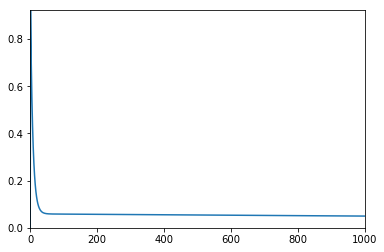

In [16]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_step,0,np.max(cost_history)])
plt.show()

In [17]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4,4]), name='weight2')
b2 = tf.Variable(tf.random_normal([4]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [18]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  6.90701
Step:  1 Cost:  6.32238
Step:  2 Cost:  5.81762
Step:  3 Cost:  5.37136
Step:  4 Cost:  4.96824
Step:  5 Cost:  4.60003
Step:  6 Cost:  4.26012
Step:  7 Cost:  3.94355
Step:  8 Cost:  3.64754
Step:  9 Cost:  3.37022
Step:  10 Cost:  3.11218
Step:  11 Cost:  2.87158
Step:  12 Cost:  2.64482
Step:  13 Cost:  2.43138
Step:  14 Cost:  2.23081
Step:  15 Cost:  2.04269
Step:  16 Cost:  1.86664
Step:  17 Cost:  1.70229
Step:  18 Cost:  1.54927
Step:  19 Cost:  1.40722
Step:  20 Cost:  1.27574
Step:  21 Cost:  1.15444
Step:  22 Cost:  1.04287
Step:  23 Cost:  0.940607
Step:  24 Cost:  0.847177
Step:  25 Cost:  0.762105
Step:  26 Cost:  0.684903
Step:  27 Cost:  0.615074
Step:  28 Cost:  0.552124
Step:  29 Cost:  0.495556
Step:  30 Cost:  0.444885
Step:  31 Cost:  0.399634
Step:  32 Cost:  0.359345
Step:  33 Cost:  0.323574
Step:  34 Cost:  0.291904
Step:  35 Cost:  0.263938
Step:  36 Cost:  0.239305
Step:  37 Cost:  0.217659
Step:  38 Cost:  0.198681
Step:  39 Cost:  0.

Step:  385 Cost:  0.0602097
Step:  386 Cost:  0.0601919
Step:  387 Cost:  0.0601741
Step:  388 Cost:  0.0601564
Step:  389 Cost:  0.0601388
Step:  390 Cost:  0.0601213
Step:  391 Cost:  0.0601038
Step:  392 Cost:  0.0600864
Step:  393 Cost:  0.060069
Step:  394 Cost:  0.0600517
Step:  395 Cost:  0.0600345
Step:  396 Cost:  0.0600173
Step:  397 Cost:  0.0600001
Step:  398 Cost:  0.059983
Step:  399 Cost:  0.059966
Step:  400 Cost:  0.0599491
Step:  401 Cost:  0.0599323
Step:  402 Cost:  0.0599155
Step:  403 Cost:  0.0598988
Step:  404 Cost:  0.0598822
Step:  405 Cost:  0.0598658
Step:  406 Cost:  0.0598494
Step:  407 Cost:  0.059833
Step:  408 Cost:  0.0598167
Step:  409 Cost:  0.0598005
Step:  410 Cost:  0.0597843
Step:  411 Cost:  0.0597682
Step:  412 Cost:  0.0597522
Step:  413 Cost:  0.0597362
Step:  414 Cost:  0.0597203
Step:  415 Cost:  0.0597044
Step:  416 Cost:  0.0596886
Step:  417 Cost:  0.0596729
Step:  418 Cost:  0.0596571
Step:  419 Cost:  0.0596415
Step:  420 Cost:  0.0596

Step:  770 Cost:  0.0568557
Step:  771 Cost:  0.0568529
Step:  772 Cost:  0.0568501
Step:  773 Cost:  0.0568474
Step:  774 Cost:  0.0568446
Step:  775 Cost:  0.0568419
Step:  776 Cost:  0.0568391
Step:  777 Cost:  0.0568364
Step:  778 Cost:  0.0568337
Step:  779 Cost:  0.0568311
Step:  780 Cost:  0.0568284
Step:  781 Cost:  0.0568257
Step:  782 Cost:  0.0568231
Step:  783 Cost:  0.0568205
Step:  784 Cost:  0.0568178
Step:  785 Cost:  0.0568152
Step:  786 Cost:  0.0568127
Step:  787 Cost:  0.0568101
Step:  788 Cost:  0.0568075
Step:  789 Cost:  0.056805
Step:  790 Cost:  0.0568024
Step:  791 Cost:  0.0567999
Step:  792 Cost:  0.0567975
Step:  793 Cost:  0.056795
Step:  794 Cost:  0.0567925
Step:  795 Cost:  0.05679
Step:  796 Cost:  0.0567876
Step:  797 Cost:  0.0567851
Step:  798 Cost:  0.0567827
Step:  799 Cost:  0.0567803
Step:  800 Cost:  0.0567779
Step:  801 Cost:  0.0567755
Step:  802 Cost:  0.0567731
Step:  803 Cost:  0.0567708
Step:  804 Cost:  0.0567684
Step:  805 Cost:  0.0567

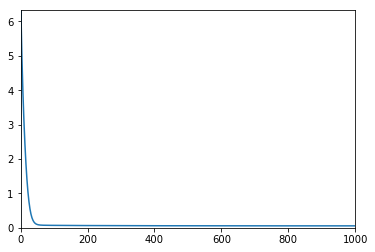

In [19]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_step,0,np.max(cost_history)])
plt.show()

In [21]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2,2]), name='weight2')
b2 = tf.Variable(tf.random_normal([2]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([2,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [22]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.893836
Step:  1 Cost:  0.817322
Step:  2 Cost:  0.746757
Step:  3 Cost:  0.681731
Step:  4 Cost:  0.621882
Step:  5 Cost:  0.566893
Step:  6 Cost:  0.516473
Step:  7 Cost:  0.470354
Step:  8 Cost:  0.42828
Step:  9 Cost:  0.390005
Step:  10 Cost:  0.355293
Step:  11 Cost:  0.323909
Step:  12 Cost:  0.295628
Step:  13 Cost:  0.270223
Step:  14 Cost:  0.247479
Step:  15 Cost:  0.227182
Step:  16 Cost:  0.209127
Step:  17 Cost:  0.193117
Step:  18 Cost:  0.178964
Step:  19 Cost:  0.166488
Step:  20 Cost:  0.155522
Step:  21 Cost:  0.145909
Step:  22 Cost:  0.137503
Step:  23 Cost:  0.130169
Step:  24 Cost:  0.123785
Step:  25 Cost:  0.118238
Step:  26 Cost:  0.113427
Step:  27 Cost:  0.109261
Step:  28 Cost:  0.105657
Step:  29 Cost:  0.102544
Step:  30 Cost:  0.0998554
Step:  31 Cost:  0.0975352
Step:  32 Cost:  0.095533
Step:  33 Cost:  0.0938048
Step:  34 Cost:  0.0923123
Step:  35 Cost:  0.091022
Step:  36 Cost:  0.0899049
Step:  37 Cost:  0.0889359
Step:  38 Cost:  

Step:  333 Cost:  0.0585787
Step:  334 Cost:  0.0585229
Step:  335 Cost:  0.0584672
Step:  336 Cost:  0.0584117
Step:  337 Cost:  0.0583562
Step:  338 Cost:  0.0583009
Step:  339 Cost:  0.0582457
Step:  340 Cost:  0.0581906
Step:  341 Cost:  0.0581356
Step:  342 Cost:  0.0580807
Step:  343 Cost:  0.0580259
Step:  344 Cost:  0.0579713
Step:  345 Cost:  0.0579167
Step:  346 Cost:  0.0578622
Step:  347 Cost:  0.0578079
Step:  348 Cost:  0.0577537
Step:  349 Cost:  0.0576995
Step:  350 Cost:  0.0576455
Step:  351 Cost:  0.0575916
Step:  352 Cost:  0.0575378
Step:  353 Cost:  0.0574841
Step:  354 Cost:  0.0574305
Step:  355 Cost:  0.057377
Step:  356 Cost:  0.0573236
Step:  357 Cost:  0.0572703
Step:  358 Cost:  0.0572172
Step:  359 Cost:  0.0571641
Step:  360 Cost:  0.0571111
Step:  361 Cost:  0.0570582
Step:  362 Cost:  0.0570055
Step:  363 Cost:  0.0569528
Step:  364 Cost:  0.0569002
Step:  365 Cost:  0.0568477
Step:  366 Cost:  0.0567954
Step:  367 Cost:  0.0567431
Step:  368 Cost:  0.0

Step:  670 Cost:  0.0441045
Step:  671 Cost:  0.0440703
Step:  672 Cost:  0.0440363
Step:  673 Cost:  0.0440022
Step:  674 Cost:  0.0439682
Step:  675 Cost:  0.0439342
Step:  676 Cost:  0.0439003
Step:  677 Cost:  0.0438664
Step:  678 Cost:  0.0438326
Step:  679 Cost:  0.0437987
Step:  680 Cost:  0.0437649
Step:  681 Cost:  0.0437312
Step:  682 Cost:  0.0436975
Step:  683 Cost:  0.0436638
Step:  684 Cost:  0.0436302
Step:  685 Cost:  0.0435966
Step:  686 Cost:  0.043563
Step:  687 Cost:  0.0435295
Step:  688 Cost:  0.043496
Step:  689 Cost:  0.0434625
Step:  690 Cost:  0.0434291
Step:  691 Cost:  0.0433957
Step:  692 Cost:  0.0433623
Step:  693 Cost:  0.043329
Step:  694 Cost:  0.0432957
Step:  695 Cost:  0.0432625
Step:  696 Cost:  0.0432293
Step:  697 Cost:  0.0431961
Step:  698 Cost:  0.043163
Step:  699 Cost:  0.0431299
Step:  700 Cost:  0.0430968
Step:  701 Cost:  0.0430637
Step:  702 Cost:  0.0430308
Step:  703 Cost:  0.0429978
Step:  704 Cost:  0.0429649
Step:  705 Cost:  0.0429

Step:  994 Cost:  0.0346787
Step:  995 Cost:  0.034654
Step:  996 Cost:  0.0346292
Step:  997 Cost:  0.0346045
Step:  998 Cost:  0.0345798
Step:  999 Cost:  0.0345551
Learning finished
------------------
Test error 0.0954877 
Test Prediction
 [[ 0.45771551]
 [ 0.23053473]
 [ 0.58627713]
 [ 0.24779075]
 [ 0.2695449 ]
 [ 0.53947067]
 [ 0.38873315]
 [ 0.27311778]
 [ 0.60256135]
 [ 0.27921742]
 [ 0.2411086 ]
 [ 0.48835087]
 [ 0.34394538]
 [ 0.49173367]
 [ 0.21516681]
 [ 0.54951227]
 [ 0.50326252]
 [ 0.67663515]
 [ 0.21722001]
 [ 0.22229898]
 [ 0.58980966]
 [ 0.34283733]
 [ 0.41531754]
 [ 0.19503808]
 [ 0.24803889]
 [ 0.51838171]
 [ 0.25345922]
 [ 0.29107273]
 [ 0.43452573]
 [ 0.22379881]
 [ 0.41822112]
 [ 0.28350145]
 [ 0.19603115]
 [ 0.25732374]
 [ 0.53283966]
 [ 0.25501978]
 [ 0.65193105]
 [ 0.35006785]
 [ 0.17451787]
 [ 0.51016784]
 [ 0.21058327]
 [ 0.40496838]
 [ 0.27443045]
 [ 0.47236478]
 [ 0.33027047]
 [ 0.22999269]
 [ 0.27095991]
 [ 0.17907435]
 [ 0.26597929]
 [ 0.50786471]
 [ 0.41

In [23]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,3]), name='weight1')
b1 = tf.Variable(tf.random_normal([3]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([3,3]), name='weight2')
b2 = tf.Variable(tf.random_normal([3]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([3,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [24]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  11.3903
Step:  1 Cost:  6.03255
Step:  2 Cost:  3.67069
Step:  3 Cost:  2.46113
Step:  4 Cost:  1.73641
Step:  5 Cost:  1.26853
Step:  6 Cost:  0.951643
Step:  7 Cost:  0.730164
Step:  8 Cost:  0.571878
Step:  9 Cost:  0.456839
Step:  10 Cost:  0.372123
Step:  11 Cost:  0.309362
Step:  12 Cost:  0.262365
Step:  13 Cost:  0.226822
Step:  14 Cost:  0.199737
Step:  15 Cost:  0.178978
Step:  16 Cost:  0.16297
Step:  17 Cost:  0.150517
Step:  18 Cost:  0.14074
Step:  19 Cost:  0.133006
Step:  20 Cost:  0.126845
Step:  21 Cost:  0.121878
Step:  22 Cost:  0.117833
Step:  23 Cost:  0.114485
Step:  24 Cost:  0.111686
Step:  25 Cost:  0.109308
Step:  26 Cost:  0.107252
Step:  27 Cost:  0.105448
Step:  28 Cost:  0.103839
Step:  29 Cost:  0.102385
Step:  30 Cost:  0.101054
Step:  31 Cost:  0.0998229
Step:  32 Cost:  0.0986696
Step:  33 Cost:  0.0975793
Step:  34 Cost:  0.0965415
Step:  35 Cost:  0.0955477
Step:  36 Cost:  0.0945924
Step:  37 Cost:  0.0936707
Step:  38 Cost:  0.0927

Step:  407 Cost:  0.00624836
Step:  408 Cost:  0.00622055
Step:  409 Cost:  0.00619302
Step:  410 Cost:  0.00616576
Step:  411 Cost:  0.00613877
Step:  412 Cost:  0.00611205
Step:  413 Cost:  0.00608558
Step:  414 Cost:  0.00605936
Step:  415 Cost:  0.00603341
Step:  416 Cost:  0.00600771
Step:  417 Cost:  0.00598226
Step:  418 Cost:  0.00595706
Step:  419 Cost:  0.00593211
Step:  420 Cost:  0.00590739
Step:  421 Cost:  0.00588292
Step:  422 Cost:  0.00585869
Step:  423 Cost:  0.00583471
Step:  424 Cost:  0.00581095
Step:  425 Cost:  0.00578744
Step:  426 Cost:  0.00576415
Step:  427 Cost:  0.00574108
Step:  428 Cost:  0.00571824
Step:  429 Cost:  0.00569563
Step:  430 Cost:  0.00567323
Step:  431 Cost:  0.00565106
Step:  432 Cost:  0.0056291
Step:  433 Cost:  0.00560734
Step:  434 Cost:  0.00558579
Step:  435 Cost:  0.00556444
Step:  436 Cost:  0.0055433
Step:  437 Cost:  0.00552236
Step:  438 Cost:  0.00550163
Step:  439 Cost:  0.0054811
Step:  440 Cost:  0.00546075
Step:  441 Cost: 

Step:  815 Cost:  0.00282317
Step:  816 Cost:  0.00282059
Step:  817 Cost:  0.00281805
Step:  818 Cost:  0.0028155
Step:  819 Cost:  0.00281295
Step:  820 Cost:  0.00281042
Step:  821 Cost:  0.00280791
Step:  822 Cost:  0.00280542
Step:  823 Cost:  0.00280295
Step:  824 Cost:  0.00280048
Step:  825 Cost:  0.00279801
Step:  826 Cost:  0.00279556
Step:  827 Cost:  0.00279311
Step:  828 Cost:  0.00279066
Step:  829 Cost:  0.00278822
Step:  830 Cost:  0.0027858
Step:  831 Cost:  0.00278336
Step:  832 Cost:  0.00278094
Step:  833 Cost:  0.00277854
Step:  834 Cost:  0.00277616
Step:  835 Cost:  0.0027738
Step:  836 Cost:  0.00277145
Step:  837 Cost:  0.00276911
Step:  838 Cost:  0.00276675
Step:  839 Cost:  0.00276438
Step:  840 Cost:  0.00276204
Step:  841 Cost:  0.0027597
Step:  842 Cost:  0.00275739
Step:  843 Cost:  0.00275508
Step:  844 Cost:  0.00275274
Step:  845 Cost:  0.0027504
Step:  846 Cost:  0.00274808
Step:  847 Cost:  0.00274578
Step:  848 Cost:  0.00274349
Step:  849 Cost:  0

In [25]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([4,4]), name='weight2')
b2 = tf.Variable(tf.random_normal([4]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [26]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  0.703633
Step:  1 Cost:  0.678349
Step:  2 Cost:  0.654066
Step:  3 Cost:  0.630744
Step:  4 Cost:  0.608346
Step:  5 Cost:  0.586835
Step:  6 Cost:  0.566176
Step:  7 Cost:  0.546335
Step:  8 Cost:  0.52728
Step:  9 Cost:  0.508979
Step:  10 Cost:  0.491403
Step:  11 Cost:  0.474523
Step:  12 Cost:  0.458311
Step:  13 Cost:  0.442741
Step:  14 Cost:  0.427788
Step:  15 Cost:  0.413427
Step:  16 Cost:  0.399635
Step:  17 Cost:  0.386389
Step:  18 Cost:  0.373667
Step:  19 Cost:  0.36145
Step:  20 Cost:  0.349716
Step:  21 Cost:  0.338446
Step:  22 Cost:  0.327623
Step:  23 Cost:  0.317229
Step:  24 Cost:  0.307246
Step:  25 Cost:  0.297659
Step:  26 Cost:  0.288451
Step:  27 Cost:  0.279608
Step:  28 Cost:  0.271115
Step:  29 Cost:  0.262958
Step:  30 Cost:  0.255124
Step:  31 Cost:  0.247601
Step:  32 Cost:  0.240375
Step:  33 Cost:  0.233436
Step:  34 Cost:  0.226771
Step:  35 Cost:  0.220371
Step:  36 Cost:  0.214223
Step:  37 Cost:  0.20832
Step:  38 Cost:  0.20265


Step:  371 Cost:  0.0651383
Step:  372 Cost:  0.0651382
Step:  373 Cost:  0.0651383
Step:  374 Cost:  0.0651382
Step:  375 Cost:  0.0651382
Step:  376 Cost:  0.0651382
Step:  377 Cost:  0.0651382
Step:  378 Cost:  0.0651382
Step:  379 Cost:  0.0651382
Step:  380 Cost:  0.0651382
Step:  381 Cost:  0.0651382
Step:  382 Cost:  0.0651382
Step:  383 Cost:  0.0651382
Step:  384 Cost:  0.0651382
Step:  385 Cost:  0.0651382
Step:  386 Cost:  0.0651382
Step:  387 Cost:  0.0651382
Step:  388 Cost:  0.0651382
Step:  389 Cost:  0.0651382
Step:  390 Cost:  0.0651382
Step:  391 Cost:  0.0651382
Step:  392 Cost:  0.0651381
Step:  393 Cost:  0.0651381
Step:  394 Cost:  0.0651381
Step:  395 Cost:  0.0651381
Step:  396 Cost:  0.0651381
Step:  397 Cost:  0.0651381
Step:  398 Cost:  0.0651381
Step:  399 Cost:  0.0651381
Step:  400 Cost:  0.0651381
Step:  401 Cost:  0.0651381
Step:  402 Cost:  0.0651381
Step:  403 Cost:  0.0651381
Step:  404 Cost:  0.0651381
Step:  405 Cost:  0.0651381
Step:  406 Cost:  0.

Step:  752 Cost:  0.0651381
Step:  753 Cost:  0.0651381
Step:  754 Cost:  0.0651381
Step:  755 Cost:  0.0651381
Step:  756 Cost:  0.0651381
Step:  757 Cost:  0.0651381
Step:  758 Cost:  0.0651381
Step:  759 Cost:  0.0651381
Step:  760 Cost:  0.0651381
Step:  761 Cost:  0.0651381
Step:  762 Cost:  0.0651381
Step:  763 Cost:  0.0651381
Step:  764 Cost:  0.0651381
Step:  765 Cost:  0.0651381
Step:  766 Cost:  0.0651381
Step:  767 Cost:  0.0651381
Step:  768 Cost:  0.0651381
Step:  769 Cost:  0.0651381
Step:  770 Cost:  0.0651381
Step:  771 Cost:  0.0651381
Step:  772 Cost:  0.0651381
Step:  773 Cost:  0.0651381
Step:  774 Cost:  0.0651381
Step:  775 Cost:  0.0651381
Step:  776 Cost:  0.0651381
Step:  777 Cost:  0.0651381
Step:  778 Cost:  0.0651381
Step:  779 Cost:  0.0651381
Step:  780 Cost:  0.0651381
Step:  781 Cost:  0.0651381
Step:  782 Cost:  0.0651381
Step:  783 Cost:  0.0651381
Step:  784 Cost:  0.0651381
Step:  785 Cost:  0.0651381
Step:  786 Cost:  0.0651381
Step:  787 Cost:  0.

In [27]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([5,5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [28]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  3.77771
Step:  1 Cost:  2.77294
Step:  2 Cost:  2.05145
Step:  3 Cost:  1.52971
Step:  4 Cost:  1.16346
Step:  5 Cost:  0.909377
Step:  6 Cost:  0.733598
Step:  7 Cost:  0.612462
Step:  8 Cost:  0.52824
Step:  9 Cost:  0.46856
Step:  10 Cost:  0.425493
Step:  11 Cost:  0.393728
Step:  12 Cost:  0.370259
Step:  13 Cost:  0.351568
Step:  14 Cost:  0.335563
Step:  15 Cost:  0.321156
Step:  16 Cost:  0.307787
Step:  17 Cost:  0.295182
Step:  18 Cost:  0.283185
Step:  19 Cost:  0.271717
Step:  20 Cost:  0.260733
Step:  21 Cost:  0.250212
Step:  22 Cost:  0.240124
Step:  23 Cost:  0.230459
Step:  24 Cost:  0.221205
Step:  25 Cost:  0.212359
Step:  26 Cost:  0.203892
Step:  27 Cost:  0.195801
Step:  28 Cost:  0.188071
Step:  29 Cost:  0.180694
Step:  30 Cost:  0.17366
Step:  31 Cost:  0.166961
Step:  32 Cost:  0.160584
Step:  33 Cost:  0.154513
Step:  34 Cost:  0.14874
Step:  35 Cost:  0.143255
Step:  36 Cost:  0.138042
Step:  37 Cost:  0.133091
Step:  38 Cost:  0.128394
Step:

Step:  370 Cost:  0.00669844
Step:  371 Cost:  0.00668655
Step:  372 Cost:  0.00667469
Step:  373 Cost:  0.00666289
Step:  374 Cost:  0.00665117
Step:  375 Cost:  0.00663952
Step:  376 Cost:  0.00662794
Step:  377 Cost:  0.00661643
Step:  378 Cost:  0.00660497
Step:  379 Cost:  0.00659353
Step:  380 Cost:  0.00658215
Step:  381 Cost:  0.00657083
Step:  382 Cost:  0.00655959
Step:  383 Cost:  0.00654841
Step:  384 Cost:  0.00653729
Step:  385 Cost:  0.00652623
Step:  386 Cost:  0.00651525
Step:  387 Cost:  0.00650432
Step:  388 Cost:  0.00649346
Step:  389 Cost:  0.00648266
Step:  390 Cost:  0.00647192
Step:  391 Cost:  0.00646123
Step:  392 Cost:  0.00645062
Step:  393 Cost:  0.00644005
Step:  394 Cost:  0.00642947
Step:  395 Cost:  0.00641896
Step:  396 Cost:  0.00640849
Step:  397 Cost:  0.00639809
Step:  398 Cost:  0.00638775
Step:  399 Cost:  0.00637745
Step:  400 Cost:  0.00636722
Step:  401 Cost:  0.00635704
Step:  402 Cost:  0.00634691
Step:  403 Cost:  0.00633685
Step:  404 Cos

Step:  742 Cost:  0.00440731
Step:  743 Cost:  0.00440451
Step:  744 Cost:  0.00440172
Step:  745 Cost:  0.00439894
Step:  746 Cost:  0.00439619
Step:  747 Cost:  0.00439345
Step:  748 Cost:  0.00439072
Step:  749 Cost:  0.00438799
Step:  750 Cost:  0.00438526
Step:  751 Cost:  0.00438256
Step:  752 Cost:  0.00437988
Step:  753 Cost:  0.00437721
Step:  754 Cost:  0.00437454
Step:  755 Cost:  0.00437188
Step:  756 Cost:  0.00436924
Step:  757 Cost:  0.00436662
Step:  758 Cost:  0.00436401
Step:  759 Cost:  0.0043614
Step:  760 Cost:  0.0043588
Step:  761 Cost:  0.00435622
Step:  762 Cost:  0.00435366
Step:  763 Cost:  0.00435111
Step:  764 Cost:  0.00434856
Step:  765 Cost:  0.00434602
Step:  766 Cost:  0.00434349
Step:  767 Cost:  0.00434099
Step:  768 Cost:  0.0043385
Step:  769 Cost:  0.00433601
Step:  770 Cost:  0.00433352
Step:  771 Cost:  0.00433104
Step:  772 Cost:  0.00432858
Step:  773 Cost:  0.00432614
Step:  774 Cost:  0.00432371
Step:  775 Cost:  0.00432128
Step:  776 Cost: 

In [29]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([2,6]), name='weight1')
b1 = tf.Variable(tf.random_normal([6]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([6,6]), name='weight2')
b2 = tf.Variable(tf.random_normal([6]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([6,1]), name='weight2')
b3 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.matmul(layer2, W3) + b3

In [30]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.01
training_step = 1000
cost_history = np.empty(shape=[1],dtype=float)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for epoch in range(training_step):
    cost_val, hy_val, _ = sess.run([cost, hypothesis,optimizer],feed_dict={X:x_data,Y:y_data})
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: x_data,Y: y_data}))
    print("Step: ", epoch, "Cost: ", cost_val)
#    print("Step: ", epoch, "Cost: ", cost_val, "\n", "prediction: ", "\n", hy_val)
#     if(epoch % 10 == 0):
#         val_acc = (sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))
#         val_list.append({"epoch":epoch, "val_acc": val_acc})
#         print("epoch: %s valiation accuracy: %s" %(epoch, val_acc))
print("Learning finished")
print("------------------")
test_val, test_hy = sess.run([cost,hypothesis], feed_dict={X: x_test, Y: y_test})
print("Test error", test_val, "\n" "Test Prediction" "\n", test_hy )

Step:  0 Cost:  19.2783
Step:  1 Cost:  0.553752
Step:  2 Cost:  0.241683
Step:  3 Cost:  0.202075
Step:  4 Cost:  0.191873
Step:  5 Cost:  0.18509
Step:  6 Cost:  0.178943
Step:  7 Cost:  0.173116
Step:  8 Cost:  0.167567
Step:  9 Cost:  0.162274
Step:  10 Cost:  0.157217
Step:  11 Cost:  0.152382
Step:  12 Cost:  0.147751
Step:  13 Cost:  0.143312
Step:  14 Cost:  0.13906
Step:  15 Cost:  0.134978
Step:  16 Cost:  0.13106
Step:  17 Cost:  0.127299
Step:  18 Cost:  0.123684
Step:  19 Cost:  0.120208
Step:  20 Cost:  0.116866
Step:  21 Cost:  0.113647
Step:  22 Cost:  0.110547
Step:  23 Cost:  0.107562
Step:  24 Cost:  0.104683
Step:  25 Cost:  0.10191
Step:  26 Cost:  0.0992352
Step:  27 Cost:  0.0966539
Step:  28 Cost:  0.0941618
Step:  29 Cost:  0.0917581
Step:  30 Cost:  0.0894358
Step:  31 Cost:  0.0871917
Step:  32 Cost:  0.0850231
Step:  33 Cost:  0.0829279
Step:  34 Cost:  0.0809016
Step:  35 Cost:  0.0789441
Step:  36 Cost:  0.0770528
Step:  37 Cost:  0.0752231
Step:  38 Cost:

Step:  367 Cost:  0.00391912
Step:  368 Cost:  0.0039136
Step:  369 Cost:  0.00390814
Step:  370 Cost:  0.00390275
Step:  371 Cost:  0.00389741
Step:  372 Cost:  0.00389214
Step:  373 Cost:  0.00388692
Step:  374 Cost:  0.00388176
Step:  375 Cost:  0.00387666
Step:  376 Cost:  0.00387162
Step:  377 Cost:  0.00386663
Step:  378 Cost:  0.00386169
Step:  379 Cost:  0.00385681
Step:  380 Cost:  0.00385199
Step:  381 Cost:  0.00384722
Step:  382 Cost:  0.00384251
Step:  383 Cost:  0.00383786
Step:  384 Cost:  0.00383326
Step:  385 Cost:  0.0038287
Step:  386 Cost:  0.0038242
Step:  387 Cost:  0.00381974
Step:  388 Cost:  0.00381534
Step:  389 Cost:  0.00381097
Step:  390 Cost:  0.00380666
Step:  391 Cost:  0.00380239
Step:  392 Cost:  0.00379817
Step:  393 Cost:  0.00379399
Step:  394 Cost:  0.00378986
Step:  395 Cost:  0.00378578
Step:  396 Cost:  0.00378175
Step:  397 Cost:  0.00377777
Step:  398 Cost:  0.00377382
Step:  399 Cost:  0.00376992
Step:  400 Cost:  0.00376605
Step:  401 Cost: 

Step:  717 Cost:  0.00333507
Step:  718 Cost:  0.00333448
Step:  719 Cost:  0.00333388
Step:  720 Cost:  0.00333329
Step:  721 Cost:  0.0033327
Step:  722 Cost:  0.00333211
Step:  723 Cost:  0.00333152
Step:  724 Cost:  0.00333093
Step:  725 Cost:  0.00333035
Step:  726 Cost:  0.00332976
Step:  727 Cost:  0.00332917
Step:  728 Cost:  0.00332859
Step:  729 Cost:  0.003328
Step:  730 Cost:  0.00332742
Step:  731 Cost:  0.00332684
Step:  732 Cost:  0.00332626
Step:  733 Cost:  0.00332567
Step:  734 Cost:  0.00332509
Step:  735 Cost:  0.00332451
Step:  736 Cost:  0.00332393
Step:  737 Cost:  0.00332335
Step:  738 Cost:  0.00332278
Step:  739 Cost:  0.00332221
Step:  740 Cost:  0.00332163
Step:  741 Cost:  0.00332106
Step:  742 Cost:  0.00332049
Step:  743 Cost:  0.00331992
Step:  744 Cost:  0.00331935
Step:  745 Cost:  0.00331878
Step:  746 Cost:  0.00331822
Step:  747 Cost:  0.00331765
Step:  748 Cost:  0.00331708
Step:  749 Cost:  0.00331652
Step:  750 Cost:  0.00331595
Step:  751 Cost: 